**Performance Analysis of Statistical, Machine Learning and Deep Learning Models in Long-Term Forecasting of Solar Power Production**

The forecasting of solar power production for different time horizons (1, 3, 5, and 15 days ahead) is performed using both 
multivariate and univariate models. The attached figure illustrates the model, input variables, and output variables 
involved in the forecasting process. The notebook presents the predictions for the 15-day ahead horizon first, followed by 
the 3-day ahead, 5-day ahead, and finally the day-ahead predictions.Initially, the performance of three different univariate models (ARIMA, Univariate SVR, and Univariate LSTM) is evaluated. 
The best-performing univariate model is then analyzed by incorporating additional input variables to observe how the accuracy of the model changes with varying numbers of input variables. Additionally, ensemble models (Random Forest and ARIMA-LSTM) are tested using the same datasets to determine if combining different models can enhance the prediction accuracy.

The sequence of models used in the analysis is as follows:

1. ARIMA Model
2. SVR Model
3. Univariate LSTM Model
4. Multivariate LSTM Model
5. Stacked LSTM Model
6. GRU Model
7. Stacked GRU Model
8. Encoder-Decoder LSTM Model
9. Bi-Directional LSTM Model
10. ARIMA-LSTM (Hybrid Model)
11. Random Forest Model (Ensemble Model)

These models are employed to assess their respective forecasting capabilities and determine the most accurate approach for solar power production prediction provided with limited historical data

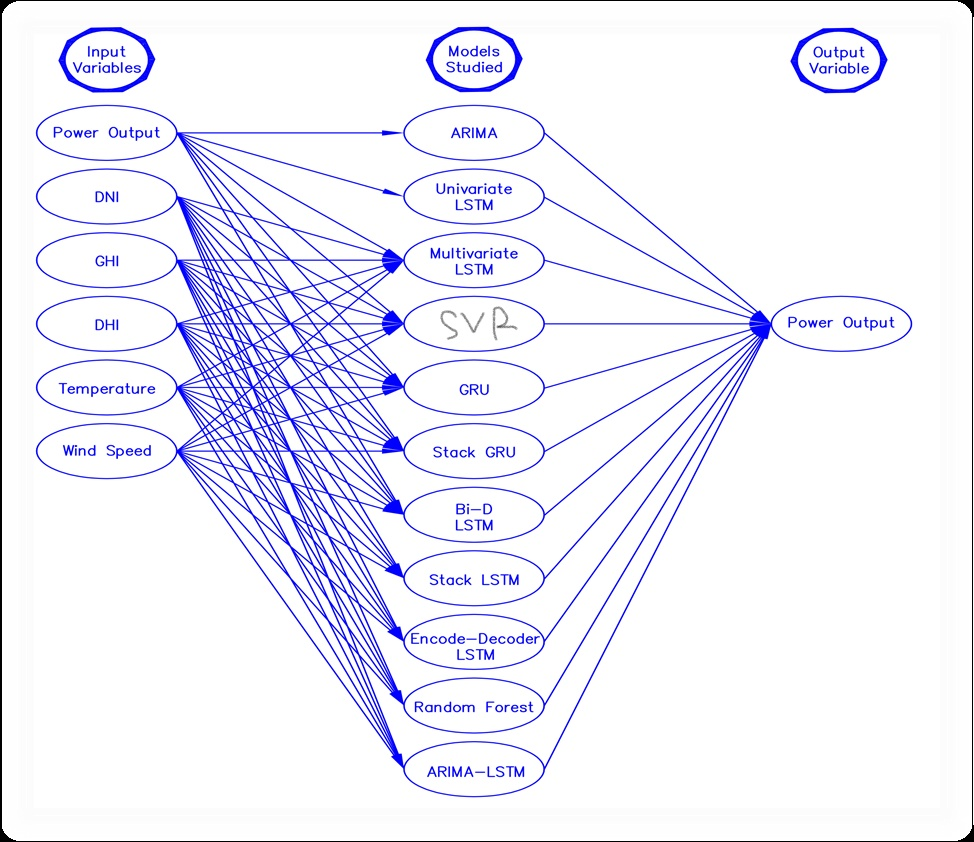

**A. 15 - Days Ahead Forecasting (Prediction horizon= 15 days)**

1. ARIMA Model

This is a univariate model, where model is trained and tested for power output data(kWh).

In [1]:
# Import Basic Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# preprocessing data

df = pd.read_csv(r"C:\Users\ASEDAI\Downloads\datamv.csv",usecols = [0,1], index_col = 0, parse_dates=[0], dayfirst=True)
df

output
time                       
2010-01-01 00:00:00     0.0
2010-01-01 01:00:00     0.0
2010-01-01 02:00:00     0.0
2010-01-01 03:00:00     0.0
2010-01-01 04:00:00     0.0
...                     ...
2010-12-31 19:00:00     0.0
2010-12-31 20:00:00     0.0
2010-12-31 21:00:00     0.0
2010-12-31 22:00:00     0.0
2010-12-31 23:00:00     0.0

[8760 rows x 1 columns]

time
2010-12-17 00:00:00    0.0
2010-12-17 01:00:00    0.0
2010-12-17 02:00:00    0.0
2010-12-17 03:00:00    0.0
2010-12-17 04:00:00    0.0
                      ... 
2010-12-31 19:00:00    0.0
2010-12-31 20:00:00    0.0
2010-12-31 21:00:00    0.0
2010-12-31 22:00:00    0.0
2010-12-31 23:00:00    0.0
Name: output, Length: 360, dtype: float64


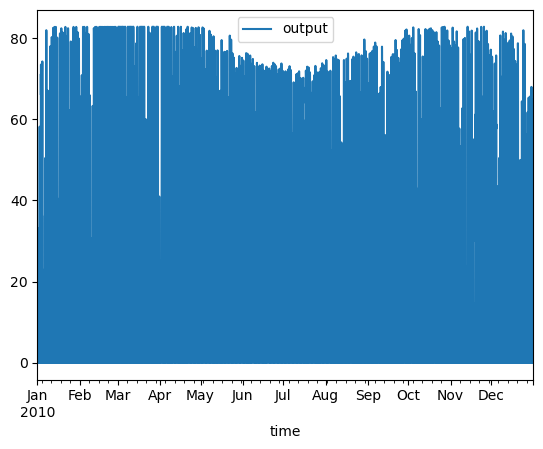

In [2]:
#TRAINING/TESTING DATA
#df1.index = pd.DatetimeIndex(df1.index)

#df.to_csv('lubbock solar data')

#df1.dropna(inplace = True)

df = pd.DataFrame(df['output'])

df.plot()
df

train = df.iloc[:8400,0]
test = df.iloc[8400:,0]
print(test)

<AxesSubplot:xlabel='time', ylabel='Resid'>

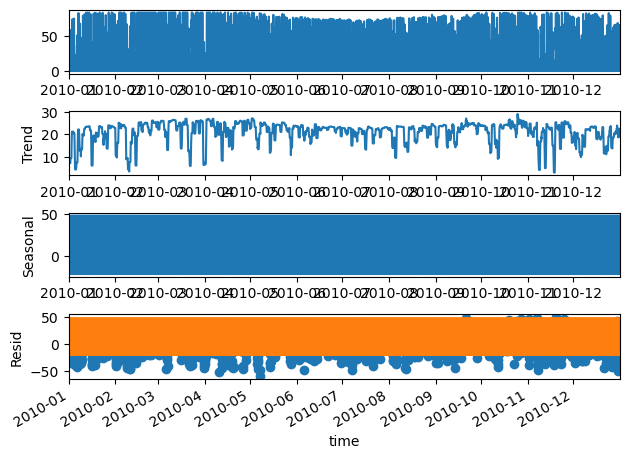

In [3]:
# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
Decomp_results = seasonal_decompose(df)

Decomp_results.plot()

Decomp_results.seasonal.plot()

C:\Users\ASEDAI\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=64837.206, Time=11.95 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=83469.536, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=68189.189, Time=0.78 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=75361.998, Time=2.78 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=87294.797, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=66450.474, Time=4.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=64841.698, Time=6.02 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=64841.915, Time=8.68 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=64739.208, Time=17.21 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=66111.193, Time=6.82 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=64820.642, Time=15.33 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=64728.981, Time=15.37 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=65923.978, Time=7.49 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=64735.075, Time=17.63 sec
 ARIMA(2,0,5)(

ARIMA(order=(3, 0, 5), scoring_args={}, suppress_warnings=True)

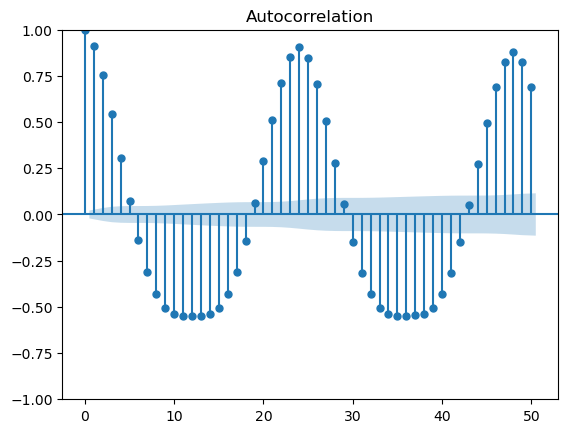

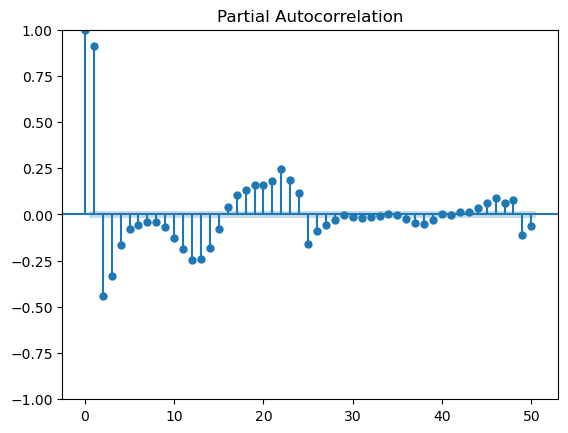

In [4]:
 #Finding the Parameters (p,d,q)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train, lags=50)

plot_pacf(train, lags=50)


from pmdarima import auto_arima

auto_arima(df, trace = True)

In [5]:
# Developing ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

A_Model = ARIMA(train, order = (3,0,5))

predictor = A_Model.fit()

predictor.summary()
print(predictor.summary())

Predicted_results = predictor.predict(start = len(train), end = len(train)+len(test) - 1, typ = 'levels')

C:\Users\ASEDAI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\ASEDAI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\ASEDAI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\ASEDAI\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                 output   No. Observations:                 8400
Model:                 ARIMA(3, 0, 5)   Log Likelihood              -30897.413
Date:                Sat, 27 May 2023   AIC                          61814.827
Time:                        12:33:47   BIC                          61885.187
Sample:                    01-01-2010   HQIC                         61838.851
                         - 12-16-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.1037      0.296     71.361      0.000      20.524      21.683
ar.L1          1.2647      1.504      0.841      0.400      -1.683       4.212
ar.L2          0.1228      2.749      0.045      0.9

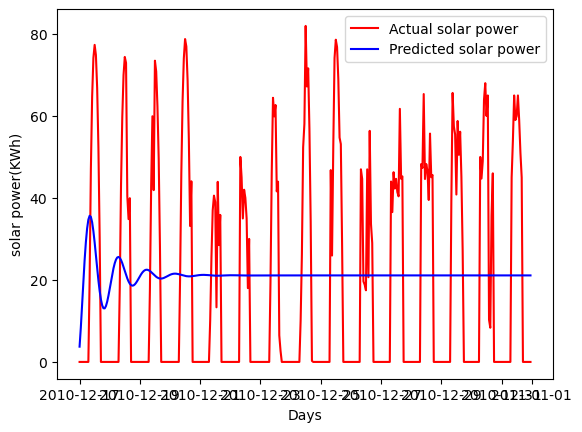

In [6]:
#Plotting result

plt.plot(test, color = 'red', label = 'Actual solar power')
plt.plot(Predicted_results, color = 'blue', label = 'Predicted solar power')
plt.xlabel ('Days')
plt.ylabel('solar power(KWh)')
plt.legend()
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
nmae = np.mean(np.abs(Predicted_results - test)) / 100
r_squared = 1 - (np.sum((test - Predicted_results)**2) / np.sum((test - np.mean(test))**2))
rmse = np.sqrt(mean_squared_error(test, Predicted_results))
# Print the performance metrics
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"R-Squared: {r_squared:.2f}")


RMSE: 25.41
NMAE: 0.23
R-Squared: 0.01


2. SVR Univariate Model

RMSE: 20.18
NMAE: 0.18
r-squared: 0.37


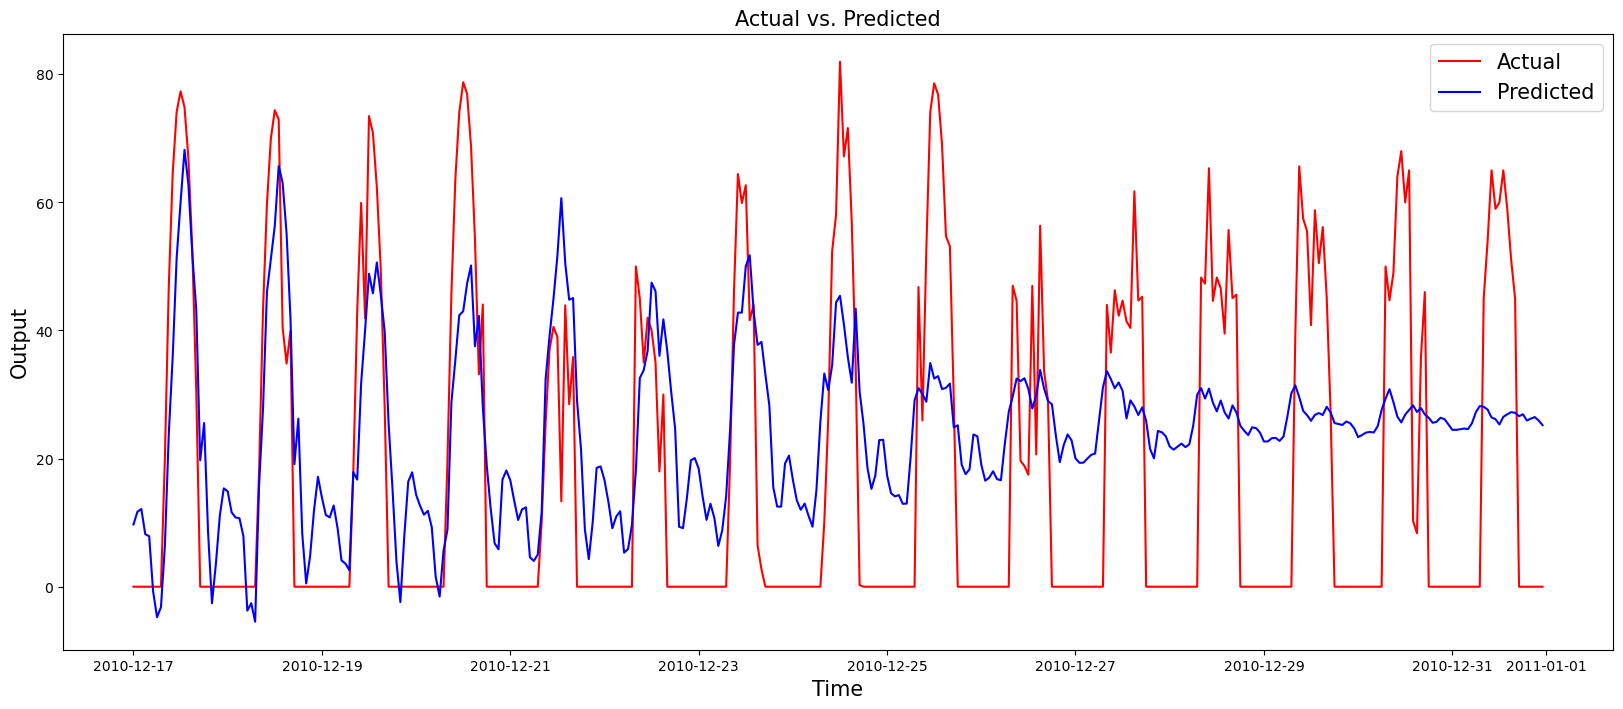

In [8]:
#Actual SVR model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Load the data into a Pandas DataFrame
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\fghgh.csv', parse_dates=['time'], index_col='time')

# Define the target variable
target = 'output'

# Set up the target array
y = data[target].values

# Preprocessing
scaler = StandardScaler()
y = scaler.fit_transform(y.reshape(-1, 1))

# Split the data into training and testing sets
train_data, test_data = y[:-360], y[-360:]

# Reshape the input data for SVR
time_steps = 360
X_train, y_train = create_dataset(train_data, train_data, time_steps)
y_test = test_data

# Flatten the training set for SVR
X_train = X_train.reshape(X_train.shape[0], -1)
y_train = y_train.reshape(-1)

# Build the SVR model
model = SVR(kernel='poly', C=30, gamma=0.8, epsilon=0.5)

# Fit the model to the training data
model.fit(X_train, y_train)

# Create a loop to iteratively predict each of the 360 time steps
predictions = model.predict(X_train[-1].reshape(1,-1))
for i in range(359):  
    new_pred = model.predict(np.append(X_train[-1][i+1:],predictions).reshape(1,-1))
    predictions = np.append(predictions, new_pred)

# Inverse transform the predictions and actual values to get them back to the original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate the mean squared error of the model
rmse = np.sqrt(mean_squared_error(y_test, predictions))
nmae = mean_absolute_error(y_test, predictions) / 100
r2_test = r2_score(y_test, predictions)

# Print the performance metrics
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"r-squared: {r2_test:.2f}")

# Plot the actual versus predicted values
plt.figure(figsize=(20, 8))
plt.plot(data.index[-360:], y_test, label='Actual', color='red')
plt.plot(data.index[-360:], predictions, label='Predicted', color='blue')
plt.legend(fontsize=15)
plt.xlabel('Time', size=15)
plt.ylabel('Output', size=15)
plt.title('Actual vs. Predicted', size=15)
plt.show()


3. Univariate LSTM

Epoch 1/30
69/69 [==============================] - 101s 1s/step - loss: 0.5197
Epoch 2/30
69/69 [==============================] - 100s 1s/step - loss: 0.1479
Epoch 3/30
69/69 [==============================] - 100s 1s/step - loss: 0.1014
Epoch 4/30
69/69 [==============================] - 105s 2s/step - loss: 0.0913
Epoch 5/30
69/69 [==============================] - 102s 1s/step - loss: 0.0858
Epoch 6/30
69/69 [==============================] - 103s 1s/step - loss: 0.0816
Epoch 7/30
69/69 [==============================] - 102s 1s/step - loss: 0.0772
Epoch 8/30
69/69 [==============================] - 103s 1s/step - loss: 0.0745
Epoch 9/30
69/69 [==============================] - 106s 2s/step - loss: 0.0723
Epoch 10/30
69/69 [==============================] - 106s 2s/step - loss: 0.0724
Epoch 11/30
69/69 [==============================] - 109s 2s/step - loss: 0.0692
Epoch 12/30
69/69 [==============================] - 105s 2s/step - loss: 0.0683
Epoch 13/30
69/69 [==================

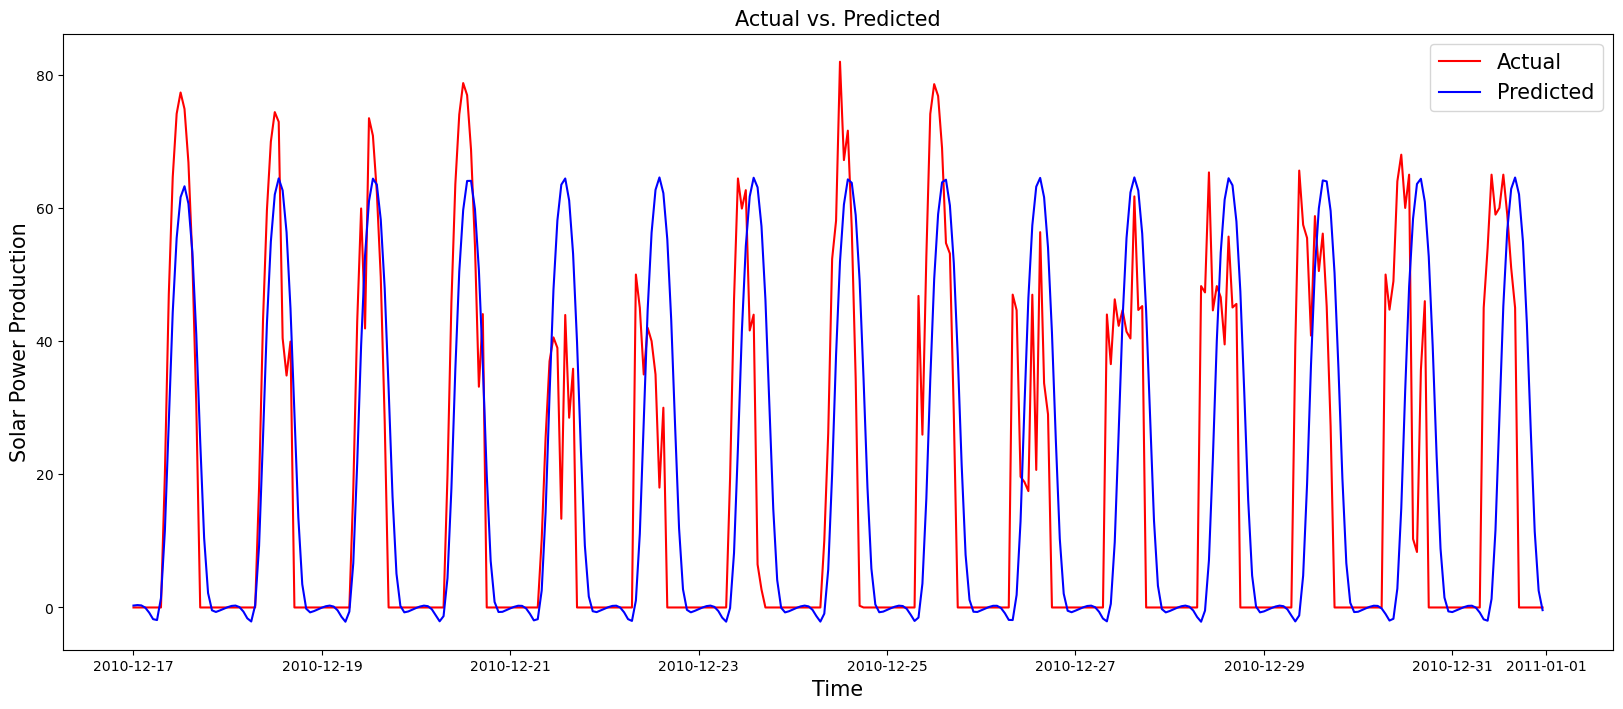

In [12]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Load the data into a Pandas DataFrame
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\just output.csv', parse_dates=['time'], index_col='time')

# Define the target variable
target = 'output'

# Set up the target array
y = data[target].values

# Split the data into training and testing sets
train_data, test_data = y[:-360], y[-360:]

# Preprocessing
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data.reshape(-1, 1))
test_data = scaler.transform(test_data.reshape(-1, 1))

# Reshape the input data for LSTM
time_steps = 4000
X_train, y_train = create_dataset(train_data, train_data, time_steps)
y_test = test_data 

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=16, input_shape=(time_steps, 1)))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model to the training data
model.fit(X_train, y_train, epochs=30, batch_size=64, verbose=1)

# Use the trained model to predict the output values for the test set
predictions = model.predict(X_train[-1].reshape(1,time_steps,1))

# Create a loop to iteratively predict each of the 360 time steps
for i in range(359):  
    new_pred = model.predict(np.append(X_train[-1][i+1:],predictions).reshape(1,time_steps,1))
    predictions = np.append(predictions, new_pred)

# Inverse transform the predictions and actual values to get them back to the original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate the mean squared error of the model
rmse = np.sqrt(mean_squared_error(y_test, predictions))
nmae = mean_absolute_error(y_test, predictions) / 100
r2_test = r2_score(y_test, predictions)

# Print the performance metrics
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"R-squared: {r2_test:.2f}")




# Plot the actual versus predicted values
plt.figure(figsize=(20, 8))
plt.plot(data.index[-360:], y_test, label='Actual', color='red')
plt.plot(data.index[-360:], predictions, label='Predicted', color='blue')
plt.legend(fontsize=15)
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.title('Actual vs. Predicted', size=15)
plt.show()



The LSTM (Deep Learning) model outperformed the ARIMA (Statistical) and SVR (Machine Learning) models in terms of performance. This indicates that the LSTM model was more effective in forecasting solar power production. To further enhance the model's performance, a multivariate LSTM model was evaluated by incorporating additional input variables. The goal was to examine how the inclusion of these variables impacted the accuracy and predictive capabilities of the model.

4. Multivariate LSTM

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Loading the data
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'



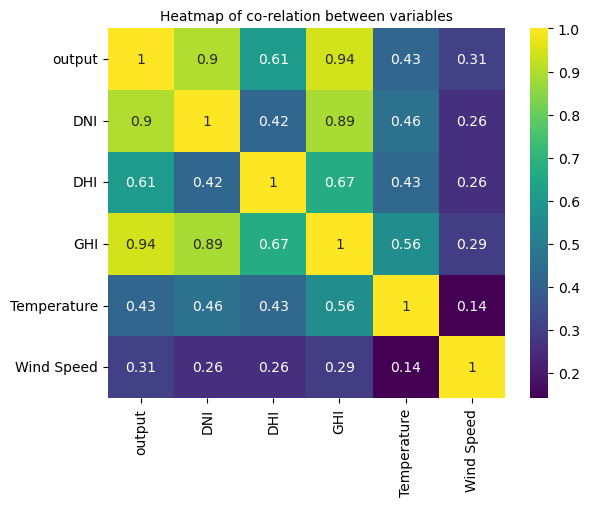

In [16]:
#plotting a correlation heatmap between variables
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=10)
plt.show()

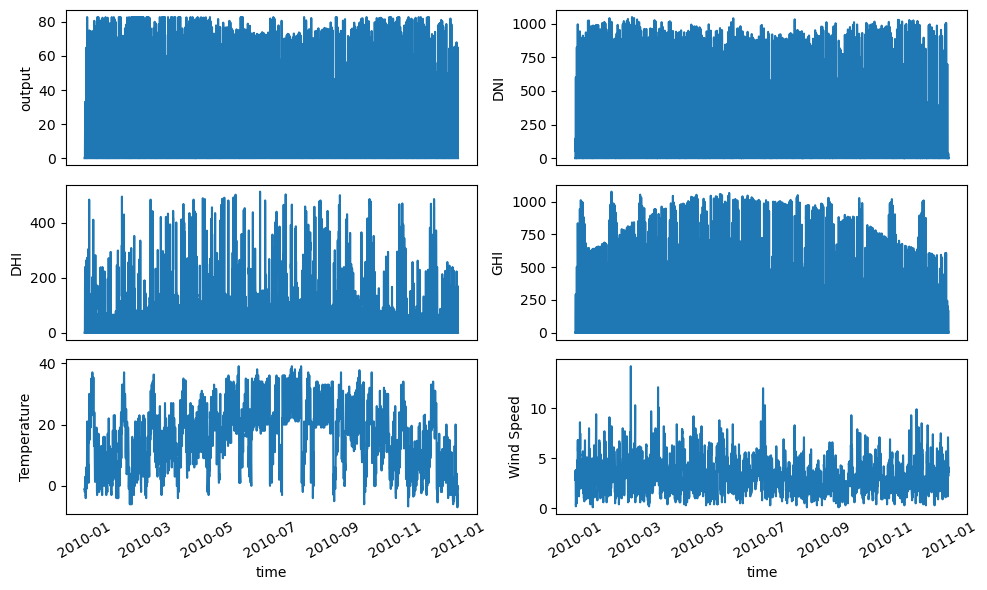

In [17]:
#Plot all the variables used in the study
df_plot = data.copy()
groups = [ 2, 3, 4, 5, 6]
ncols = 2
nrows = int(round(df_plot.shape[1] / ncols, 2))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(10,6 ))
for i, ax in enumerate(fig.axes):
        sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
       
        
fig.tight_layout()
plt.show(groups)

12/12 [==============================] - 0s 1ms/step


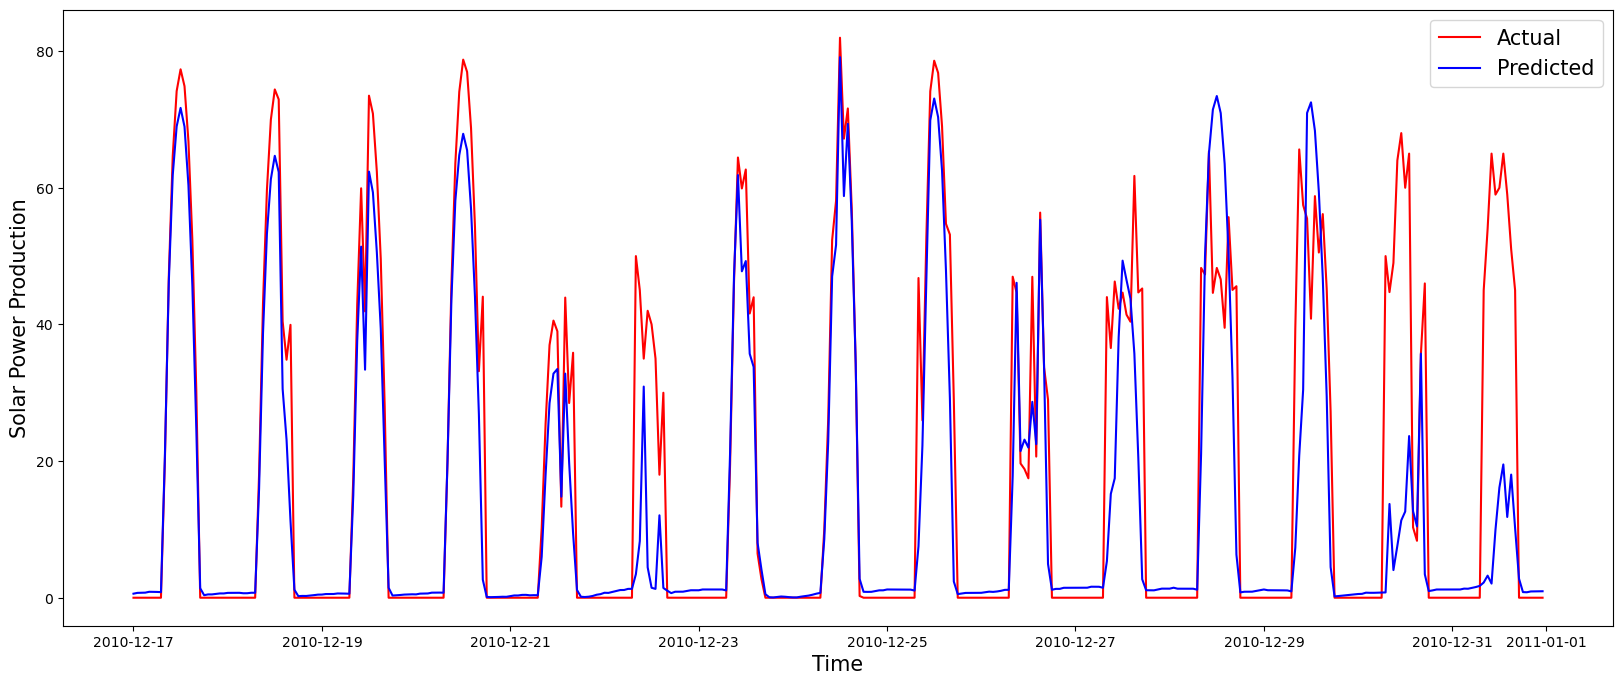

In [18]:
# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the Stacked LSTM model
model = Sequential()
model.add(LSTM(16, activation='relu', return_sequences=False, input_shape=(1, len(feature_variables))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
index = pd.date_range(start=data.index[-360], periods=360, freq='H')
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=index)

# Plotting the actual solar power output versus predicted solar power output values
plt.figure(figsize=(20, 8))
plt.plot(testing_data[target_variable], label='Actual', color='red')
plt.plot(next360_predictions[target_variable], label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()


5. Stacked LSTM model (multivariate model)

12/12 [==============================] - 0s 2ms/step


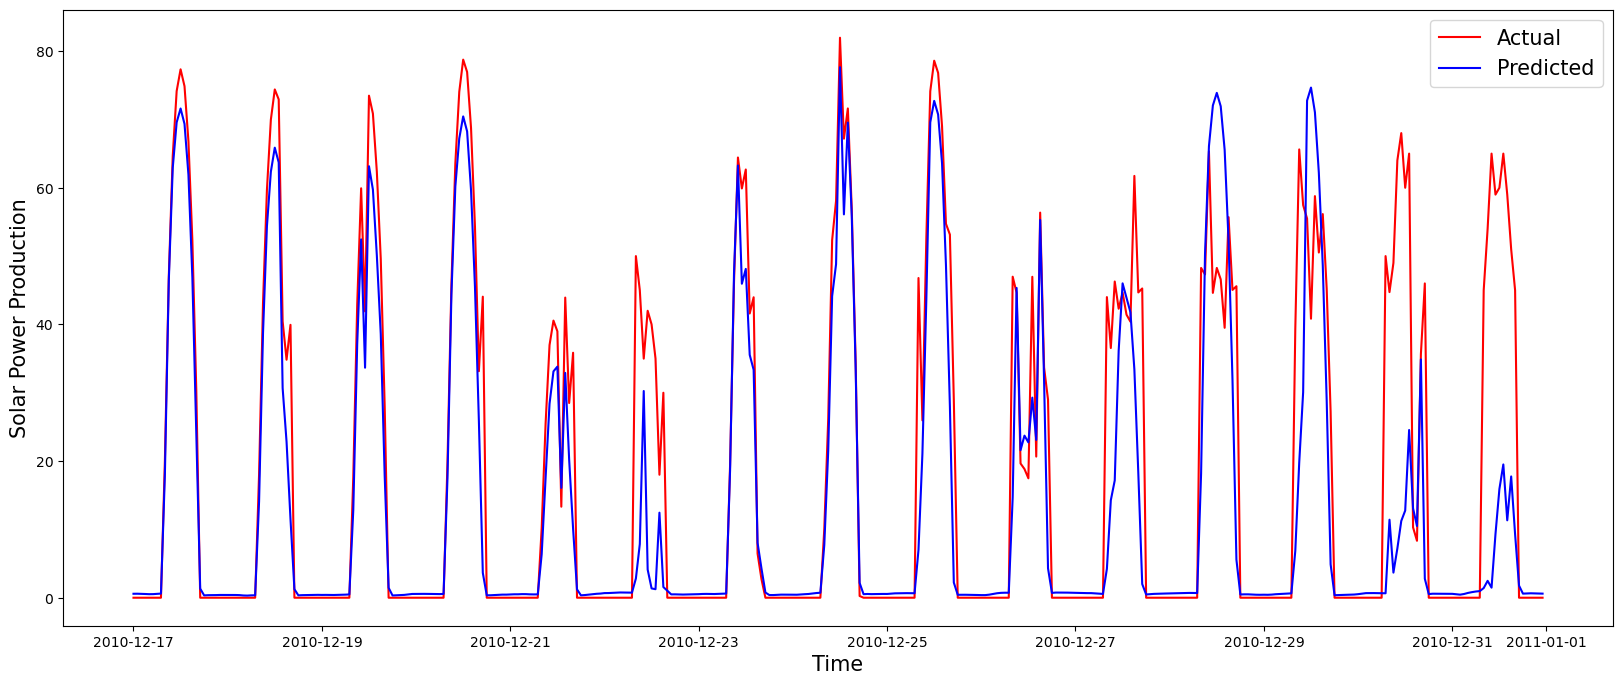

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Loading the data
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the Stacked LSTM model
model = Sequential()
model.add(LSTM(16, activation='relu', return_sequences=True, input_shape=(1, len(feature_variables))))
model.add(LSTM(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
index = pd.date_range(start=data.index[-360], periods=360, freq='H')
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=index)

# Plotting the actual solar power output versus predicted solar power output values
plt.figure(figsize=(20, 8))
plt.plot(testing_data[target_variable], label='Actual', color='red')
plt.plot(next360_predictions[target_variable], label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()


In [20]:
# Calculate accuracy metrics
y_test = testing_data[target_variable].values  # Extracting the target variable from testing_data
rmse = np.sqrt(mean_squared_error(y_test, predictions))
nmae = np.mean(np.abs(next360_predictions[target_variable] - testing_data[target_variable])) / 100
mae = mean_absolute_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)
#mape = np.mean(np.abs((predictions - y_test) / np.clip(y_test, a_min=1e-8, a_max=None))) * 100

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")
print(f"r-squared: {r2_test:.2f}")

#print(f"MAPE: {mape:.2f}")

RMSE: 14.52
NMAE: 0.07
MAE: 6.89
r-squared: 0.68


6. GRU Model 

12/12 [==============================] - 0s 1ms/step


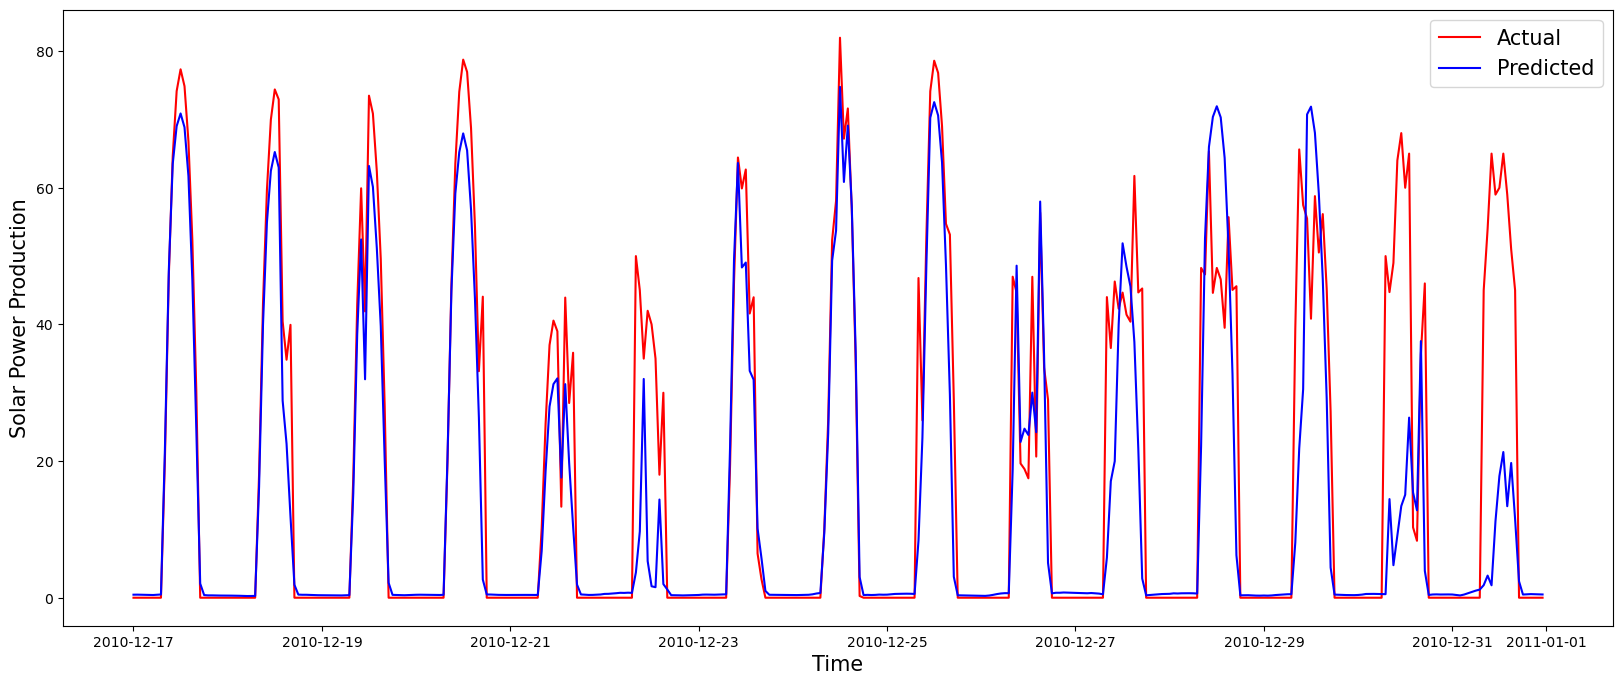

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Loading the data
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the Stacked LSTM model
model = Sequential()
model.add(GRU(16, activation='relu', return_sequences=False, input_shape=(1, len(feature_variables))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
index = pd.date_range(start=data.index[-360], periods=360, freq='H')
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=index)

# Plotting the actual solar power output versus predicted solar power output values
plt.figure(figsize=(20, 8))
plt.plot(testing_data[target_variable], label='Actual', color='red')
plt.plot(next360_predictions[target_variable], label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()


In [22]:
# Calculate accuracy metrics
y_test = testing_data[target_variable].values  # Extracting the target variable from testing_data
rmse = np.sqrt(mean_squared_error(y_test, predictions))
nmae = np.mean(np.abs(next360_predictions[target_variable] - testing_data[target_variable])) / 100
mae = mean_absolute_error(y_test, predictions)
#mape = np.mean(np.abs((predictions - y_test) / np.clip(y_test, a_min=1e-8, a_max=None))) * 100

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")
#print(f"MAPE: {mape:.2f}")

RMSE: 14.03
NMAE: 0.07
MAE: 6.68


7. Stacked GRU model (multivariate model)

12/12 [==============================] - 0s 1ms/step


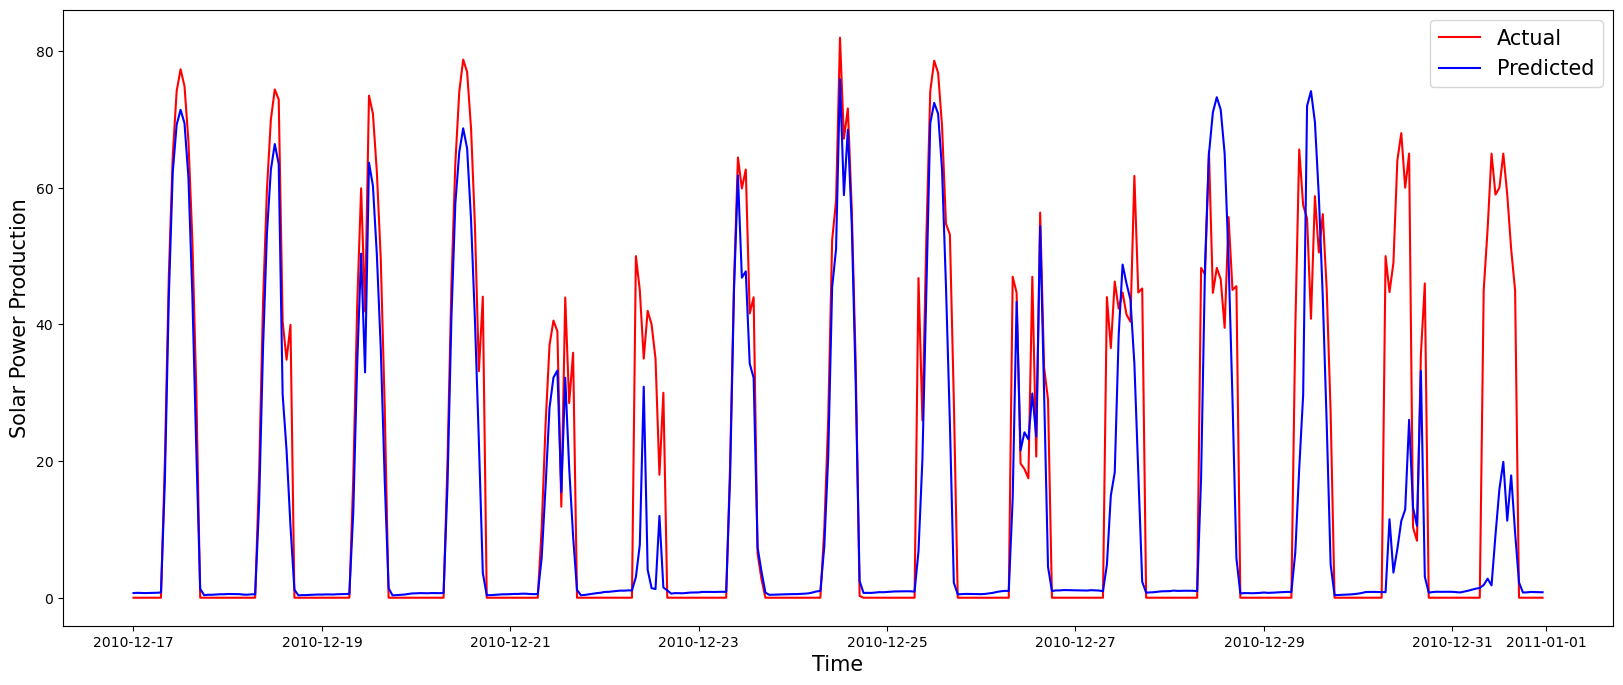

RMSE: 14.60
NMAE: 0.07
MAE: 7.19


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Loading the data
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for GRU input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the Stacked GRU model
model = Sequential()
model.add(GRU(16, activation='relu', return_sequences=True, input_shape=(1, len(feature_variables))))

model.add(GRU(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
index = pd.date_range(start=data.index[-360], periods=360, freq='H')
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=index)

# Plotting the actual solar power output versus predicted solar power output values
plt.figure(figsize=(20, 8))
plt.plot(testing_data[target_variable], label='Actual', color='red')
plt.plot(next360_predictions[target_variable], label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()

# Calculate accuracy metrics
y_test = testing_data[target_variable].values  # Extracting the target variable from testing_data
rmse = np.sqrt(mean_squared_error(testing_data[target_variable], next360_predictions[target_variable]))
nmae = np.mean(np.abs(next360_predictions[target_variable] - testing_data[target_variable])) / 100
mae = mean_absolute_error(y_test, predictions)
#mape = np.mean(np.abs((predictions - y_test) / np.clip(y_test, a_min=1e-8, a_max=None))) * 100

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")
#print(f"MAPE: {mape:.2f}")


8. Encoder-Decoder LSTM

12/12 [==============================] - 0s 1ms/step


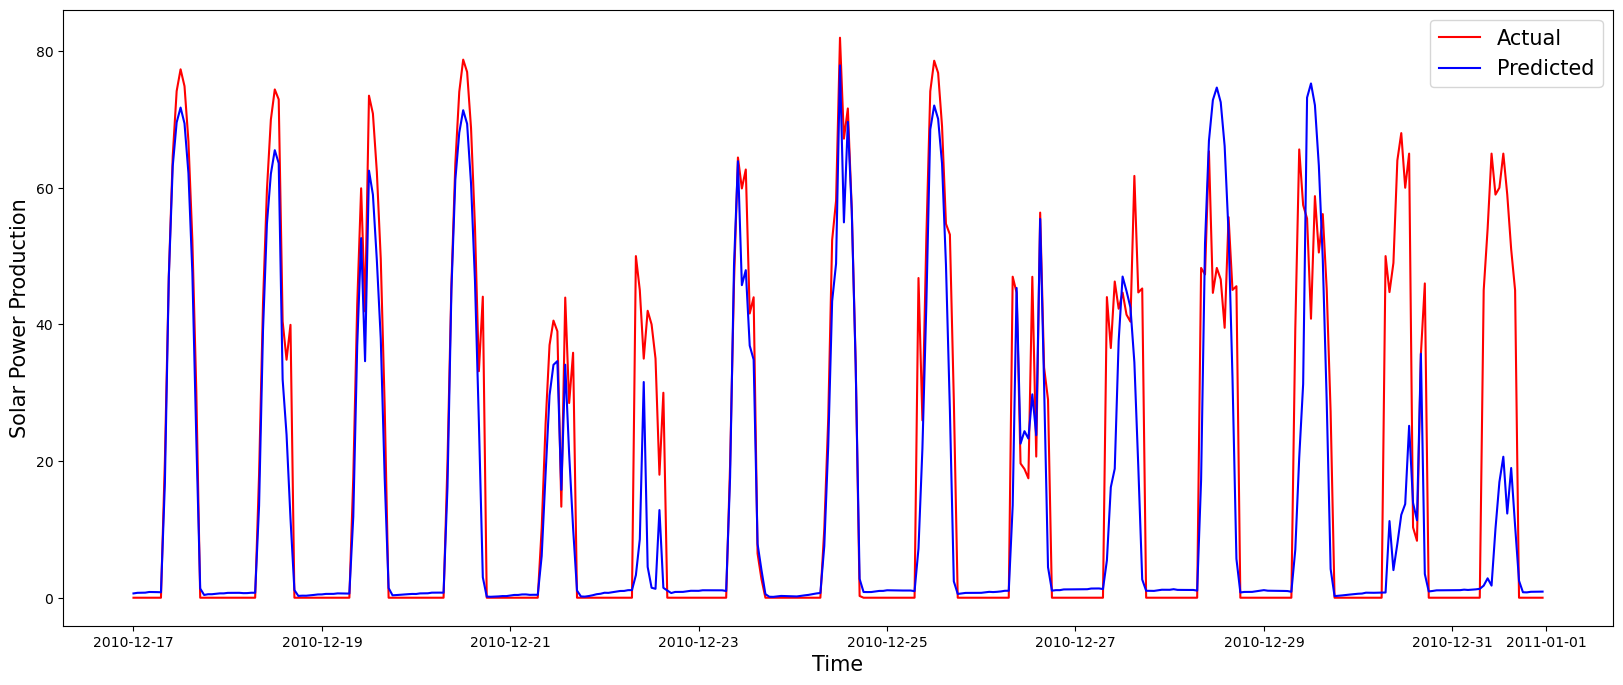

RMSE: 14.40
NMAE: 0.07
MAE: 6.97


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense

# Loading the data
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the Encoder-Decoder LSTM model
model = Sequential()
# Encoder
model.add(LSTM(32, activation='relu', input_shape=(1, len(feature_variables)), return_sequences=False))
model.add(RepeatVector(1)) # Replicate the encoder output (last hidden state) for each time step in the output sequence
# Decoder
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)
predictions = predictions.reshape(-1,1) # Flatten predictions to 1D

# Create a DataFrame to store the predictions
index = pd.date_range(start=data.index[-360], periods=360, freq='H')
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=index)

# Plotting the actual solar power output versus predicted solar power output values
plt.figure(figsize=(20, 8))
plt.plot(testing_data[target_variable], label='Actual', color='red')
plt.plot(next360_predictions[target_variable], label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()

# Calculate accuracy metrics
y_test = testing_data[target_variable].values  # Extracting the target variable from testing_data
rmse = np.sqrt(mean_squared_error(y_test, predictions))
nmae = np.mean(np.abs(next360_predictions[target_variable]- testing_data[target_variable])) / 100
mae = mean_absolute_error(y_test, predictions)

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")


9. Bidirectional LSTM

12/12 [==============================] - 0s 1ms/step


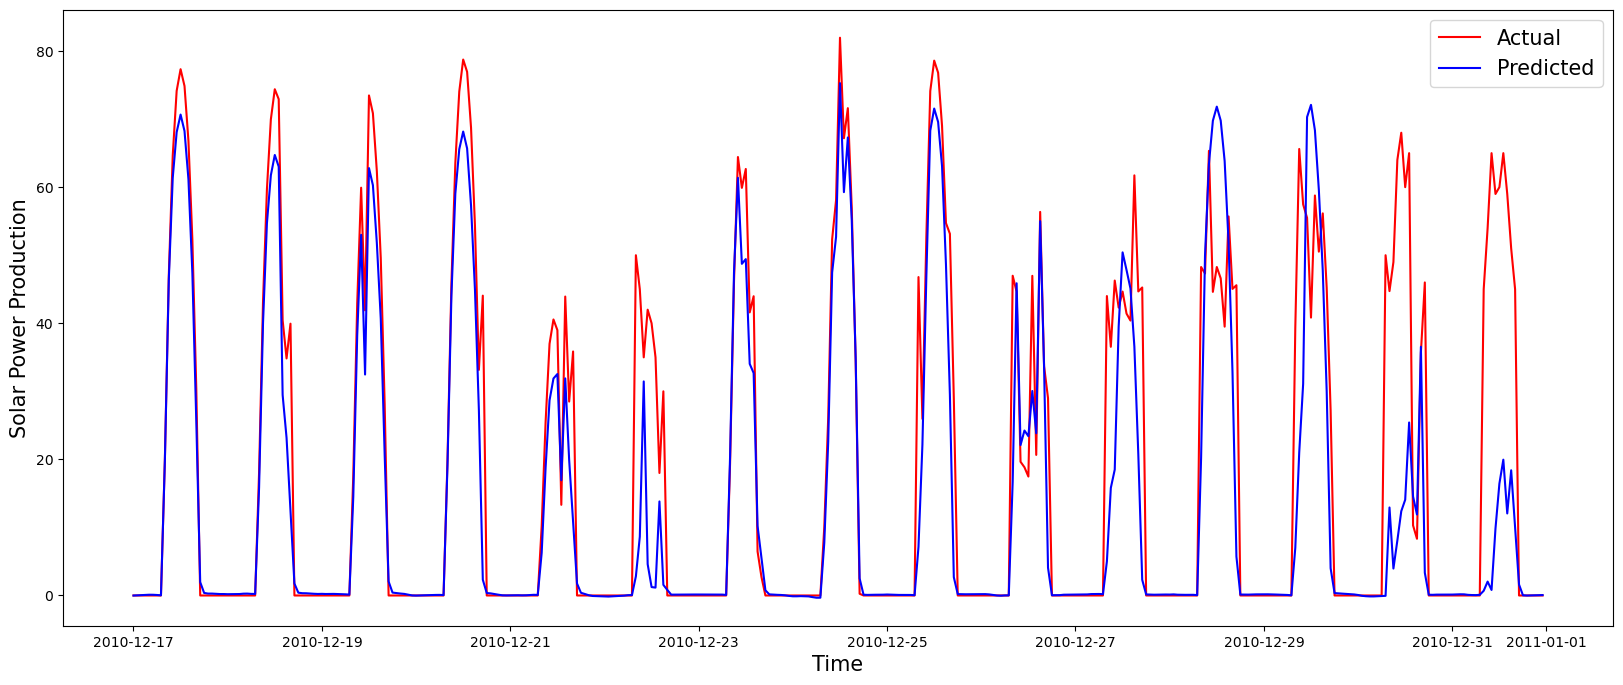

RMSE: 14.28
MAE: 6.56
NMAE: 0.08


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

# Loading the data
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the Bi-directional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(16, activation='relu', return_sequences=False), input_shape=(1, len(feature_variables))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
index = pd.date_range(start=data.index[-360], periods=360, freq='H')
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=index)

# Plotting the actual solar power output versus predicted solar power output values
plt.figure(figsize=(20, 8))
plt.plot(testing_data[target_variable], label='Actual', color='red')
plt.plot(next360_predictions[target_variable], label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()
# Calculate RMSE, MAE and NMAE
y_true = testing_data[target_variable].values
rmse = np.sqrt(mean_squared_error(y_true, next360_predictions[target_variable]))
mae = mean_absolute_error(testing_data[target_variable], predictions)
nmae = mae / (y_true.max() - y_true.min())  # Normalized MAE

# Print the RMSE, MAE and NMAE
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'NMAE: {nmae:.2f}')

10. ARIMA-LSTM (univariate)- Hybrid Model

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA

# Load the data into a Pandas DataFrame
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Define the target variable
target = 'output'

# Set up the feature and target arrays
X = data.drop(target, axis=1).values
y = data[target].values

# Split the data into training and testing sets
train_size = len(X) - 360
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train an ARIMA model
arima_model = ARIMA(y_train, order=(3, 0, 5))
arima_model_fit = arima_model.fit()

# Use the ARIMA model to forecast the future values
arima_forecast = arima_model_fit.forecast(steps=len(X_test))

# Reshape arima_forecast to match the shape of X_test
arima_forecast = arima_forecast.reshape(-1, 1)

# Append the ARIMA forecasts as additional features
X_test_augmented = np.hstack((X_test, arima_forecast))

# Train another ARIMA model on full data
arima_model_full = ARIMA(y, order=(3, 0, 5))
arima_model_full_fit = arima_model_full.fit()

# Use the ARIMA model to forecast the future values for the training data
arima_forecast_train = arima_model_full_fit.forecast(steps=len(X_train))

# Reshape arima_forecast_train to match the shape of X_train
arima_forecast_train = arima_forecast_train.reshape(-1, 1)

# Append the ARIMA forecasts as additional features
X_train_augmented = np.hstack((X_train, arima_forecast_train))

# Preprocessing
scaler_X = StandardScaler()
X_train_augmented = scaler_X.fit_transform(X_train_augmented)
X_test_augmented = scaler_X.transform(X_test_augmented)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

# Reshape the input data for LSTM
X_train_augmented = X_train_augmented.reshape(X_train_augmented.shape[0], 1, X_train_augmented.shape[1])
X_test_augmented = X_test_augmented.reshape(X_test_augmented.shape[0], 1, X_test_augmented.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=32, input_shape=(1, X_train_augmented.shape[2])))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model to the training data
model.fit(X_train_augmented, y_train, epochs=50, batch_size=32, verbose=1)

# Use the trained model to predict the output values for the test set
predictions = model.predict(X_test_augmented)
predictions = scaler_y.inverse_transform(predictions)

# Inverse transform the y_test to get it back to the original scale
y_test = scaler_y.inverse_transform(y_test)

# Calculate the mean squared error of the model
rmse = np.sqrt(mean_squared_error(y_test, predictions))
nmae = mean_absolute_error(y_test, predictions) / 100

# Print the performance metrics
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")



C:\Users\ASEDAI\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ASEDAI\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Epoch 1/50
263/263 [==============================] - 2s 2ms/step - loss: 0.2661
Epoch 2/50
263/263 [==============================] - 1s 2ms/step - loss: 0.0518
Epoch 3/50
263/263 [==============================] - 0s 2ms/step - loss: 0.0466
Epoch 4/50
263/263 [==============================] - 1s 2ms/step - loss: 0.0453
Epoch 5/50
263/263 [==============================] - 1s 2ms/step - loss: 0.0445
Epoch 6/50
263/263 [==============================] - 1s 2ms/step - loss: 0.0439
Epoch 7/50
263/263 [==============================] - 0s 2ms/step - loss: 0.0433
Epoch 8/50
263/263 [==============================] - 1s 2ms/step - loss: 0.0429
Epoch 9/50
263/263 [==============================] - 1s 2ms/step - loss: 0.0425
Epoch 10/50
263/263 [==============================] - 1s 2ms/step - loss: 0.0422
Epoch 11/50
263/263 [==============================] - 1s 2ms/step - loss: 0.0418
Epoch 12/50
263/263 [==============================] - 1s 2ms/step - loss: 0.0415
Epoch 13/50
263/263 [====

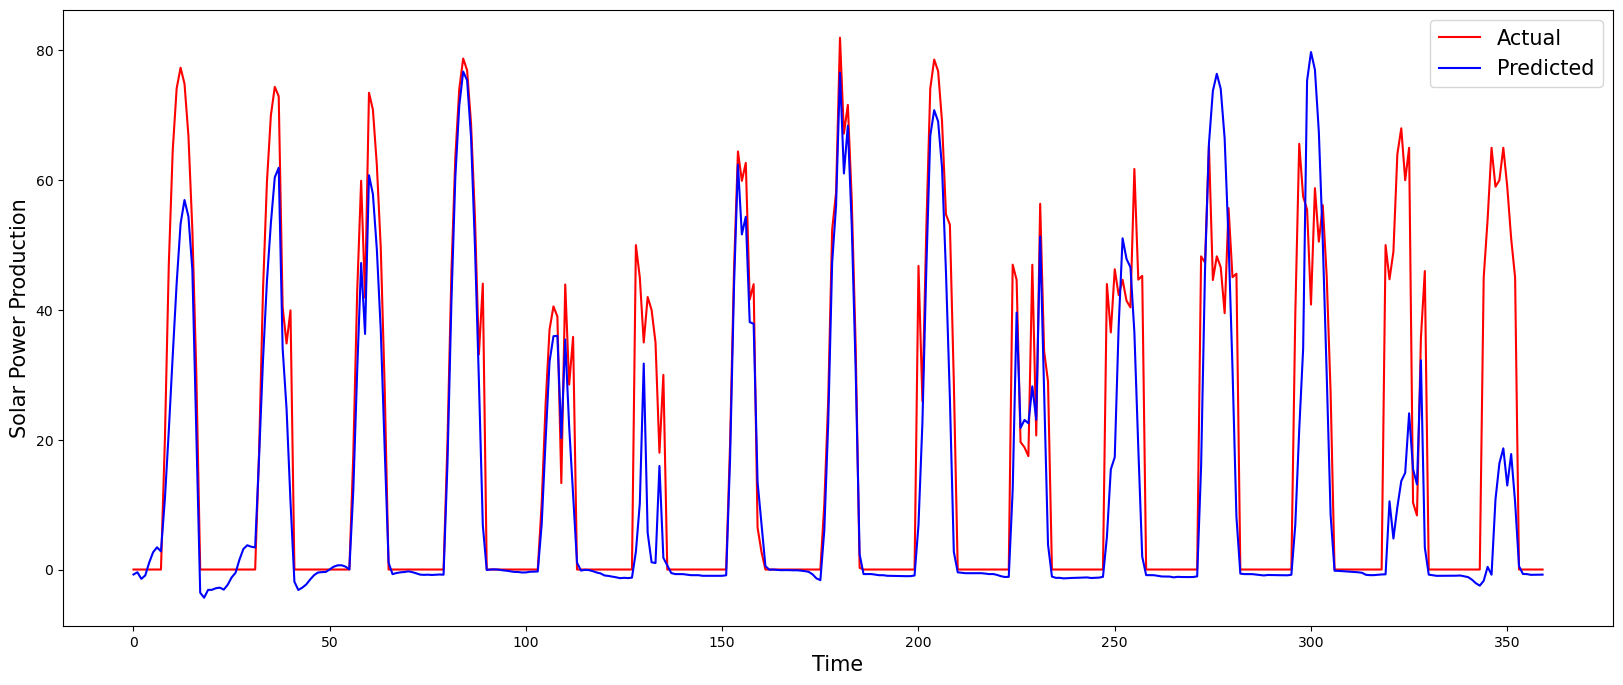

In [27]:
plt.figure(figsize=(20, 8))
plt.plot(y_test, label='Actual', color='red')
plt.plot(predictions, label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)

plt.show()

11. Random Forest(Multivariate LSTM)

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Loading the data
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'
data.head(20)

output  DNI  DHI  GHI  Temperature  Wind Speed
time                                                                 
2010-01-01 00:00:00   0.00000    0    0    0         -1.0         3.3
2010-01-01 01:00:00   0.00000    0    0    0         -1.0         3.3
2010-01-01 02:00:00   0.00000    0    0    0         -1.0         3.4
2010-01-01 03:00:00   0.00000    0    0    0         -2.0         3.5
2010-01-01 04:00:00   0.00000    0    0    0         -2.0         3.4
2010-01-01 05:00:00   0.00000    0    0    0         -2.0         3.0
2010-01-01 06:00:00   0.00000    0    0    0         -2.0         2.8
2010-01-01 07:00:00   0.00000    0    0    0         -2.0         2.8
2010-01-01 08:00:00   1.57558    0   32   32         -1.0         3.3
2010-01-01 09:00:00   9.25620   18  104  109          0.0         3.8
2010-01-01 10:00:00  17.05120   31  167  180          0.0         3.5
2010-01-01 11:00:00  22.69450   46  213  236          1.0         2.8
2010-01-01 12:00:00  25.72540   53  239  268          2.0         2.0
2010-01-01 13:00:00  25.63930   57  237  268          3.0         1.4
2010-01-01 14:00:00  31.69160  150  221  293          3.0         0.8
2010-01-01 15:00:00  16.64760   47  157  174          3.0         0.4
2010-01-01 16:00:00  33.13670  601   67  203          2.0         0.2
2010-01-01 17:00:00   1.37101    0   32   32          0.0         0.3
2010-01-01 18:00:00   0.00000    0    0    0          0.0         0.5
2010-01-01 19:00:00   0.00000    0    0    0          0.0         0.8

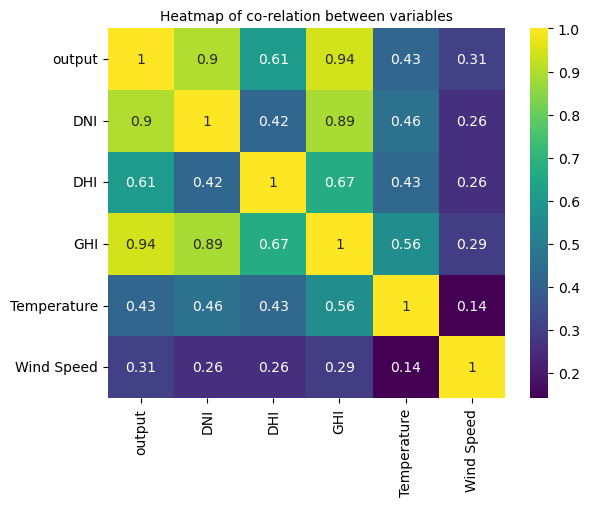

In [29]:
#plotting a correlation heatmap between variables
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=10)
plt.show()

In [30]:
# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]
X_test = testing_data[feature_variables]
y_test = testing_data[target_variable]

In [31]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt']
}

# Create a RandomForestRegressor model
model = RandomForestRegressor(random_state=43)

# Create the grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create a new model with the best parameters
best_model = RandomForestRegressor(**best_params, random_state=43)

# Fit the best model
best_model.fit(X_train, y_train)

# Make predictions
predictions = best_model.predict(X_test)
# Create a DataFrame to store the predictions
index = pd.date_range(start=data.index[-360], periods=360, freq='H')
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=index)


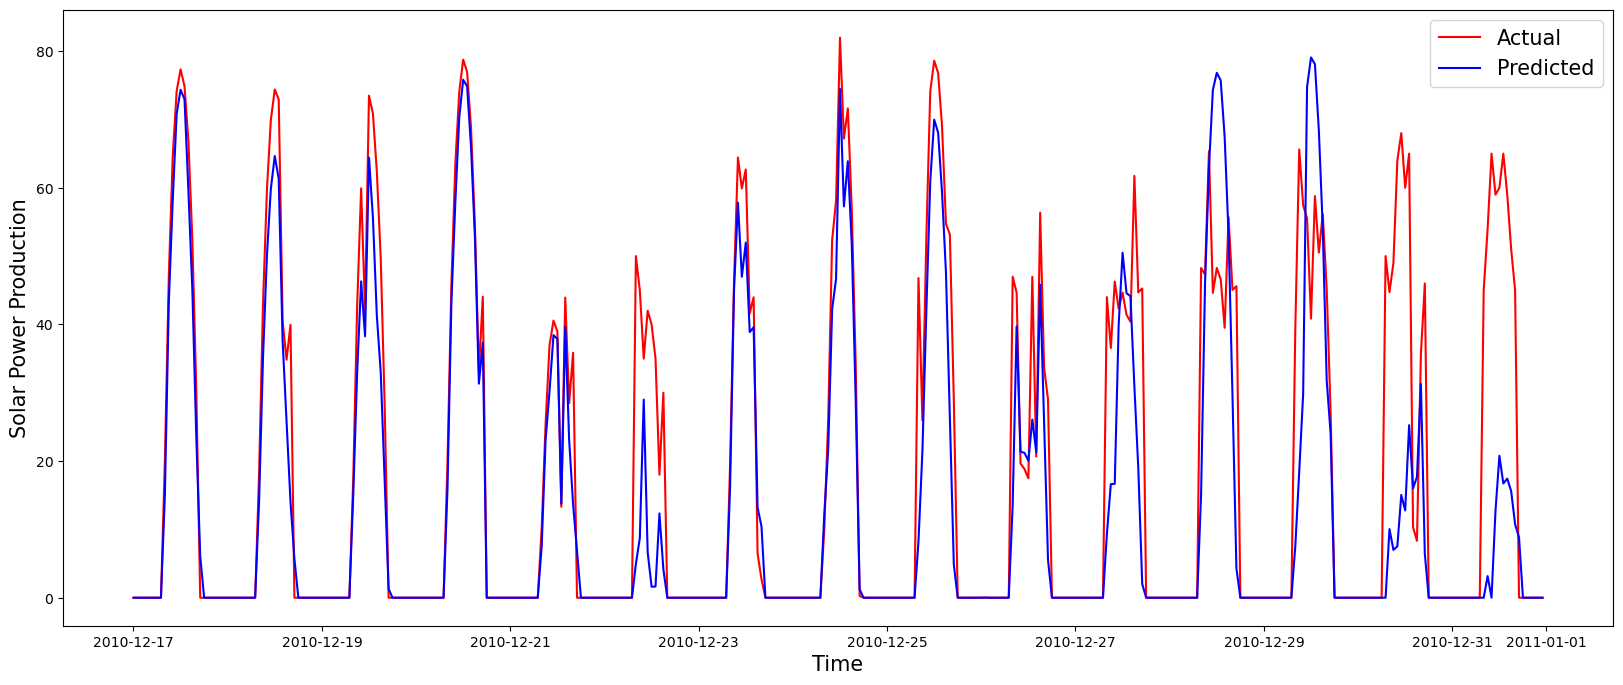

In [32]:

# Plotting the actual solar power output versus predicted solar power output values
plt.figure(figsize=(20, 8))
plt.plot(testing_data[target_variable], label='Actual', color='red')
plt.plot(next360_predictions[target_variable], label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()


In [33]:
# prediction accuracy metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
#nmae = np.mean(np.abs(predictions - y_test)) / np.mean(y_test)
nmae = np.mean(np.abs(predictions - y_test)) / 100
mae = mean_absolute_error(y_test, predictions)

#r_squared = 1 - (np.sum((y_test - predictions)**2) / np.sum((y_test - np.mean(y_test))**2)) 

#print(f"R-Squared: {r_squared:.2f}")

# Calculate MAPE excluding zero values

# Priniting the accuracy result
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")


RMSE: 14.30
NMAE: 0.07
MAE: 6.59


**B. 3 days ahead prediction**

1. Random Forest

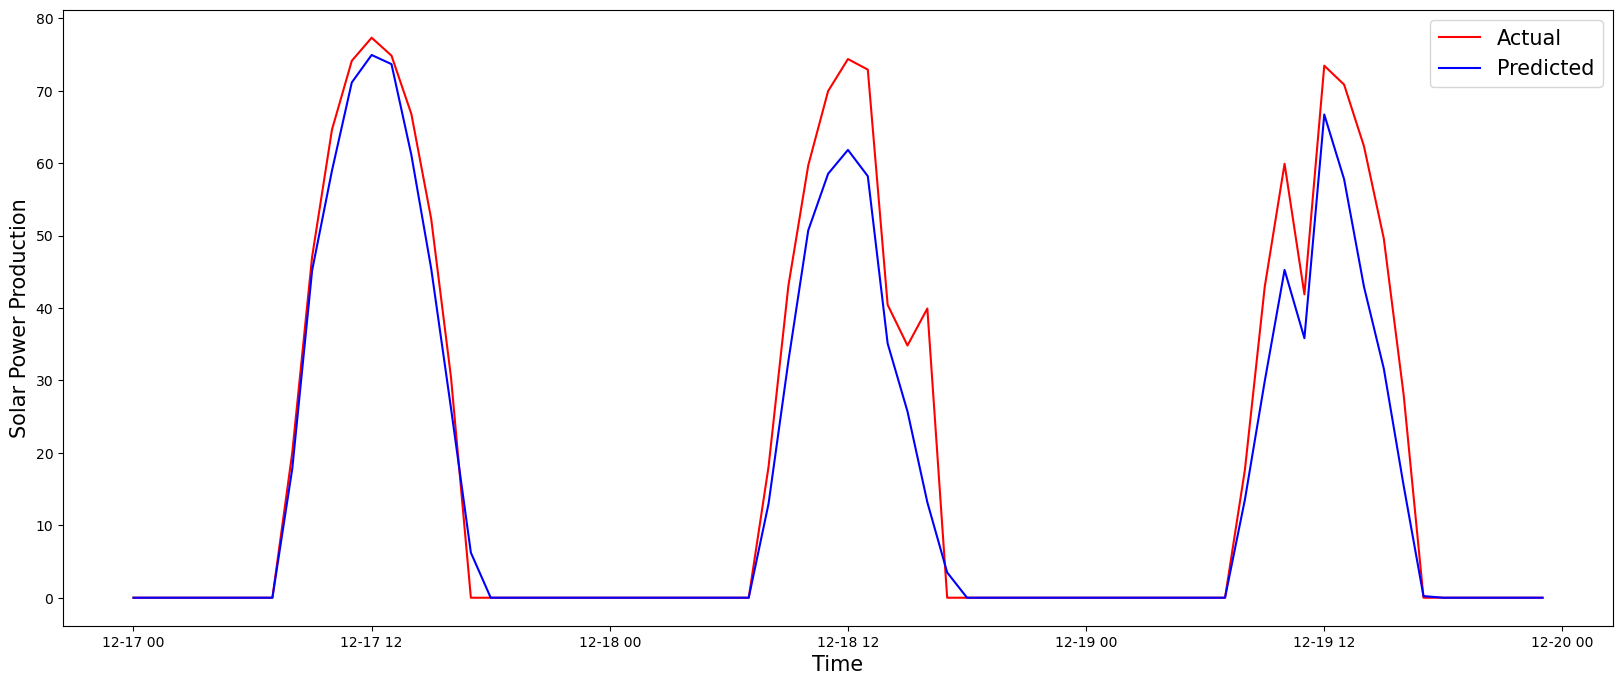

RMSE: 6.73
NMAE: 0.07
MAE: 3.54
r-squared: 0.94


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Define the list of feature names and the target variable name
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Split the dataset into a training set and a test set
training_data = data[:-360]
testing_data = data[-360:-288]

# Split the training set and the test set into features and target
X_train = training_data[feature_variables]
y_train = training_data[target_variable]
X_test = testing_data[feature_variables]
y_test = testing_data[target_variable]

# Create a RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Use the model to make predictions on the test set
predictions = model.predict(X_test)

# Create a DataFrame with the predictions and the corresponding dates
index = pd.date_range(start=data.index[-360:-288][0], periods=72, freq='H')
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=index)

# Plot the actual and predicted solar power output
plt.figure(figsize=(20, 8))
plt.plot(testing_data[target_variable], label='Actual', color='red')
plt.plot(next360_predictions[target_variable], label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Calculate the Normalized Mean Absolute Error (NMAE)
nmae = mae / 100

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)
# Print the performance metrics
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")
print(f"r-squared: {r2_test:.2f}")


2. Stacked LSTM (Multivariate)

3/3 [==============================] - 0s 2ms/step


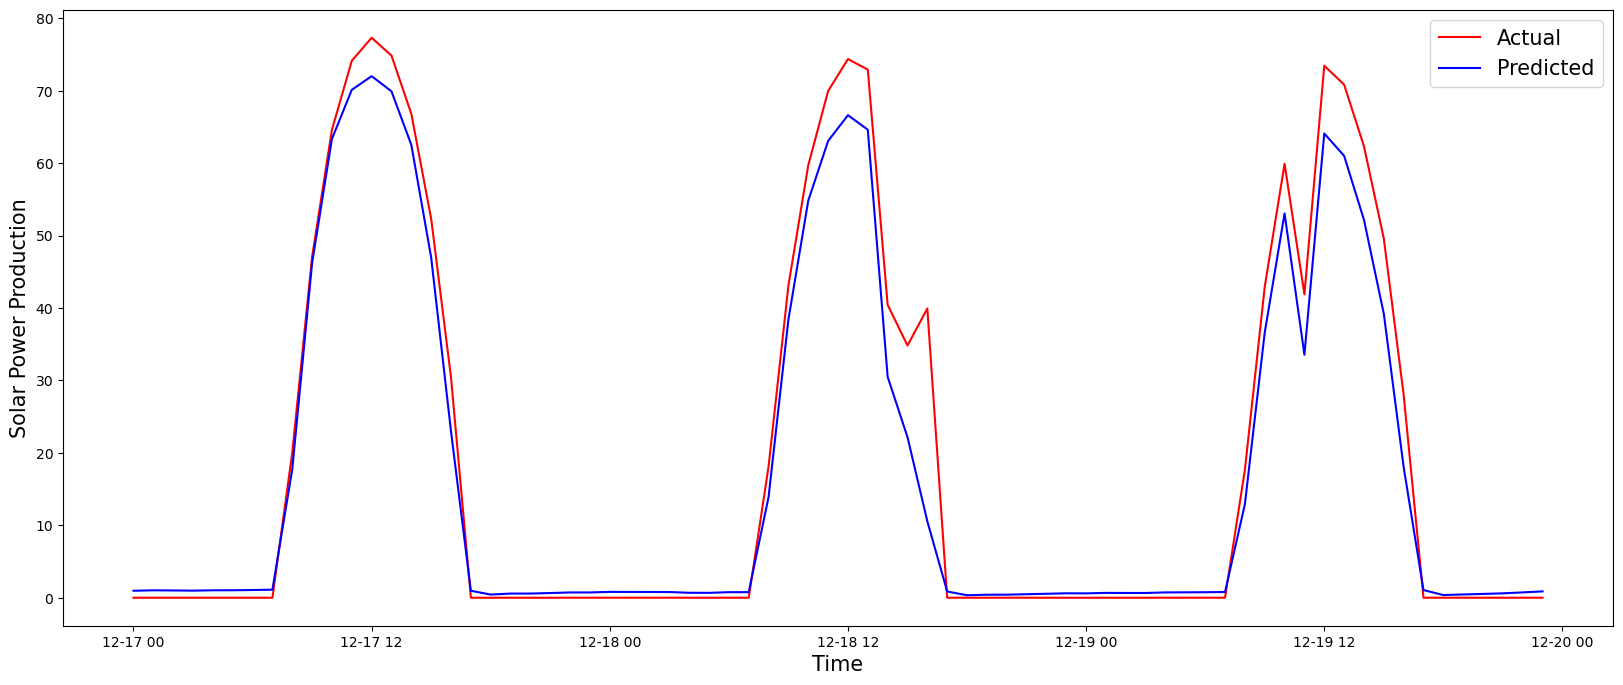

RMSE: 5.58
NMAE: 0.04
MAE: 3.24
r-sqaured: 0.96


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Loading the data
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-288]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the Stacked LSTM model
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=True, input_shape=(1, len(feature_variables))))
model.add(LSTM(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
index = pd.date_range(start=data.index[-360:-288][0], periods=72, freq='H')
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=index)

# Plotting the actual solar power output versus predicted solar power output values
plt.figure(figsize=(20, 8))
plt.plot(testing_data[target_variable], label='Actual', color='red')
plt.plot(next360_predictions[target_variable], label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()
# Calculate accuracy metrics
y_test = testing_data[target_variable].values  # Extracting the target variable from testing_data
rmse = np.sqrt(mean_squared_error(y_test, predictions))
nmae = mae / 100
mae = mean_absolute_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)
#mape = np.mean(np.abs((predictions - y_test) / np.clip(y_test, a_min=1e-8, a_max=None))) * 100

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")
print(f"r-sqaured: {r2_test:.2f}")
#print(f"MAPE: {mape:.2f}")


3. Stacked GRU (Multivariate)

3/3 [==============================] - 0s 3ms/step


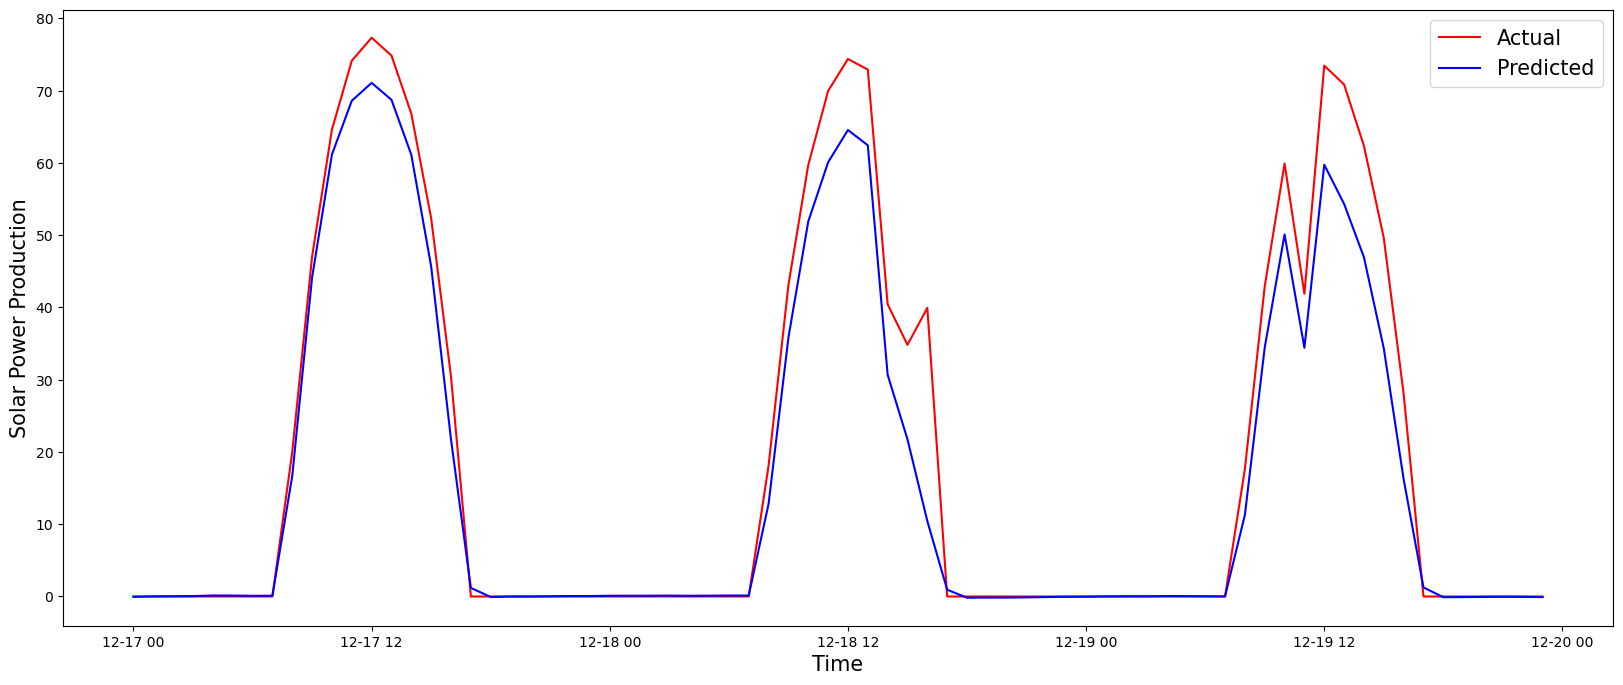

RMSE: 6.68
NMAE: 0.26
MAE: 3.65


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Loading the data
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-288]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for GRU input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the Stacked GRU model
model = Sequential()
model.add(GRU(32, activation='relu', return_sequences=True, input_shape=(1, len(feature_variables))))

model.add(GRU(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
index = pd.date_range(start=data.index[-360:-288][0], periods=72, freq='H')
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=index)

# Plotting the actual solar power output versus predicted solar power output values
plt.figure(figsize=(20, 8))
plt.plot(testing_data[target_variable], label='Actual', color='red')
plt.plot(next360_predictions[target_variable], label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()

# Calculate accuracy metrics
y_test = testing_data[target_variable].values  # Extracting the target variable from testing_data
rmse = np.sqrt(mean_squared_error(y_test, predictions))
nmae = np.mean(np.abs(predictions - y_test)) / 100
mae = mean_absolute_error(y_test, predictions)
#mape = np.mean(np.abs((predictions - y_test) / np.clip(y_test, a_min=1e-8, a_max=None))) * 100

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")
#print(f"MAPE: {mape:.2f}")


4. Encoder-Decoder LSTM

3/3 [==============================] - 0s 2ms/step


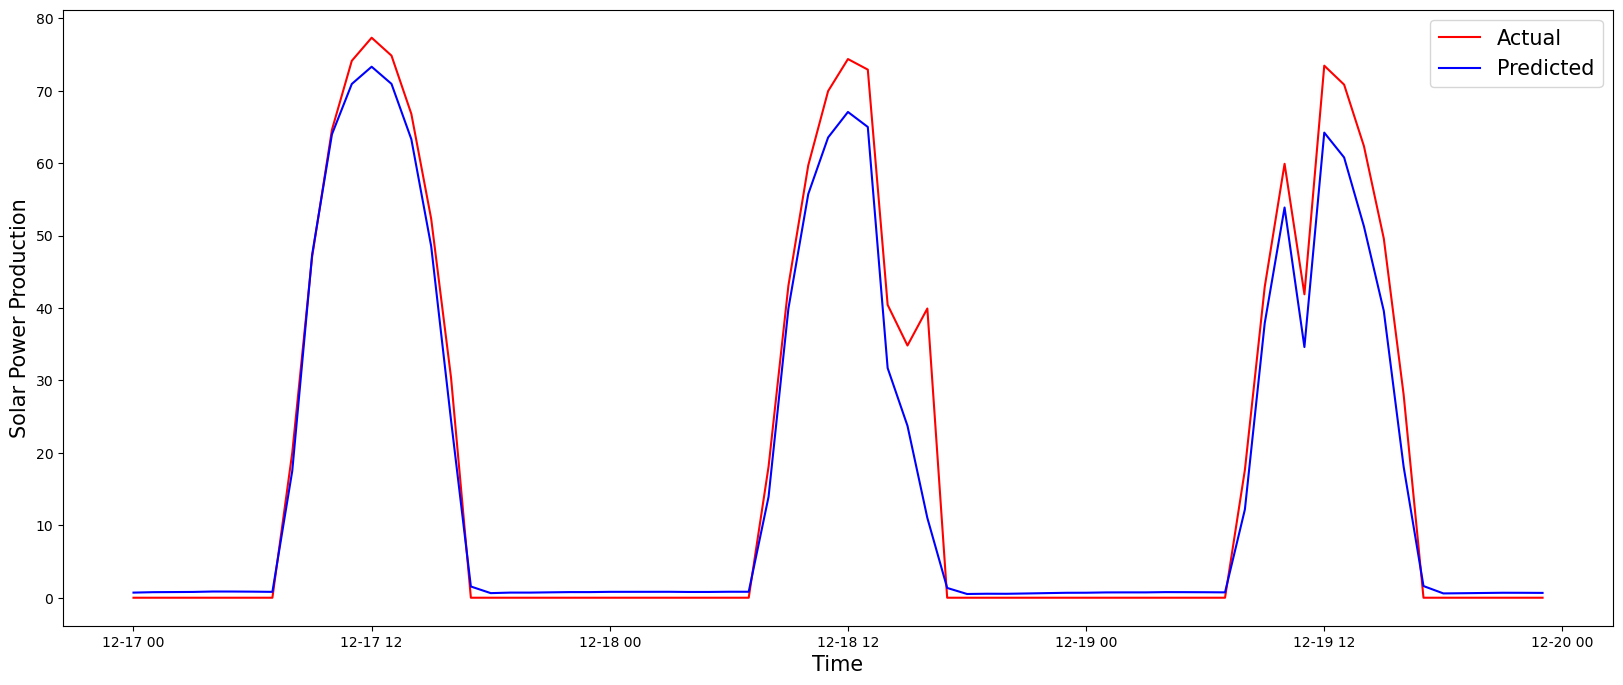

RMSE: 5.31
NMAE: 0.26
MAE: 3.04


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense

# Loading the data
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-288]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the Encoder-Decoder LSTM model
model = Sequential()
# Encoder
model.add(LSTM(32, activation='relu', input_shape=(1, len(feature_variables)), return_sequences=False))
model.add(RepeatVector(1)) # Replicate the encoder output (last hidden state) for each time step in the output sequence
# Decoder
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)
predictions = predictions.reshape(-1,1) # Flatten predictions to 1D

# Create a DataFrame to store the predictions
index = pd.date_range(start=data.index[-360:-288][0], periods=72, freq='H')
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=index)

# Plotting the actual solar power output versus predicted solar power output values
plt.figure(figsize=(20, 8))
plt.plot(testing_data[target_variable], label='Actual', color='red')
plt.plot(next360_predictions[target_variable], label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()

# Calculate accuracy metrics
y_test = testing_data[target_variable].values  # Extracting the target variable from testing_data
rmse = np.sqrt(mean_squared_error(y_test, predictions))
nmae = np.mean(np.abs(predictions - y_test)) / 100
mae = mean_absolute_error(y_test, predictions)

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")


5. Bi-Directional LSTM

3/3 [==============================] - 0s 2ms/step


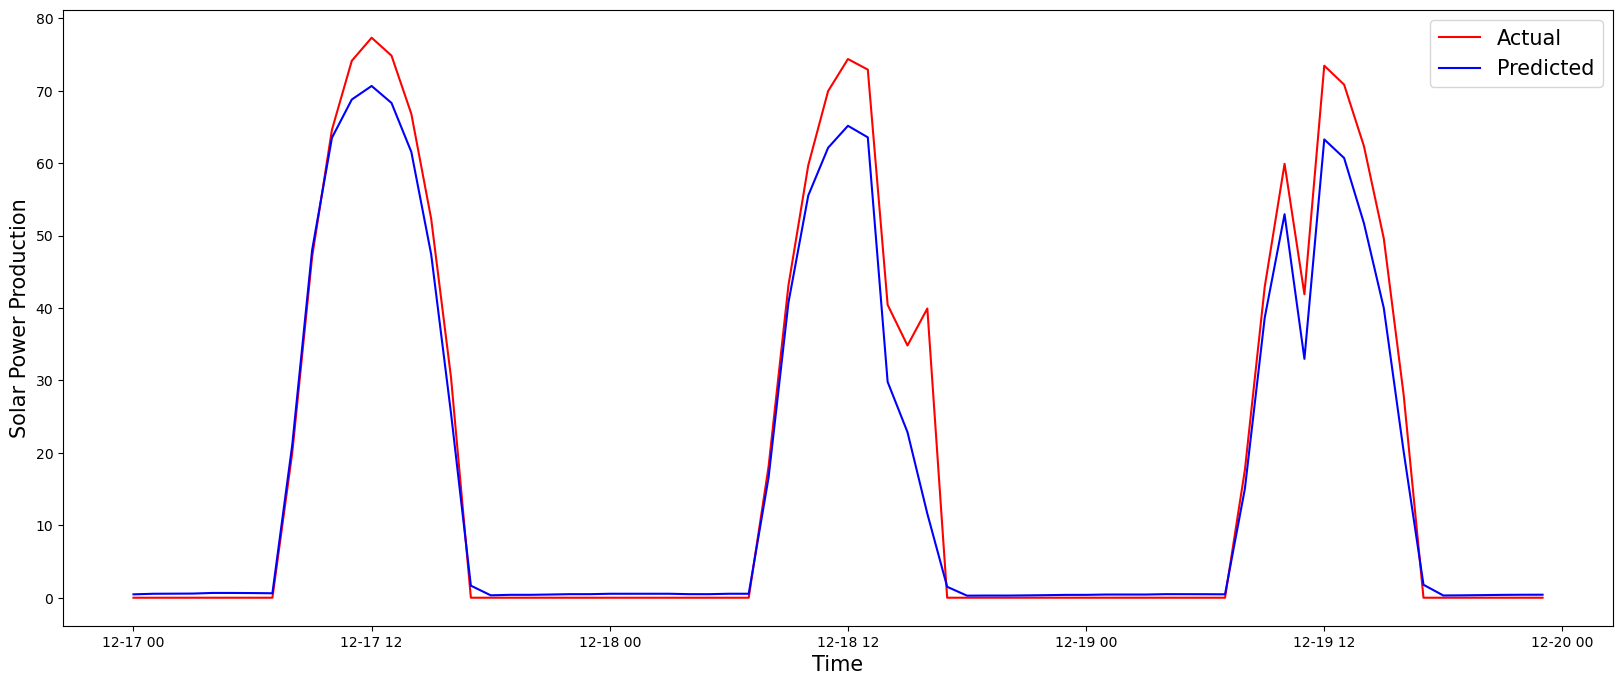

RMSE: 5.47
MAE: 3.02
NMAE: 0.03


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

# Loading the data
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-288]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the Bi-directional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(32, activation='relu', return_sequences=False), input_shape=(1, len(feature_variables))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
index = pd.date_range(start=data.index[-360:-288][0], periods=72, freq='H')
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=index)

# Plotting the actual solar power output versus predicted solar power output values
plt.figure(figsize=(20, 8))
plt.plot(testing_data[target_variable], label='Actual', color='red')
plt.plot(next360_predictions[target_variable], label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()
# Calculate RMSE, MAE and NMAE
y_true = testing_data[target_variable].values
rmse = np.sqrt(mean_squared_error(y_true, next360_predictions[target_variable]))
mae = mean_absolute_error(testing_data[target_variable], predictions)
nmae = mae / 100  # Normalized MAE

# Print the RMSE, MAE and NMAE
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'NMAE: {nmae:.2f}')

6. Multivariate LSTM

3/3 [==============================] - 0s 3ms/step


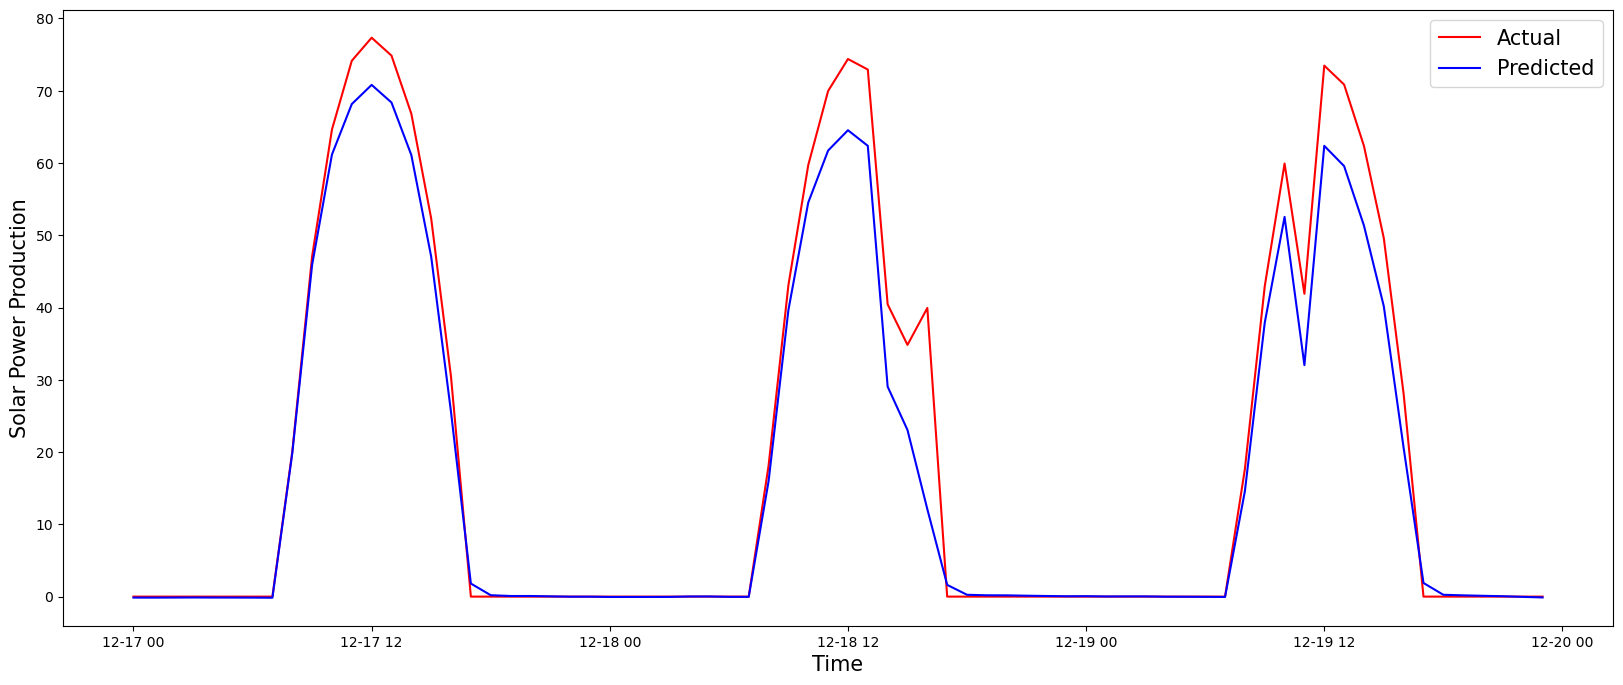

RMSE: 5.65
NMAE: 0.03
MAE: 2.98
r-sqaured: 0.96


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Loading the data
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-288]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the Stacked LSTM model
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=False, input_shape=(1, len(feature_variables))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
index = pd.date_range(start=data.index[-360:-288][0], periods=72, freq='H')
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=index)

# Plotting the actual solar power output versus predicted solar power output values
plt.figure(figsize=(20, 8))
plt.plot(testing_data[target_variable], label='Actual', color='red')
plt.plot(next360_predictions[target_variable], label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()
# Calculate accuracy metrics
y_test = testing_data[target_variable].values  # Extracting the target variable from testing_data
rmse = np.sqrt(mean_squared_error(y_test, predictions))
nmae = mae / 100
mae = mean_absolute_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)
#mape = np.mean(np.abs((predictions - y_test) / np.clip(y_test, a_min=1e-8, a_max=None))) * 100

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")
print(f"r-sqaured: {r2_test:.2f}")
#print(f"MAPE: {mape:.2f}")


7. GRU Model

3/3 [==============================] - 0s 2ms/step


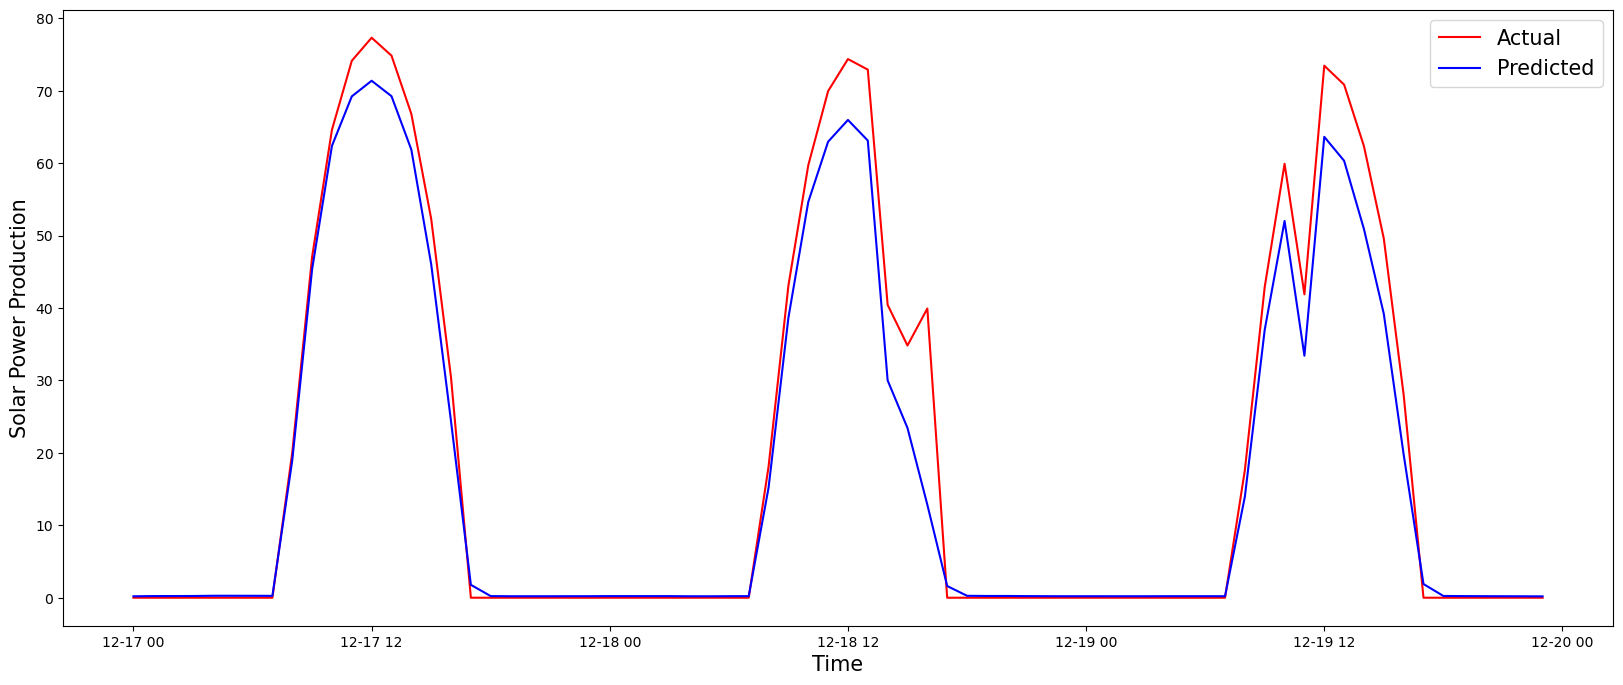

RMSE: 5.47
NMAE: 0.26
MAE: 3.00


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Loading the data
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-288]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for GRU input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the Stacked GRU model
model = Sequential()
model.add(GRU(32, activation='relu', return_sequences=False, input_shape=(1, len(feature_variables))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
index = pd.date_range(start=data.index[-360:-288][0], periods=72, freq='H')
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=index)

# Plotting the actual solar power output versus predicted solar power output values
plt.figure(figsize=(20, 8))
plt.plot(testing_data[target_variable], label='Actual', color='red')
plt.plot(next360_predictions[target_variable], label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()

# Calculate accuracy metrics
y_test = testing_data[target_variable].values  # Extracting the target variable from testing_data
rmse = np.sqrt(mean_squared_error(y_test, predictions))
nmae = np.mean(np.abs(predictions - y_test)) / 100
mae = mean_absolute_error(y_test, predictions)
#mape = np.mean(np.abs((predictions - y_test) / np.clip(y_test, a_min=1e-8, a_max=None))) * 100

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")
#print(f"MAPE: {mape:.2f}")


8. ARIMA Model (Univariate Model)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=64837.206, Time=6.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=83469.536, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=68189.189, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=75361.998, Time=1.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=87294.797, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=66450.474, Time=1.88 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=64841.698, Time=3.07 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=64841.915, Time=3.62 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=64739.208, Time=8.14 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=66111.193, Time=3.60 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=64820.642, Time=9.35 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=64728.981, Time=8.86 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=65923.978, Time=4.54 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=64735.075, Time=10.82 sec
 ARIMA(2,0,5)(0,0,

C:\Users\ASEDAI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\ASEDAI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\ASEDAI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\ASEDAI\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                 output   No. Observations:                 8400
Model:                 ARIMA(3, 0, 5)   Log Likelihood              -30897.413
Date:                Sat, 27 May 2023   AIC                          61814.827
Time:                        17:21:30   BIC                          61885.187
Sample:                    01-01-2010   HQIC                         61838.851
                         - 12-16-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.1037      0.296     71.361      0.000      20.524      21.683
ar.L1          1.2647      1.504      0.841      0.400      -1.683       4.212
ar.L2          0.1228      2.749      0.045      0.9

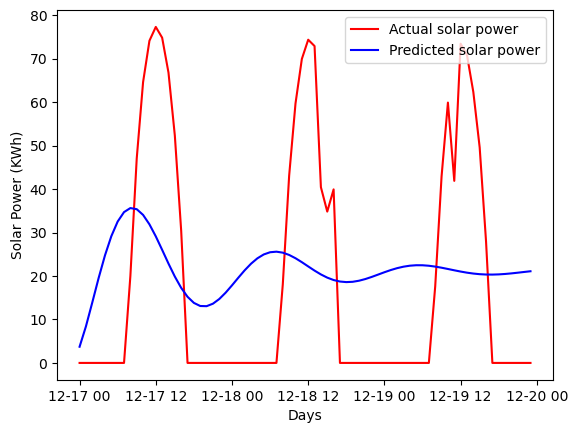

NMAE: 1.22
R-Squared: 0.08


In [77]:
# Import Basic Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# preprocessing data

df = pd.read_csv(r"C:\Users\ASEDAI\Downloads\datamv.csv", usecols=[0, 1], index_col=0, parse_dates=[0], dayfirst=True)
df = pd.DataFrame(df['output'])

train = df.iloc[:8400, 0]
test = df.iloc[8400:, 0]

# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

Decomp_results = seasonal_decompose(df)

#Decomp_results.plot()

#Decomp_results.seasonal.plot()

# Finding the Parameters (p,d,q)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#plot_acf(train, lags=50)

#plot_pacf(train, lags=50)

from pmdarima import auto_arima

auto_arima(df, trace=True)

# Developing ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

A_Model = ARIMA(train, order=(3, 0, 5))

predictor = A_Model.fit()

predictor.summary()
print(predictor.summary())

# Predicting the first 72 hours
Predicted_results = predictor.predict(start=len(train), end=len(train) + 71, typ='levels')

# Plotting result
plt.plot(test[:72], color='red', label='Actual solar power')
plt.plot(Predicted_results, color='blue', label='Predicted solar power')
plt.xlabel('Days')
plt.ylabel('Solar Power (KWh)')
plt.legend()
plt.show()

nmae = np.mean(np.abs(Predicted_results - test[:72])) / np.mean(test[:72])
r_squared = 1 - (np.sum((test[:72] - Predicted_results) ** 2) / np.sum((test[:72] - np.mean(test[:72])) ** 2))

# Print the performance metrics
print(f"NMAE: {nmae:.2f}")
print(f"R-Squared: {r_squared:.2f}")


9. Univariate LSTM Model

Epoch 1/50
262/262 [==============================] - 5s 10ms/step - loss: 0.0425
Epoch 2/50
262/262 [==============================] - 3s 11ms/step - loss: 0.0122
Epoch 3/50
262/262 [==============================] - 3s 11ms/step - loss: 0.0104
Epoch 4/50
262/262 [==============================] - 3s 10ms/step - loss: 0.0098
Epoch 5/50
262/262 [==============================] - 3s 10ms/step - loss: 0.0093
Epoch 6/50
262/262 [==============================] - 3s 10ms/step - loss: 0.0088
Epoch 7/50
262/262 [==============================] - 3s 11ms/step - loss: 0.0084
Epoch 8/50
262/262 [==============================] - 3s 10ms/step - loss: 0.0082
Epoch 9/50
262/262 [==============================] - 3s 11ms/step - loss: 0.0081
Epoch 10/50
262/262 [==============================] - 3s 11ms/step - loss: 0.0080
Epoch 11/50
262/262 [==============================] - 3s 11ms/step - loss: 0.0079
Epoch 12/50
262/262 [==============================] - 3s 11ms/step - loss: 0.0079
Epoch 13/50
2

INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


1/1 [==============================] - 0s 24ms/step


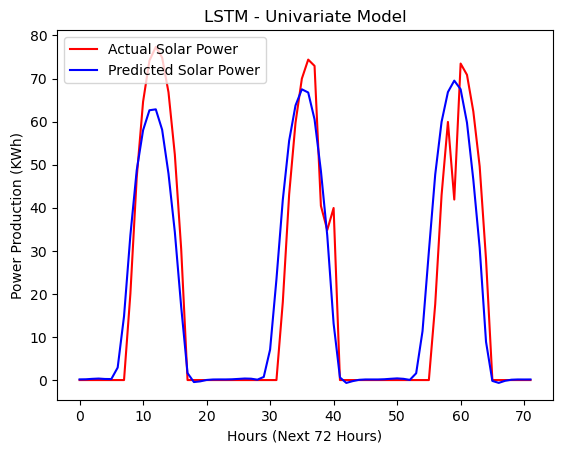

RMSE: 10.83188823184749
MAE: 6.505209292961782
NMAE: 0.06505209292961782


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load and preprocess data
df = pd.read_csv(r'C:\Users\ASEDAI\Downloads\just output.csv', parse_dates=['time'], index_col='time')
df.dropna(inplace=True)

# Define training and testing data
train_data = df.iloc[:8400, 0:1].values
test_data = df.iloc[8400:8472, 0:1].values  # Next 72 hours

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

# Create training sets
X_train = []
y_train = []
window_size = 24

for i in range(window_size, len(train_scaled)):
    X_train.append(train_scaled[i-window_size:i, 0])
    y_train.append(train_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Define LSTM model
model = Sequential()
model.add(LSTM(units=32, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Save the model
model.save('LSTM')

# Load the saved model
from keras.models import load_model
model = load_model('LSTM')

# Predict future solar power output
inputs = train_scaled[-window_size:]
inputs = inputs.reshape(-1, 1)
inputs = np.reshape(inputs, (1, inputs.shape[0], 1))

predictions = []
for _ in range(72):  # Predict next 72 hours
    prediction = model.predict(inputs)
    predictions.append(prediction[0, 0])
    inputs = np.roll(inputs, -1)
    inputs[0, -1, 0] = prediction

# Inverse transform the predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Flatten the test data
test_data_flattened = test_data.flatten()

# Plot the results
plt.plot(test_data, color='red', label='Actual Solar Power')
plt.plot(predictions, color='blue', label='Predicted Solar Power')
plt.title('LSTM - Univariate Model')
plt.xlabel('Hours (Next 72 Hours)')
plt.ylabel('Power Production (KWh)')
plt.legend()
plt.show()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data_flattened, predictions.flatten()))

# Calculate MAE
mae = mean_absolute_error(test_data_flattened, predictions.flatten())

# Calculate NMAE
nmae = mae / 100

print("RMSE:", rmse)
print("MAE:", mae)
print("NMAE:", nmae)


10 . SVR Univariate Model

RMSE (First 72 Hours): 9.52
NMAE (First 72 Hours): 0.05
r-squared (First 72 Hours): 0.88


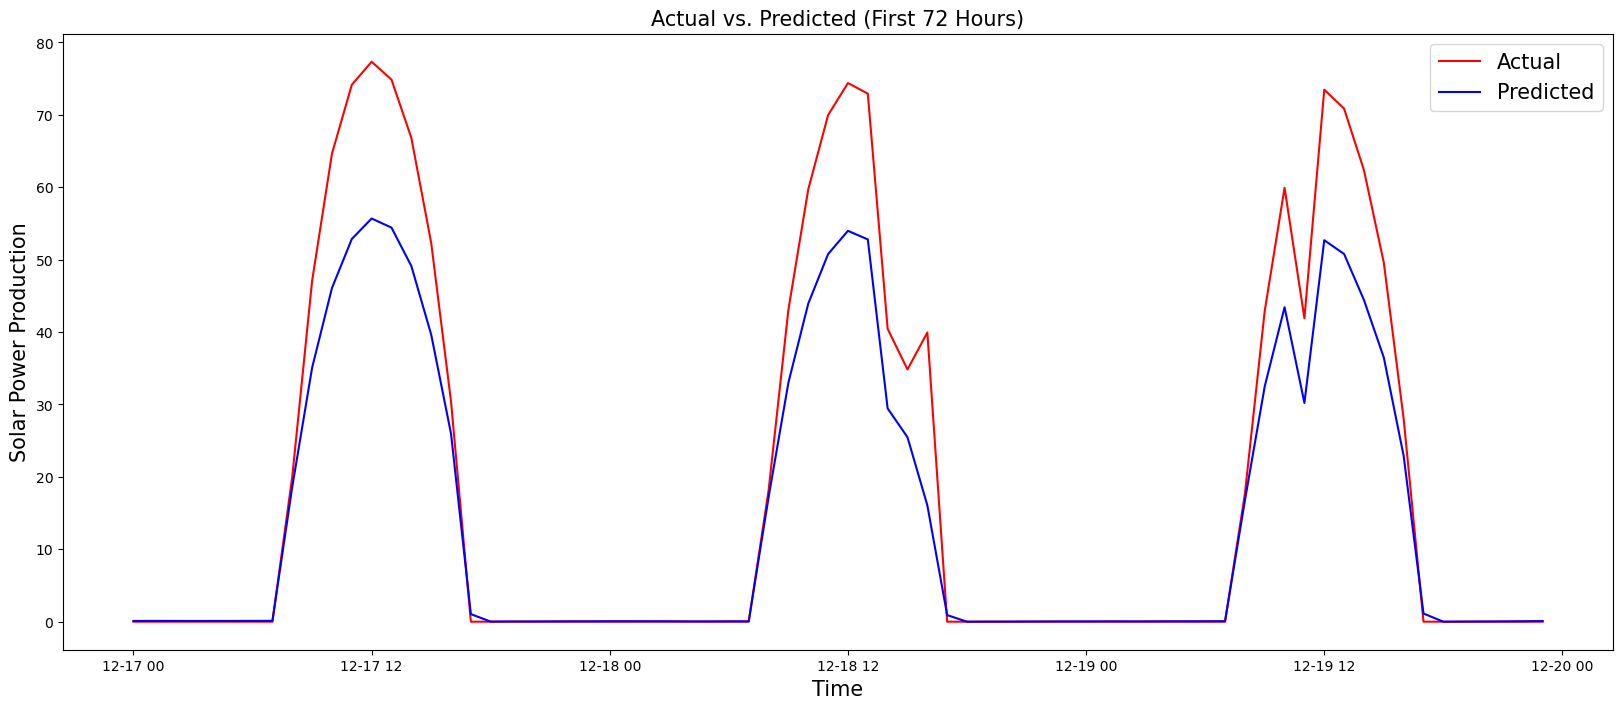

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the data into a Pandas DataFrame
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\fghgh.csv', parse_dates=['time'], index_col='time')

# Define the target variable
target = 'output'

# Set up the feature and target arrays
X = data.drop(target, axis=1).values
y = data[target].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=360, shuffle=False)

# Preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the SVR model
model = SVR(kernel='linear', C=100, gamma=0.5, epsilon=0.1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Use the trained model to predict the output values for the first 72 hours of the test set
predictions = model.predict(X_test[:72])

# Calculate the mean squared error for the first 72 hours predictions
rmse = np.sqrt(mean_squared_error(y_test[:72], predictions))
nmae = mean_absolute_error(y_test[:72], predictions) / 100
r2_test = r2_score(y_test[:72], predictions)

# Print the performance metrics for the first 72 hours predictions
print(f"RMSE (First 72 Hours): {rmse:.2f}")
print(f"NMAE (First 72 Hours): {nmae:.2f}")
print(f"r-squared (First 72 Hours): {r2_test:.2f}")

# Plot the actual versus predicted values for the first 72 hours
plt.figure(figsize=(20, 8))
plt.plot(data.index[-360:][:72], y_test[:72], label='Actual', color='red')
plt.plot(data.index[-360:][:72], predictions, label='Predicted', color='blue')
plt.legend(fontsize=15)
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.title('Actual vs. Predicted (First 72 Hours)', size=15)
plt.show()


11. ARIMA-LSTM Model

C:\Users\ASEDAI\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ASEDAI\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Epoch 1/50
263/263 [==============================] - 3s 2ms/step - loss: 0.3150
Epoch 2/50
263/263 [==============================] - 1s 2ms/step - loss: 0.0511
Epoch 3/50
263/263 [==============================] - 1s 3ms/step - loss: 0.0468
Epoch 4/50
263/263 [==============================] - 1s 3ms/step - loss: 0.0456
Epoch 5/50
263/263 [==============================] - 1s 2ms/step - loss: 0.0448
Epoch 6/50
263/263 [==============================] - 1s 3ms/step - loss: 0.0441
Epoch 7/50
263/263 [==============================] - 1s 3ms/step - loss: 0.0436
Epoch 8/50
263/263 [==============================] - 1s 2ms/step - loss: 0.0432
Epoch 9/50
263/263 [==============================] - 1s 2ms/step - loss: 0.0427
Epoch 10/50
263/263 [==============================] - 1s 2ms/step - loss: 0.0425
Epoch 11/50
263/263 [==============================] - 1s 3ms/step - loss: 0.0422
Epoch 12/50
263/263 [==============================] - 1s 2ms/step - loss: 0.0417
Epoch 13/50
263/263 [====

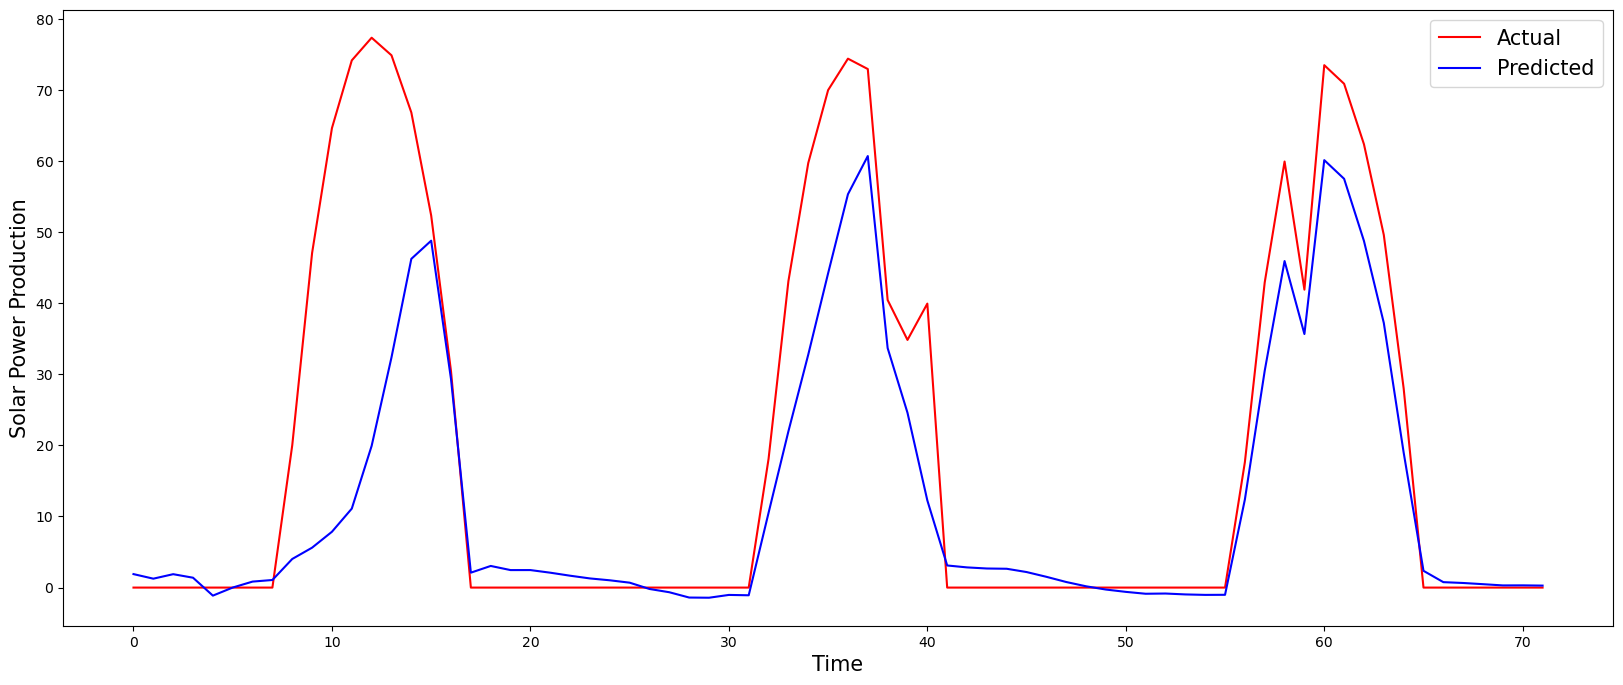

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA

# Load the data into a Pandas DataFrame
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Define the target variable
target = 'output'

# Set up the feature and target arrays
X = data.drop(target, axis=1).values
y = data[target].values

# Split the data into training and testing sets
train_size = len(X) - 360
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train an ARIMA model
arima_model = ARIMA(y_train, order=(3, 0, 5))
arima_model_fit = arima_model.fit()

# Use the ARIMA model to forecast the future values
arima_forecast = arima_model_fit.forecast(steps=len(X_test))

# Reshape arima_forecast to match the shape of X_test
arima_forecast = arima_forecast.reshape(-1, 1)

# Append the ARIMA forecasts as additional features
X_test_augmented = np.hstack((X_test, arima_forecast))

# Train another ARIMA model on full data
arima_model_full = ARIMA(y, order=(3, 0, 5))
arima_model_full_fit = arima_model_full.fit()

# Use the ARIMA model to forecast the future values for the training data
arima_forecast_train = arima_model_full_fit.forecast(steps=len(X_train))

# Reshape arima_forecast_train to match the shape of X_train
arima_forecast_train = arima_forecast_train.reshape(-1, 1)

# Append the ARIMA forecasts as additional features
X_train_augmented = np.hstack((X_train, arima_forecast_train))

# Preprocessing
scaler_X = StandardScaler()
X_train_augmented = scaler_X.fit_transform(X_train_augmented)
X_test_augmented = scaler_X.transform(X_test_augmented)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

# Reshape the input data for LSTM
X_train_augmented = X_train_augmented.reshape(X_train_augmented.shape[0], 1, X_train_augmented.shape[1])
X_test_augmented = X_test_augmented.reshape(X_test_augmented.shape[0], 1, X_test_augmented.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=32, input_shape=(1, X_train_augmented.shape[2])))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model to the training data
model.fit(X_train_augmented, y_train, epochs=50, batch_size=32, verbose=1)

# Use the trained model to predict the output values for the first 72 hours of the test set
predictions = model.predict(X_test_augmented[:72])
predictions = scaler_y.inverse_transform(predictions)

# Inverse transform the y_test to get it back to the original scale
# Inverse transform the y_test to get it back to the original scale
y_test = scaler_y.inverse_transform(y_test)

# Calculate the mean squared error of the model
rmse = np.sqrt(mean_squared_error(y_test[:72], predictions))
nmae = mean_absolute_error(y_test[:72], predictions) / 100

# Print the performance metrics
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")

# Plot the actual versus predicted values for the first 72 hours
plt.figure(figsize=(20, 8))
plt.plot(y_test[:72], label='Actual', color='red')
plt.plot(predictions, label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()



**C. 5 Days ahead Prediction**

1. Random Forest

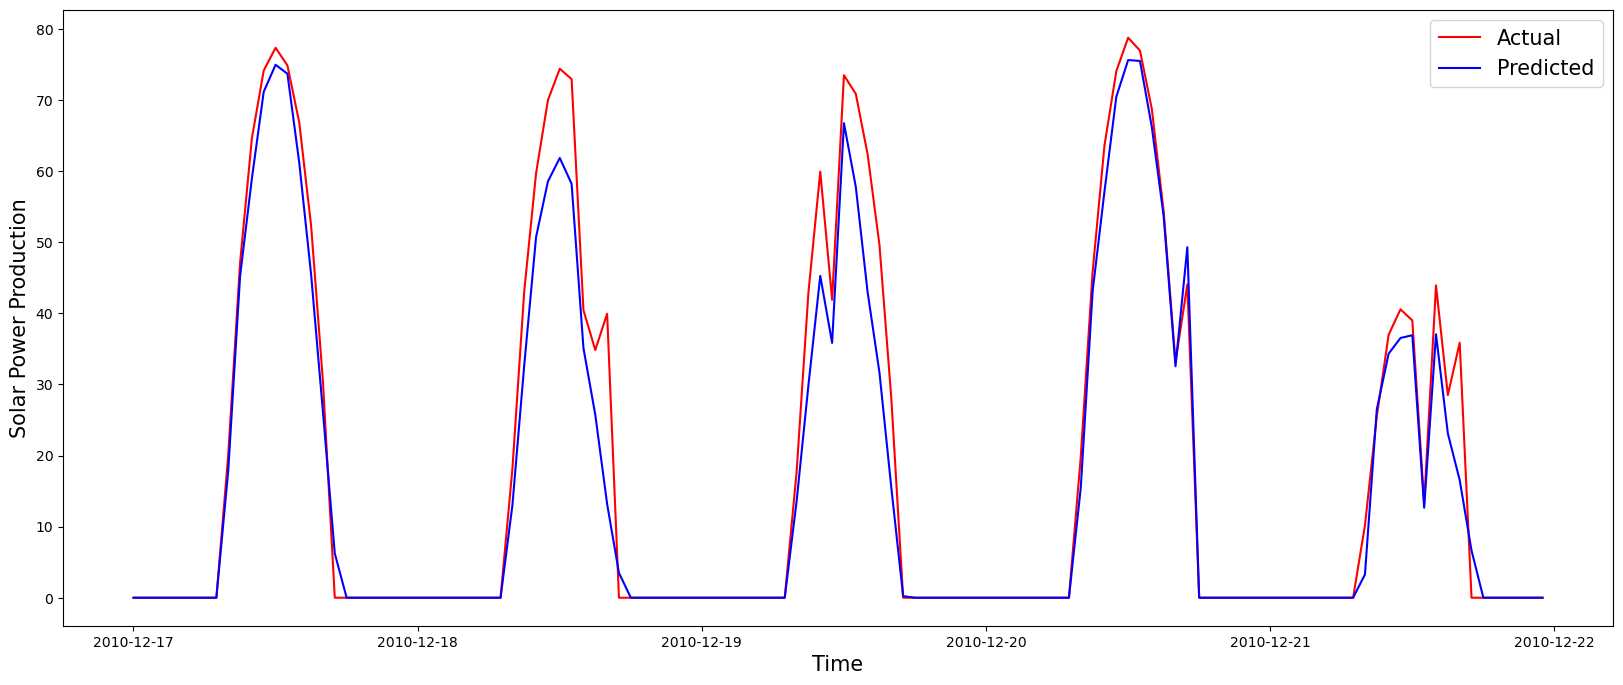

RMSE: 5.74
NMAE: 0.07
MAE: 2.84
r-squared: 0.95


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Define the list of feature names and the target variable name
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Split the dataset into a training set and a test set
training_data = data[:-360]
testing_data = data[-360:-240]

# Split the training set and the test set into features and target
X_train = training_data[feature_variables]
y_train = training_data[target_variable]
X_test = testing_data[feature_variables]
y_test = testing_data[target_variable]

# Create a RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Use the model to make predictions on the test set
predictions = model.predict(X_test)

# Create a DataFrame with the predictions and the corresponding dates
index = pd.date_range(start=data.index[-360:-240][0], periods=120, freq='H')
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=index)

# Plot the actual and predicted solar power output
plt.figure(figsize=(20, 8))
plt.plot(testing_data[target_variable], label='Actual', color='red')
plt.plot(next360_predictions[target_variable], label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Calculate the Normalized Mean Absolute Error (NMAE)
nmae = mae / 100

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)
# Print the performance metrics
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")
print(f"r-squared: {r2_test:.2f}")


2. Stacked LSTM (Multivariate Model)

4/4 [==============================] - 0s 2ms/step


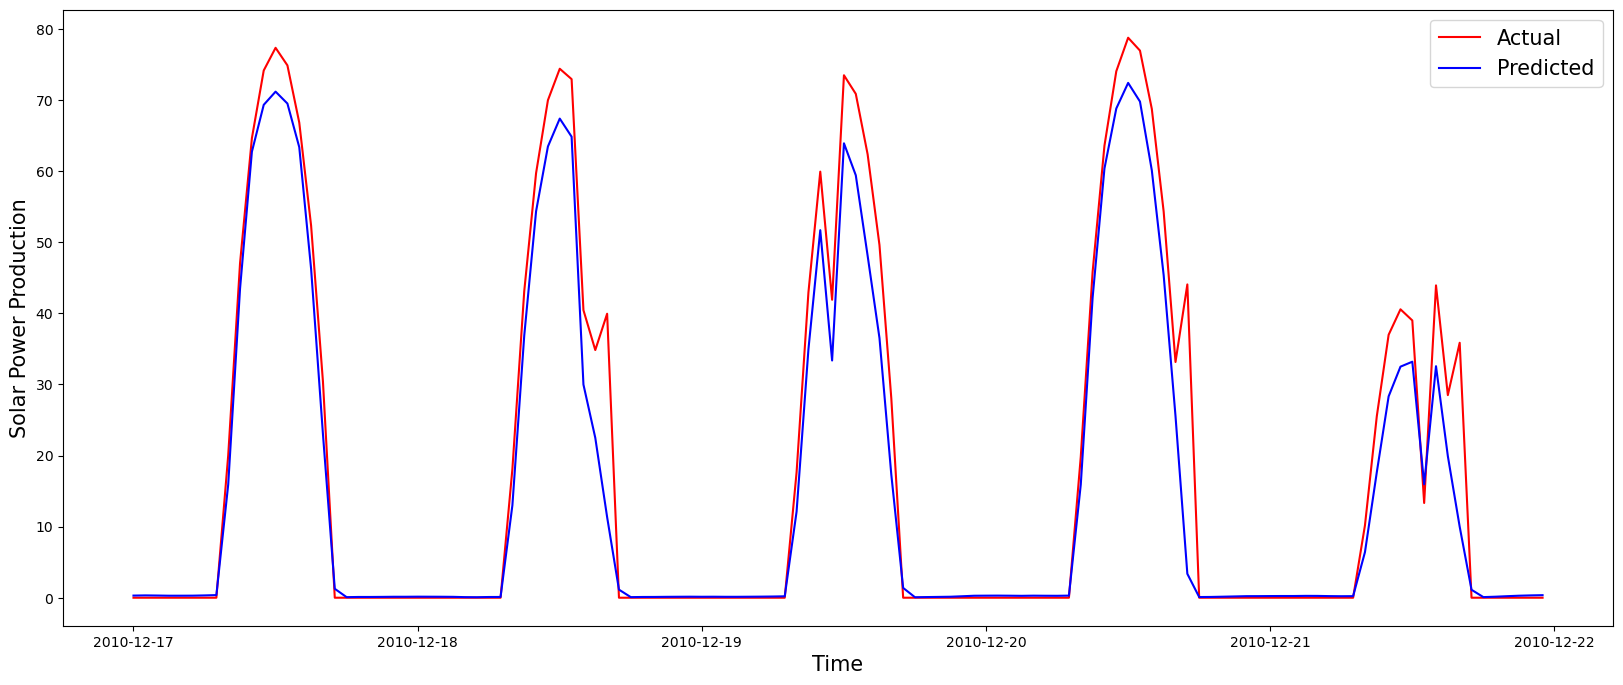

RMSE: 6.87
NMAE: 0.03
MAE: 3.49
r-sqaured: 0.93


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Loading the data
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-240]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the Stacked LSTM model
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=True, input_shape=(1, len(feature_variables))))
model.add(LSTM(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
index = pd.date_range(start=data.index[-360:-240][0], periods=120, freq='H')
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=index)

# Plotting the actual solar power output versus predicted solar power output values
plt.figure(figsize=(20, 8))
plt.plot(testing_data[target_variable], label='Actual', color='red')
plt.plot(next360_predictions[target_variable], label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()
# Calculate accuracy metrics
y_test = testing_data[target_variable].values  # Extracting the target variable from testing_data
rmse = np.sqrt(mean_squared_error(y_test, predictions))
nmae = mae / 100
mae = mean_absolute_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)
#mape = np.mean(np.abs((predictions - y_test) / np.clip(y_test, a_min=1e-8, a_max=None))) * 100

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")
print(f"r-sqaured: {r2_test:.2f}")
#print(f"MAPE: {mape:.2f}")


3. Stacked GRU

4/4 [==============================] - 0s 2ms/step


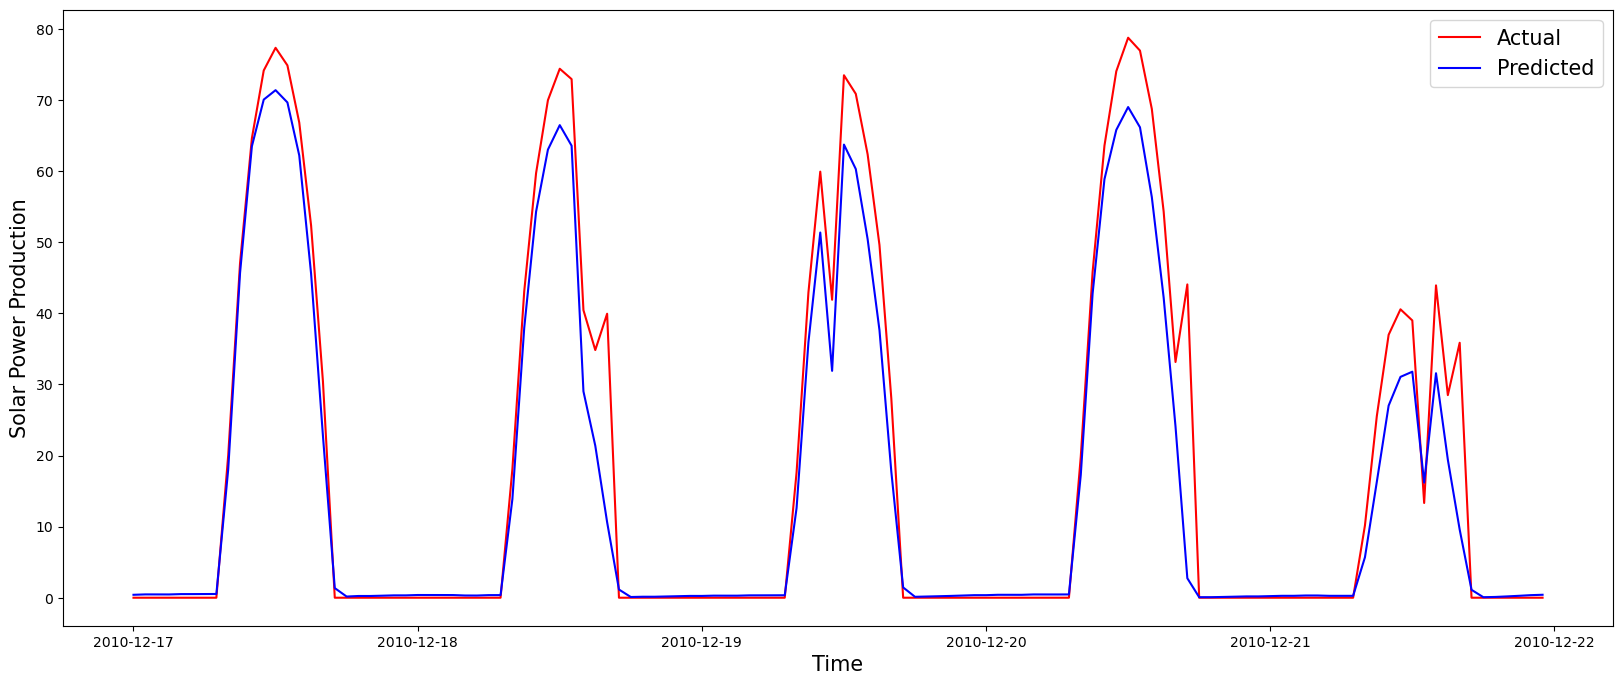

RMSE: 7.19
NMAE: 0.25
MAE: 3.73


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Loading the data
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-240]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for GRU input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the Stacked GRU model
model = Sequential()
model.add(GRU(32, activation='relu', return_sequences=True, input_shape=(1, len(feature_variables))))

model.add(GRU(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
index = pd.date_range(start=data.index[-360:-240][0], periods=120, freq='H')
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=index)

# Plotting the actual solar power output versus predicted solar power output values
plt.figure(figsize=(20, 8))
plt.plot(testing_data[target_variable], label='Actual', color='red')
plt.plot(next360_predictions[target_variable], label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()

# Calculate accuracy metrics
y_test = testing_data[target_variable].values  # Extracting the target variable from testing_data
rmse = np.sqrt(mean_squared_error(y_test, predictions))
nmae = np.mean(np.abs(predictions - y_test)) / 100
mae = mean_absolute_error(y_test, predictions)
#mape = np.mean(np.abs((predictions - y_test) / np.clip(y_test, a_min=1e-8, a_max=None))) * 100

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")
#print(f"MAPE: {mape:.2f}")


4. Encoder-Decoder LSTM

4/4 [==============================] - 0s 2ms/step


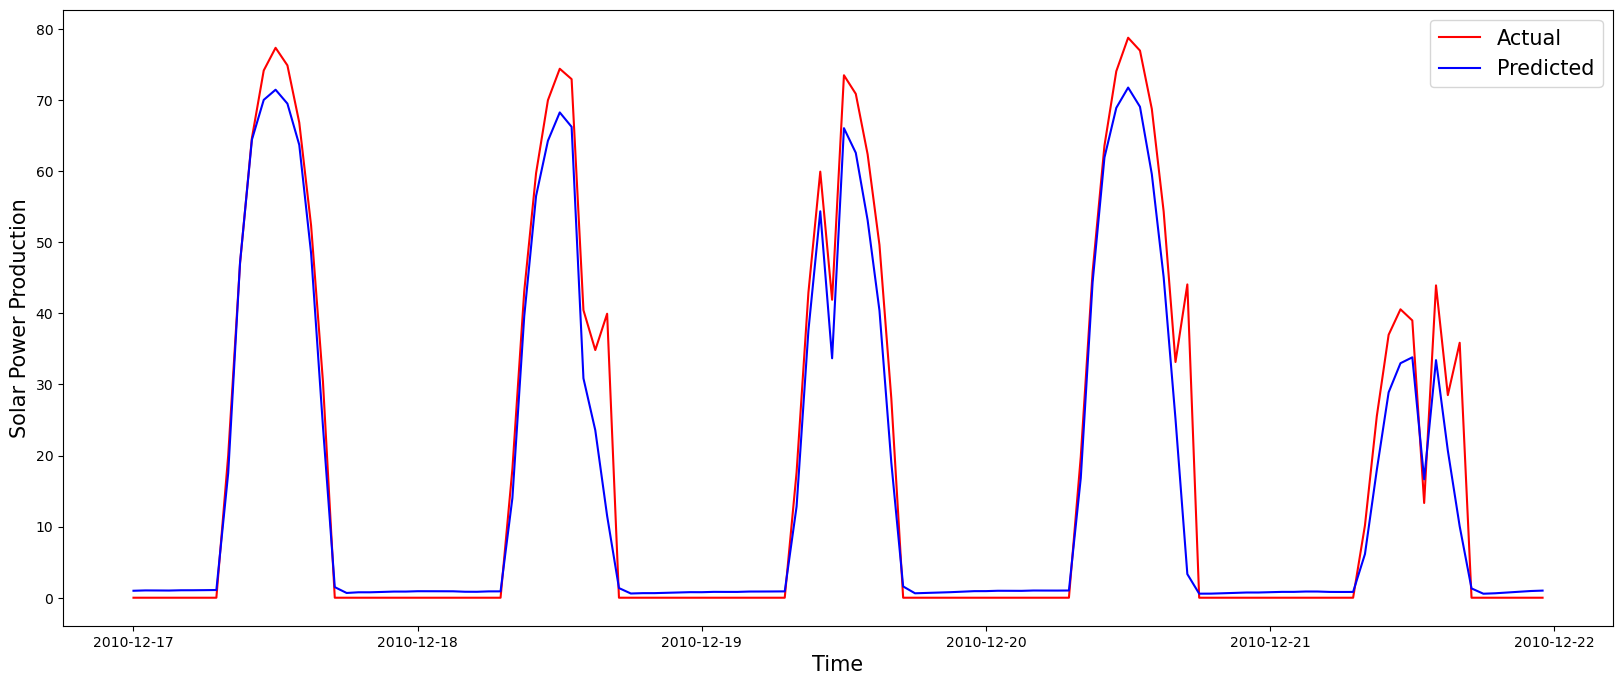

RMSE: 6.48
NMAE: 0.03
MAE: 3.46


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense

# Loading the data
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-240]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the Encoder-Decoder LSTM model
model = Sequential()
# Encoder
model.add(LSTM(32, activation='relu', input_shape=(1, len(feature_variables)), return_sequences=False))
model.add(RepeatVector(1)) # Replicate the encoder output (last hidden state) for each time step in the output sequence
# Decoder
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)
predictions = predictions.reshape(-1,1) # Flatten predictions to 1D

# Create a DataFrame to store the predictions
index = pd.date_range(start=data.index[-360:-240][0], periods=120, freq='H')
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=index)

# Plotting the actual solar power output versus predicted solar power output values
plt.figure(figsize=(20, 8))
plt.plot(testing_data[target_variable], label='Actual', color='red')
plt.plot(next360_predictions[target_variable], label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()

# Calculate accuracy metrics
y_test = testing_data[target_variable].values  # Extracting the target variable from testing_data
rmse = np.sqrt(mean_squared_error(y_test, predictions))

mae = mean_absolute_error(y_test, predictions)
nmae = mae / 100

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")


5. Bi-Directional LSTM

4/4 [==============================] - 0s 2ms/step


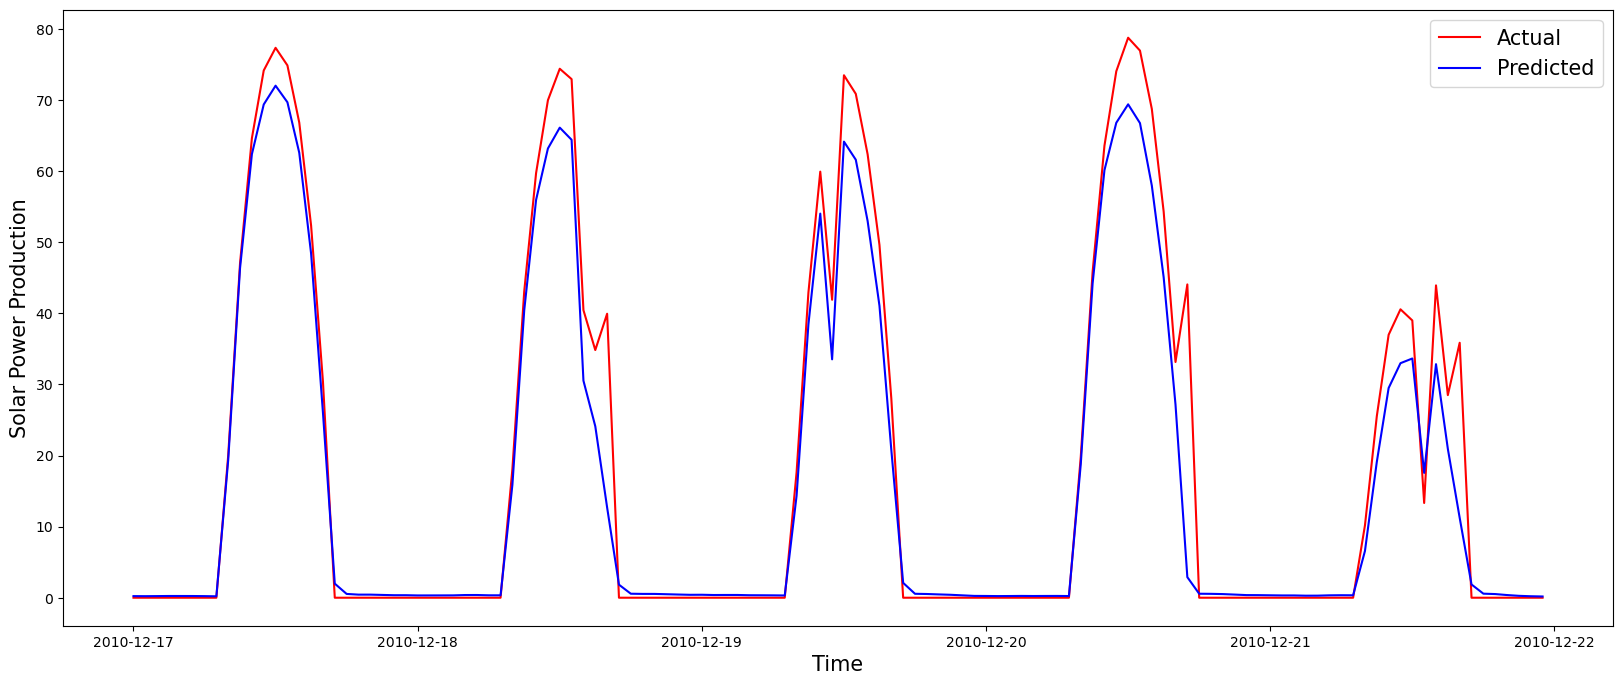

RMSE: 6.48
MAE: 3.23
NMAE: 0.03


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

# Loading the data
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-240]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the Bi-directional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(32, activation='relu', return_sequences=False), input_shape=(1, len(feature_variables))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
index = pd.date_range(start=data.index[-360:-240][0], periods=120, freq='H')
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=index)

# Plotting the actual solar power output versus predicted solar power output values
plt.figure(figsize=(20, 8))
plt.plot(testing_data[target_variable], label='Actual', color='red')
plt.plot(next360_predictions[target_variable], label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()
# Calculate RMSE, MAE and NMAE
y_true = testing_data[target_variable].values
rmse = np.sqrt(mean_squared_error(y_true, next360_predictions[target_variable]))
mae = mean_absolute_error(testing_data[target_variable], predictions)
nmae = mae / 100  # Normalized MAE

# Print the RMSE, MAE and NMAE
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'NMAE: {nmae:.2f}')

6. Multivariate LSTM

4/4 [==============================] - 0s 2ms/step


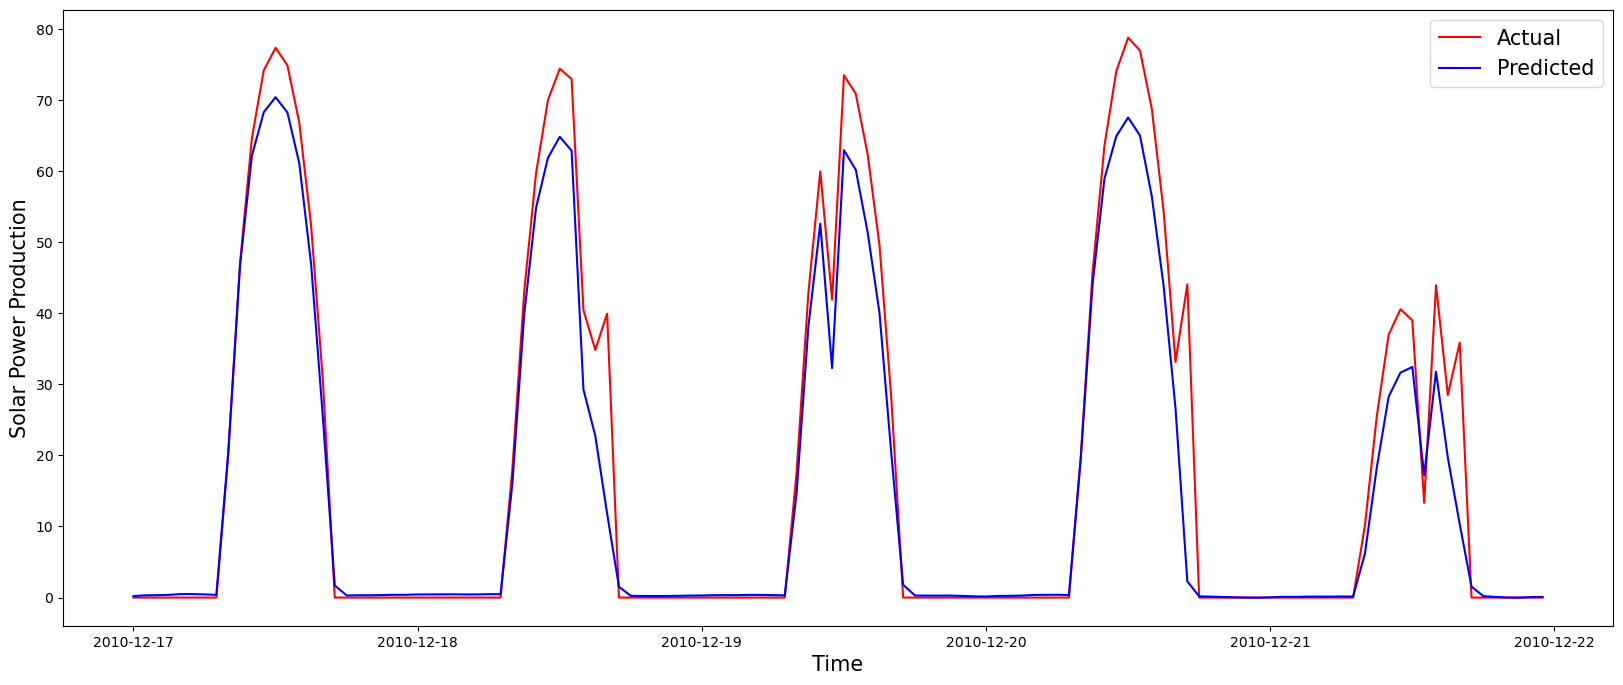

RMSE: 6.99
NMAE: 0.03
MAE: 3.53
r-sqaured: 0.93


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Loading the data
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-240]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the Stacked LSTM model
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=False, input_shape=(1, len(feature_variables))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
index = pd.date_range(start=data.index[-360:-240][0], periods=120, freq='H')
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=index)

# Plotting the actual solar power output versus predicted solar power output values
plt.figure(figsize=(20, 8))
plt.plot(testing_data[target_variable], label='Actual', color='red')
plt.plot(next360_predictions[target_variable], label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()
# Calculate accuracy metrics
y_test = testing_data[target_variable].values  # Extracting the target variable from testing_data
rmse = np.sqrt(mean_squared_error(y_test, predictions))
nmae = mae / 100
mae = mean_absolute_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)
#mape = np.mean(np.abs((predictions - y_test) / np.clip(y_test, a_min=1e-8, a_max=None))) * 100

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")
print(f"r-sqaured: {r2_test:.2f}")
#print(f"MAPE: {mape:.2f}")


7. GRU Multivariate Model

4/4 [==============================] - 0s 2ms/step


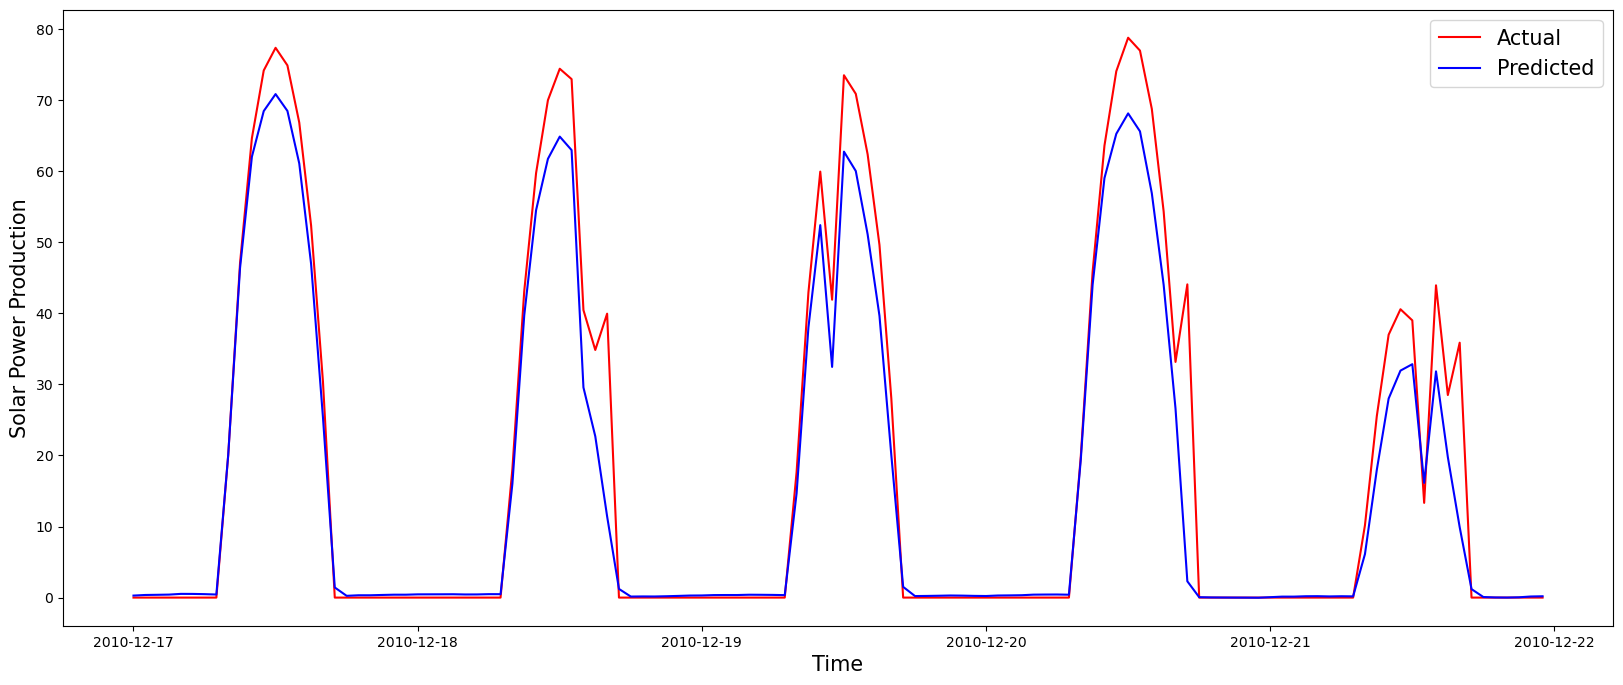

RMSE: 6.99
NMAE: 0.04
MAE: 3.52
r-sqaured: 0.93


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Loading the data
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-240]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the Stacked LSTM model
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=False, input_shape=(1, len(feature_variables))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
index = pd.date_range(start=data.index[-360:-240][0], periods=120, freq='H')
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=index)

# Plotting the actual solar power output versus predicted solar power output values
plt.figure(figsize=(20, 8))
plt.plot(testing_data[target_variable], label='Actual', color='red')
plt.plot(next360_predictions[target_variable], label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()
# Calculate accuracy metrics
y_test = testing_data[target_variable].values  # Extracting the target variable from testing_data
rmse = np.sqrt(mean_squared_error(y_test, predictions))
nmae = mae / 100
mae = mean_absolute_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)
#mape = np.mean(np.abs((predictions - y_test) / np.clip(y_test, a_min=1e-8, a_max=None))) * 100

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")
print(f"r-sqaured: {r2_test:.2f}")
#print(f"MAPE: {mape:.2f}")


8. ARIMA Univariate Model

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=64837.206, Time=5.99 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=83469.536, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=68189.189, Time=0.38 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=75361.998, Time=1.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=87294.797, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=66450.474, Time=1.92 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=64841.698, Time=3.22 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=64841.915, Time=3.84 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=64739.208, Time=8.50 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=66111.193, Time=3.81 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=64820.642, Time=9.58 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=64728.981, Time=9.39 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=65923.978, Time=4.58 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=64735.075, Time=11.04 sec
 ARIMA(2,0,5)(0,0,

C:\Users\ASEDAI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\ASEDAI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\ASEDAI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\ASEDAI\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                 output   No. Observations:                 8400
Model:                 ARIMA(3, 0, 5)   Log Likelihood              -30897.413
Date:                Sat, 27 May 2023   AIC                          61814.827
Time:                        14:56:20   BIC                          61885.187
Sample:                    01-01-2010   HQIC                         61838.851
                         - 12-16-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.1037      0.296     71.361      0.000      20.524      21.683
ar.L1          1.2647      1.504      0.841      0.400      -1.683       4.212
ar.L2          0.1228      2.749      0.045      0.9

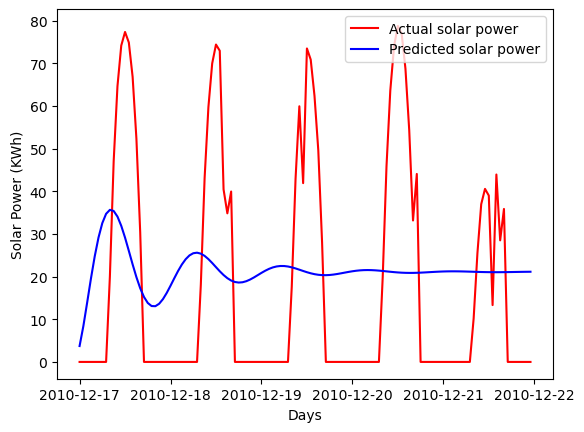

NMAE: 1.25
R-Squared: 0.04


In [57]:
# Import Basic Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# preprocessing data

df = pd.read_csv(r"C:\Users\ASEDAI\Downloads\datamv.csv", usecols=[0, 1], index_col=0, parse_dates=[0], dayfirst=True)
df = pd.DataFrame(df['output'])

train = df.iloc[:8400, 0]
test = df.iloc[8400:, 0]

# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

Decomp_results = seasonal_decompose(df)

#Decomp_results.plot()

#Decomp_results.seasonal.plot()

# Finding the Parameters (p,d,q)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#plot_acf(train, lags=50)

#plot_pacf(train, lags=50)

from pmdarima import auto_arima

auto_arima(df, trace=True)

# Developing ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

A_Model = ARIMA(train, order=(3, 0, 5))

predictor = A_Model.fit()

predictor.summary()
print(predictor.summary())

# Predicting the first 72 hours
Predicted_results = predictor.predict(start=len(train), end=len(train) + 119, typ='levels')

# Plotting result
plt.plot(test[:120], color='red', label='Actual solar power')
plt.plot(Predicted_results, color='blue', label='Predicted solar power')
plt.xlabel('Days')
plt.ylabel('Solar Power (KWh)')
plt.legend()
plt.show()

nmae = np.mean(np.abs(Predicted_results - test[:120])) / np.mean(test[:120])
r_squared = 1 - (np.sum((test[:120] - Predicted_results) ** 2) / np.sum((test[:120] - np.mean(test[:120])) ** 2))

# Print the performance metrics
print(f"NMAE: {nmae:.2f}")
print(f"R-Squared: {r_squared:.2f}")


9. SVR Univarite Model

RMSE (First 120 Hours): 9.67
NMAE (First 120 Hours): 0.05
r-squared (First 120 Hours): 0.87


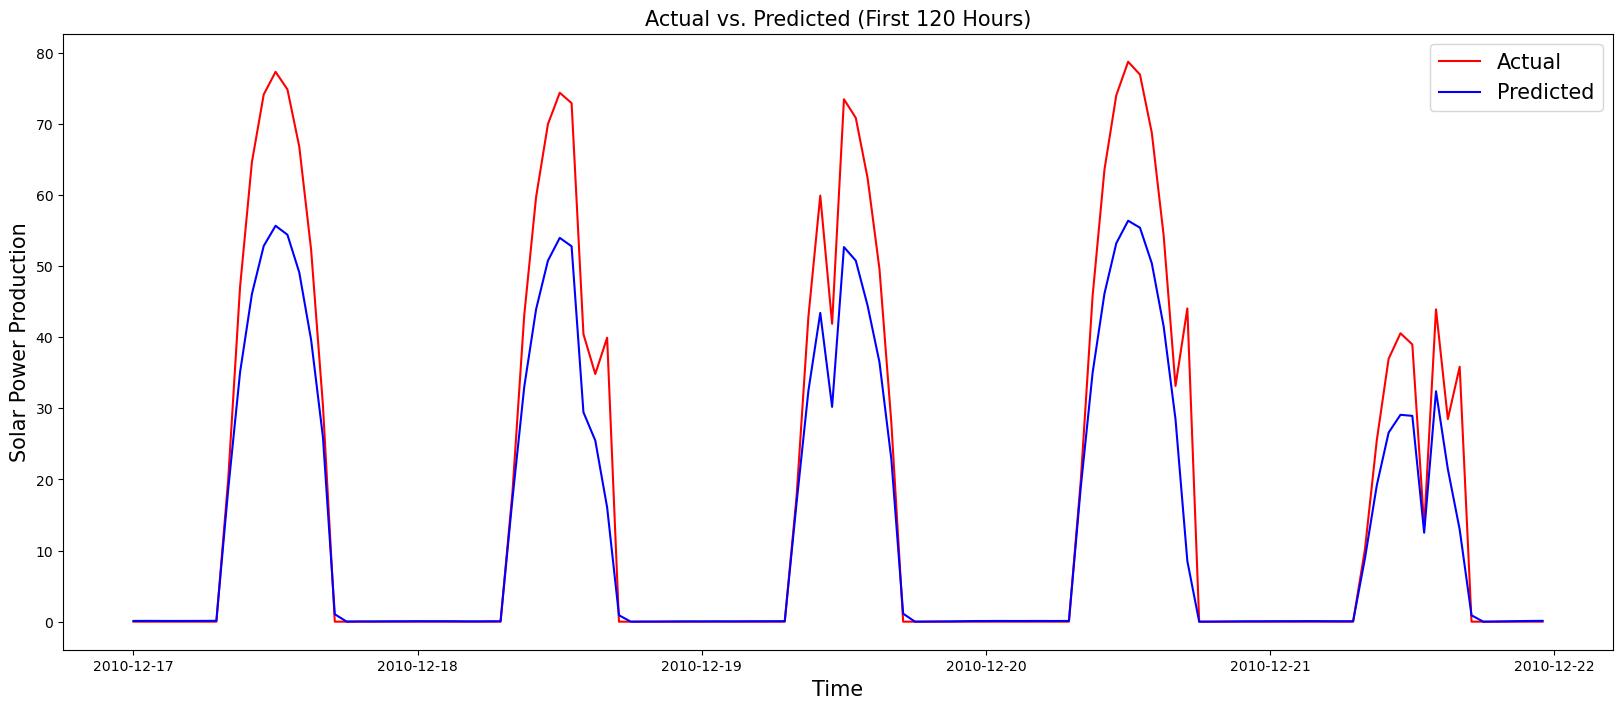

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the data into a Pandas DataFrame
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\fghgh.csv', parse_dates=['time'], index_col='time')

# Define the target variable
target = 'output'

# Set up the feature and target arrays
X = data.drop(target, axis=1).values
y = data[target].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=360, shuffle=False)

# Preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the SVR model
model = SVR(kernel='linear', C=100, gamma=0.5, epsilon=0.1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Use the trained model to predict the output values for the first 72 hours of the test set
predictions = model.predict(X_test[:120])

# Calculate the mean squared error for the first 72 hours predictions
rmse = np.sqrt(mean_squared_error(y_test[:120], predictions))
nmae = mean_absolute_error(y_test[:120], predictions) / 100
r2_test = r2_score(y_test[:120], predictions)

# Print the performance metrics for the first 72 hours predictions
print(f"RMSE (First 120 Hours): {rmse:.2f}")
print(f"NMAE (First 120 Hours): {nmae:.2f}")
print(f"r-squared (First 120 Hours): {r2_test:.2f}")

# Plot the actual versus predicted values for the first 72 hours
plt.figure(figsize=(20, 8))
plt.plot(data.index[-360:][:120], y_test[:120], label='Actual', color='red')
plt.plot(data.index[-360:][:120], predictions, label='Predicted', color='blue')
plt.legend(fontsize=15)
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.title('Actual vs. Predicted (First 120 Hours)', size=15)
plt.show()


10. Univariate LSTM Model

Epoch 1/50
262/262 [==============================] - 4s 9ms/step - loss: 0.0318
Epoch 2/50
262/262 [==============================] - 2s 8ms/step - loss: 0.0114
Epoch 3/50
262/262 [==============================] - 3s 11ms/step - loss: 0.0101
Epoch 4/50
262/262 [==============================] - 3s 10ms/step - loss: 0.0093
Epoch 5/50
262/262 [==============================] - 2s 8ms/step - loss: 0.0089
Epoch 6/50
262/262 [==============================] - 2s 9ms/step - loss: 0.0084
Epoch 7/50
262/262 [==============================] - 2s 9ms/step - loss: 0.0082
Epoch 8/50
262/262 [==============================] - 2s 9ms/step - loss: 0.0081
Epoch 9/50
262/262 [==============================] - 2s 9ms/step - loss: 0.0079
Epoch 10/50
262/262 [==============================] - 2s 9ms/step - loss: 0.0078
Epoch 11/50
262/262 [==============================] - 2s 9ms/step - loss: 0.0076
Epoch 12/50
262/262 [==============================] - 2s 8ms/step - loss: 0.0077
Epoch 13/50
262/262 [==

INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


1/1 [==============================] - 0s 22ms/step


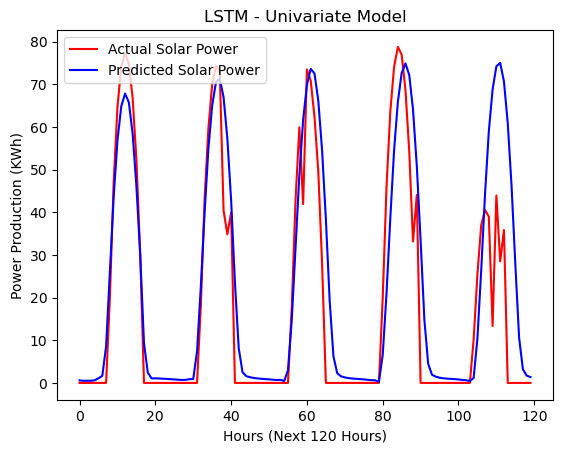

RMSE: 14.716677533506234
MAE: 8.41387123059265
NMAE: 0.0841387123059265


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load and preprocess data
df = pd.read_csv(r'C:\Users\ASEDAI\Downloads\just output.csv', parse_dates=['time'], index_col='time')
df.dropna(inplace=True)

# Define training and testing data
train_data = df.iloc[:8400, 0:1].values
test_data = df.iloc[8400:8520, 0:1].values  # Next 72 hours

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

# Create training sets
X_train = []
y_train = []
window_size = 24

for i in range(window_size, len(train_scaled)):
    X_train.append(train_scaled[i-window_size:i, 0])
    y_train.append(train_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Define LSTM model
model = Sequential()
model.add(LSTM(units=32, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Save the model
model.save('LSTM')

# Load the saved model
from keras.models import load_model
model = load_model('LSTM')

# Predict future solar power output
inputs = train_scaled[-window_size:]
inputs = inputs.reshape(-1, 1)
inputs = np.reshape(inputs, (1, inputs.shape[0], 1))

predictions = []
for _ in range(120):  # Predict next 72 hours
    prediction = model.predict(inputs)
    predictions.append(prediction[0, 0])
    inputs = np.roll(inputs, -1)
    inputs[0, -1, 0] = prediction

# Inverse transform the predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Flatten the test data
test_data_flattened = test_data.flatten()

# Plot the results
plt.plot(test_data, color='red', label='Actual Solar Power')
plt.plot(predictions, color='blue', label='Predicted Solar Power')
plt.title('LSTM - Univariate Model')
plt.xlabel('Hours (Next 120 Hours)')
plt.ylabel('Power Production (KWh)')
plt.legend()
plt.show()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data_flattened, predictions.flatten()))

# Calculate MAE
mae = mean_absolute_error(test_data_flattened, predictions.flatten())

# Calculate NMAE
nmae = mae / 100

print("RMSE:", rmse)
print("MAE:", mae)
print("NMAE:", nmae)


11.ARIMA-LSTM Univariate Model

C:\Users\ASEDAI\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ASEDAI\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Epoch 1/50
263/263 [==============================] - 3s 3ms/step - loss: 0.2794
Epoch 2/50
263/263 [==============================] - 1s 3ms/step - loss: 0.0504
Epoch 3/50
263/263 [==============================] - 1s 3ms/step - loss: 0.0463
Epoch 4/50
263/263 [==============================] - 1s 3ms/step - loss: 0.0450
Epoch 5/50
263/263 [==============================] - 1s 3ms/step - loss: 0.0442
Epoch 6/50
263/263 [==============================] - 1s 2ms/step - loss: 0.0434
Epoch 7/50
263/263 [==============================] - 1s 2ms/step - loss: 0.0428
Epoch 8/50
263/263 [==============================] - 1s 2ms/step - loss: 0.0421
Epoch 9/50
263/263 [==============================] - 0s 2ms/step - loss: 0.0417
Epoch 10/50
263/263 [==============================] - 0s 2ms/step - loss: 0.0410
Epoch 11/50
263/263 [==============================] - 1s 2ms/step - loss: 0.0405
Epoch 12/50
263/263 [==============================] - 0s 2ms/step - loss: 0.0402
Epoch 13/50
263/263 [====

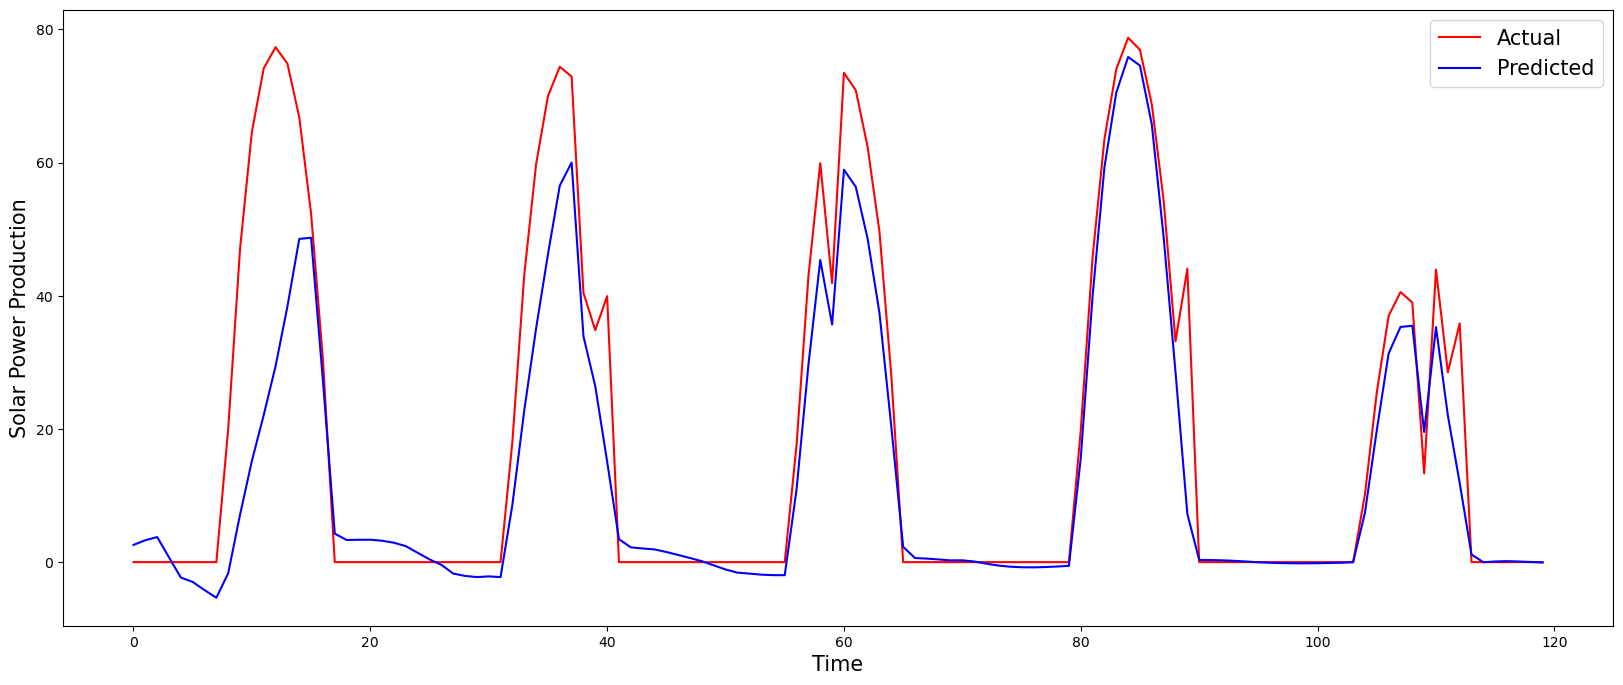

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA

# Load the data into a Pandas DataFrame
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Define the target variable
target = 'output'

# Set up the feature and target arrays
X = data.drop(target, axis=1).values
y = data[target].values

# Split the data into training and testing sets
train_size = len(X) - 360
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train an ARIMA model
arima_model = ARIMA(y_train, order=(3, 0, 5))
arima_model_fit = arima_model.fit()

# Use the ARIMA model to forecast the future values
arima_forecast = arima_model_fit.forecast(steps=len(X_test))

# Reshape arima_forecast to match the shape of X_test
arima_forecast = arima_forecast.reshape(-1, 1)

# Append the ARIMA forecasts as additional features
X_test_augmented = np.hstack((X_test, arima_forecast))

# Train another ARIMA model on full data
arima_model_full = ARIMA(y, order=(3, 0, 5))
arima_model_full_fit = arima_model_full.fit()

# Use the ARIMA model to forecast the future values for the training data
arima_forecast_train = arima_model_full_fit.forecast(steps=len(X_train))

# Reshape arima_forecast_train to match the shape of X_train
arima_forecast_train = arima_forecast_train.reshape(-1, 1)

# Append the ARIMA forecasts as additional features
X_train_augmented = np.hstack((X_train, arima_forecast_train))

# Preprocessing
scaler_X = StandardScaler()
X_train_augmented = scaler_X.fit_transform(X_train_augmented)
X_test_augmented = scaler_X.transform(X_test_augmented)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

# Reshape the input data for LSTM
X_train_augmented = X_train_augmented.reshape(X_train_augmented.shape[0], 1, X_train_augmented.shape[1])
X_test_augmented = X_test_augmented.reshape(X_test_augmented.shape[0], 1, X_test_augmented.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=32, input_shape=(1, X_train_augmented.shape[2])))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model to the training data
model.fit(X_train_augmented, y_train, epochs=50, batch_size=32, verbose=1)

# Use the trained model to predict the output values for the first 72 hours of the test set
predictions = model.predict(X_test_augmented[:120])
predictions = scaler_y.inverse_transform(predictions)

# Inverse transform the y_test to get it back to the original scale
# Inverse transform the y_test to get it back to the original scale
y_test = scaler_y.inverse_transform(y_test)

# Calculate the mean squared error of the model
rmse = np.sqrt(mean_squared_error(y_test[:120], predictions))
nmae = mean_absolute_error(y_test[:120], predictions) / 100

# Print the performance metrics
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")

# Plot the actual versus predicted values for the first 72 hours
plt.figure(figsize=(20, 8))
plt.plot(y_test[:120], label='Actual', color='red')
plt.plot(predictions, label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()



**D. 1 Day Ahead Forecasting**

1. Random Forest

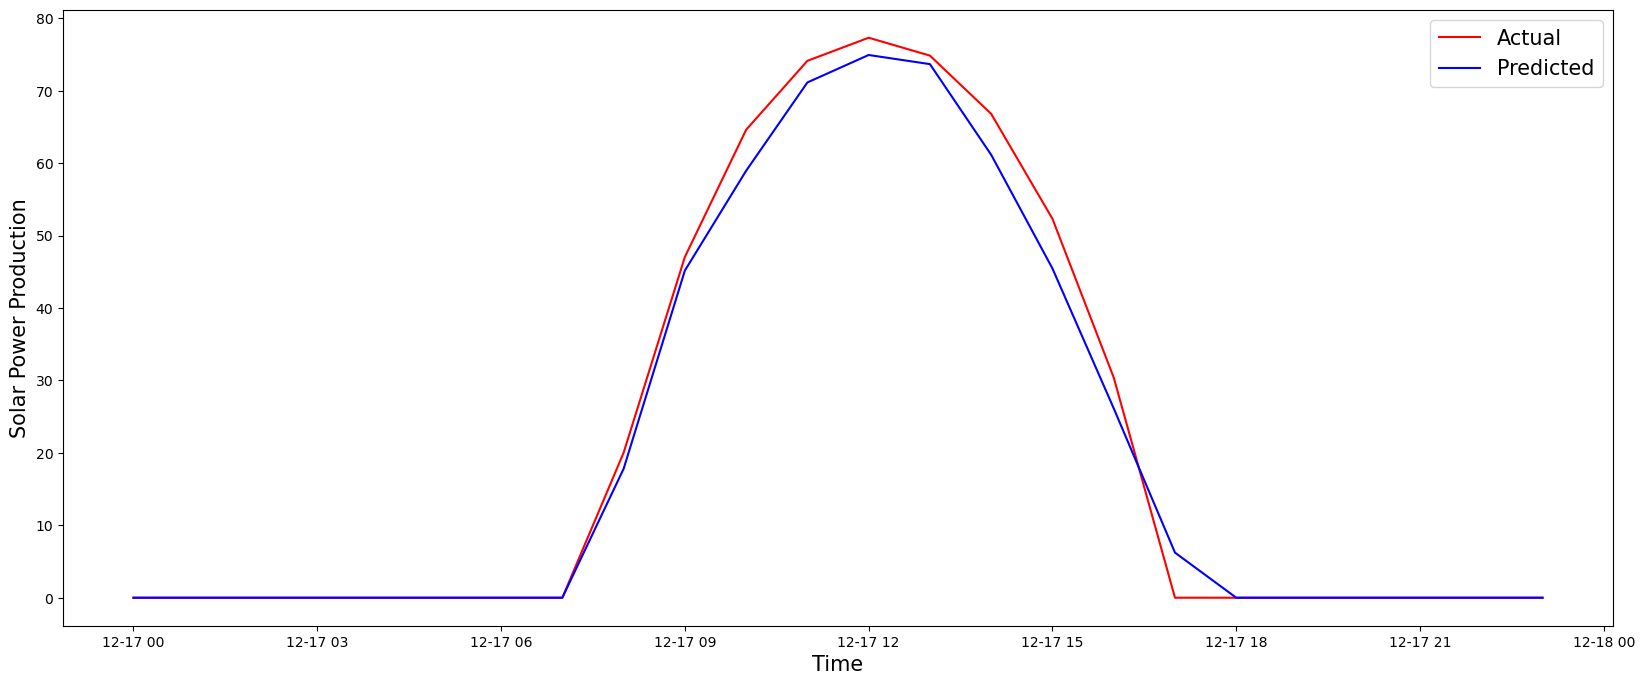

RMSE: 2.83
NMAE: 0.08
MAE: 1.64
r-squared: 0.99


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Define the list of feature names and the target variable name
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Split the dataset into a training set and a test set
training_data = data[:-360]
testing_data = data[-360:-336]

# Split the training set and the test set into features and target
X_train = training_data[feature_variables]
y_train = training_data[target_variable]
X_test = testing_data[feature_variables]
y_test = testing_data[target_variable]

# Create a RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Use the model to make predictions on the test set
predictions = model.predict(X_test)

# Create a DataFrame with the predictions and the corresponding dates
index = pd.date_range(start=data.index[-360:-336][0], periods=24, freq='H')
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=index)

# Plot the actual and predicted solar power output
plt.figure(figsize=(20, 8))
plt.plot(testing_data[target_variable], label='Actual', color='red')
plt.plot(next360_predictions[target_variable], label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Calculate the Normalized Mean Absolute Error (NMAE)
nmae = mae / 100

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)
# Print the performance metrics
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")
print(f"r-squared: {r2_test:.2f}")


2. Stacked LSTM (Multivariate)

1/1 [==============================] - 0s 221ms/step


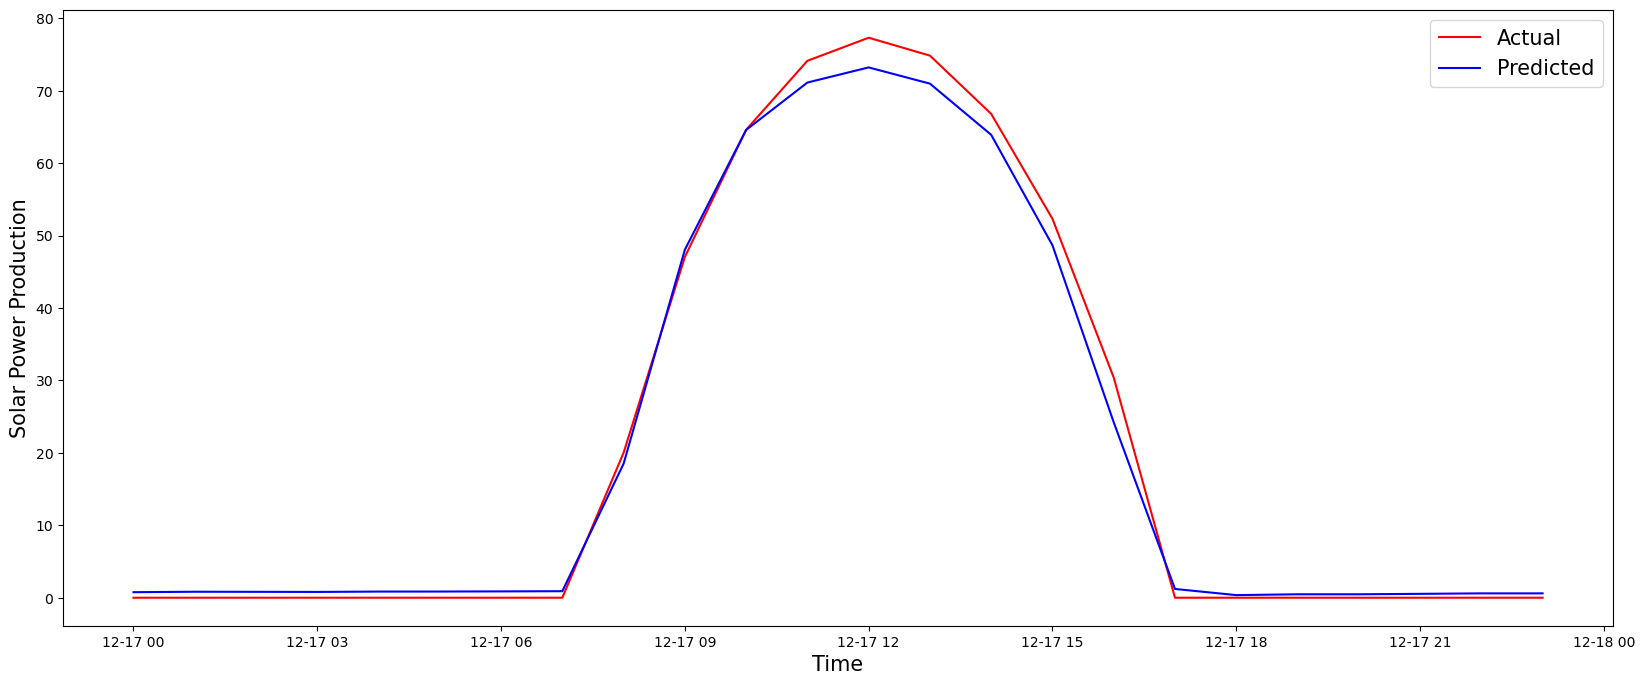

RMSE: 2.17
NMAE: 0.02
MAE: 1.55
r-sqaured: 0.99


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Loading the data
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-336]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the Stacked LSTM model
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=True, input_shape=(1, len(feature_variables))))
model.add(LSTM(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
index = pd.date_range(start=data.index[-360:-336][0], periods=24, freq='H')
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=index)

# Plotting the actual solar power output versus predicted solar power output values
plt.figure(figsize=(20, 8))
plt.plot(testing_data[target_variable], label='Actual', color='red')
plt.plot(next360_predictions[target_variable], label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()
# Calculate accuracy metrics
y_test = testing_data[target_variable].values  # Extracting the target variable from testing_data
rmse = np.sqrt(mean_squared_error(y_test, predictions))
nmae = mae / 100
mae = mean_absolute_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)
#mape = np.mean(np.abs((predictions - y_test) / np.clip(y_test, a_min=1e-8, a_max=None))) * 100

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")
print(f"r-sqaured: {r2_test:.2f}")
#print(f"MAPE: {mape:.2f}")


3. Stacked GRU Model

1/1 [==============================] - 0s 231ms/step


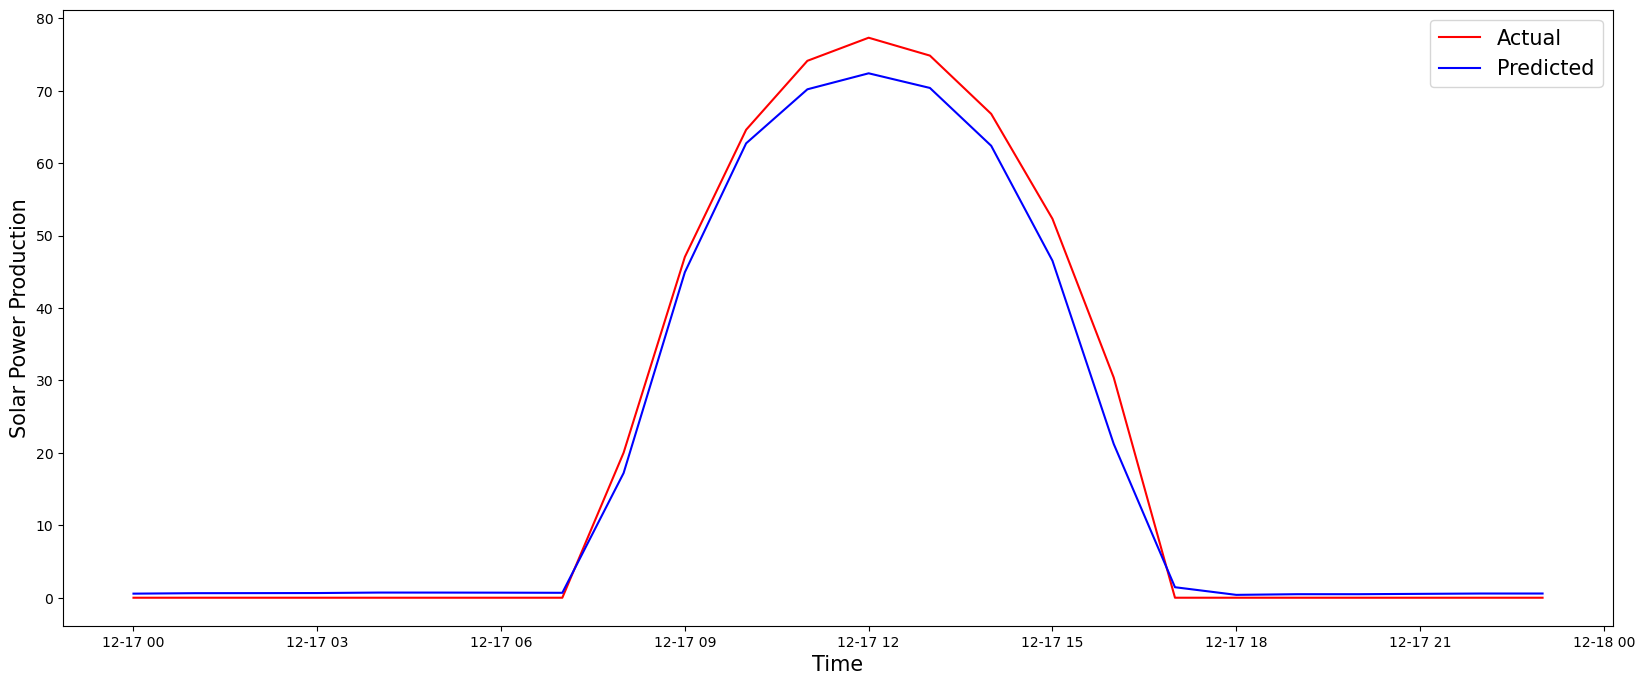

RMSE: 3.03
NMAE: 0.29
MAE: 2.05


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Loading the data
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-336]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for GRU input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the Stacked GRU model
model = Sequential()
model.add(GRU(32, activation='relu', return_sequences=True, input_shape=(1, len(feature_variables))))

model.add(GRU(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
index = pd.date_range(start=data.index[-360:-336][0], periods=24, freq='H')
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=index)

# Plotting the actual solar power output versus predicted solar power output values
plt.figure(figsize=(20, 8))
plt.plot(testing_data[target_variable], label='Actual', color='red')
plt.plot(next360_predictions[target_variable], label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()

# Calculate accuracy metrics
y_test = testing_data[target_variable].values  # Extracting the target variable from testing_data
rmse = np.sqrt(mean_squared_error(y_test, predictions))
nmae = np.mean(np.abs(predictions - y_test)) / 100
mae = mean_absolute_error(y_test, predictions)
#mape = np.mean(np.abs((predictions - y_test) / np.clip(y_test, a_min=1e-8, a_max=None))) * 100

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")
#print(f"MAPE: {mape:.2f}")


4. Encoder-Decoder LSTM

1/1 [==============================] - 0s 250ms/step


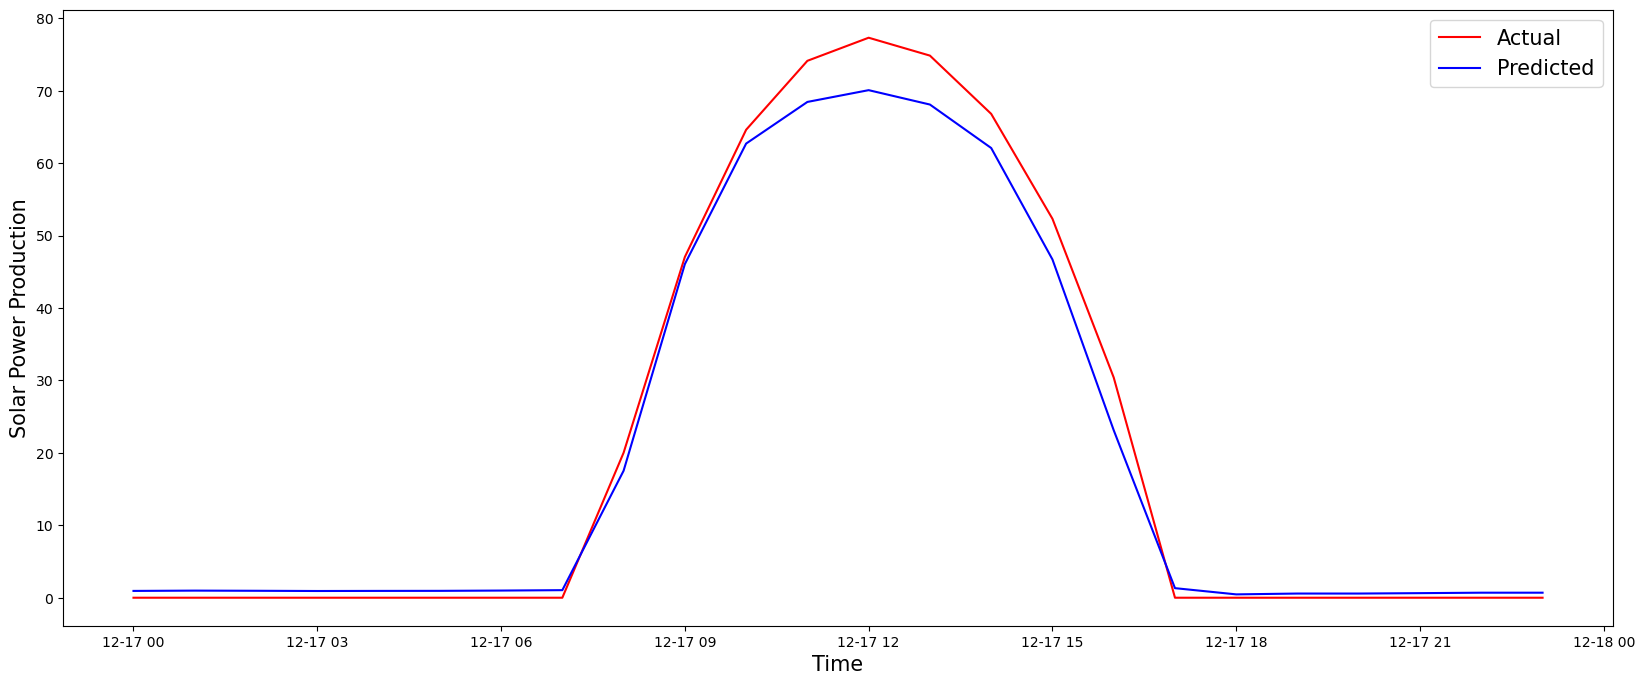

RMSE: 3.29
NMAE: 0.29
MAE: 2.31


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense

# Loading the data
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-336]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the Encoder-Decoder LSTM model
model = Sequential()
# Encoder
model.add(LSTM(32, activation='relu', input_shape=(1, len(feature_variables)), return_sequences=False))
model.add(RepeatVector(1)) # Replicate the encoder output (last hidden state) for each time step in the output sequence
# Decoder
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)
predictions = predictions.reshape(-1,1) # Flatten predictions to 1D

# Create a DataFrame to store the predictions
index = pd.date_range(start=data.index[-360:-336][0], periods=24, freq='H')
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=index)

# Plotting the actual solar power output versus predicted solar power output values
plt.figure(figsize=(20, 8))
plt.plot(testing_data[target_variable], label='Actual', color='red')
plt.plot(next360_predictions[target_variable], label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()

# Calculate accuracy metrics
y_test = testing_data[target_variable].values  # Extracting the target variable from testing_data
rmse = np.sqrt(mean_squared_error(y_test, predictions))
nmae = np.mean(np.abs(predictions - y_test)) / 100
mae = mean_absolute_error(y_test, predictions)

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")


5. Bi-Directional LSTM

1/1 [==============================] - 0s 221ms/step


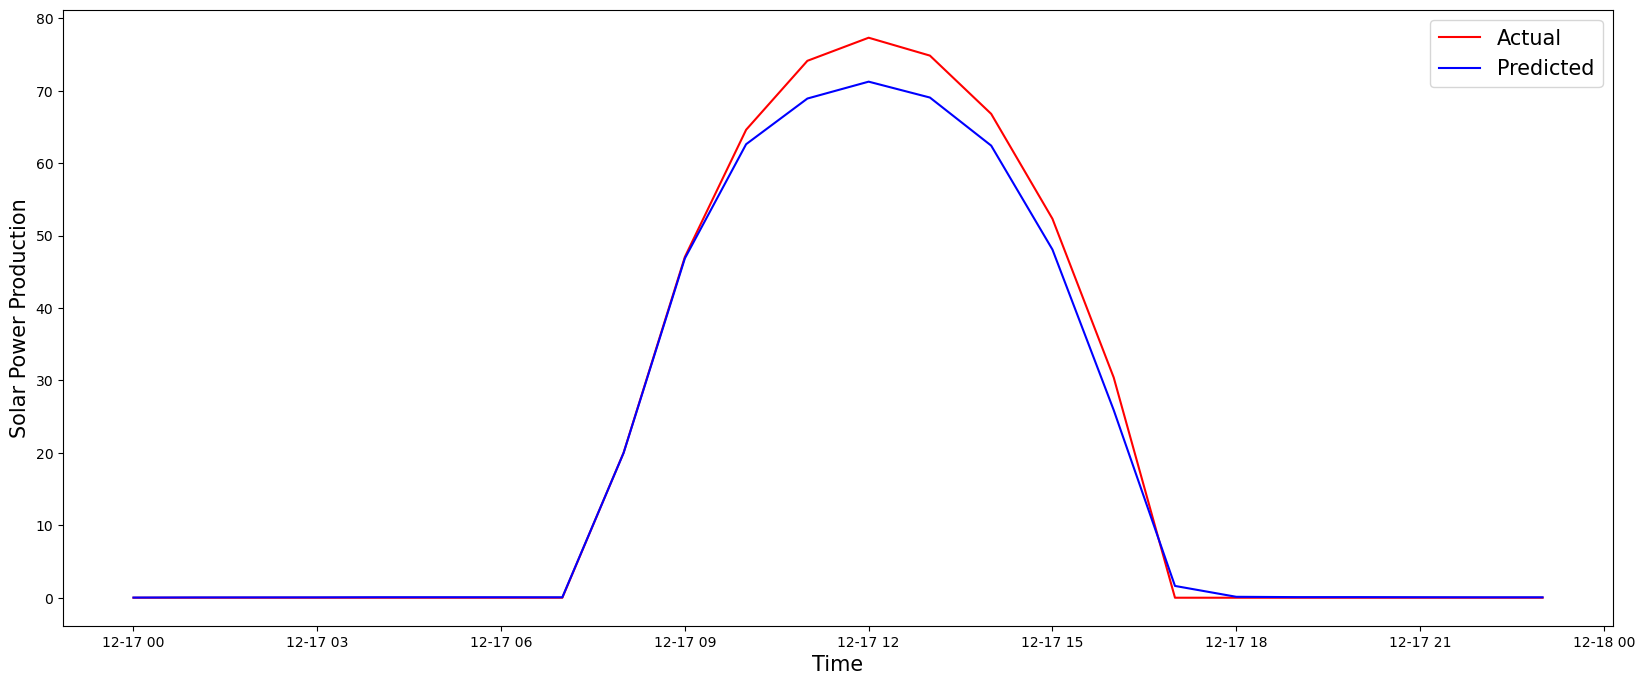

RMSE: 2.60
MAE: 1.46
NMAE: 0.01


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional

# Loading the data
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-336]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the Bi-directional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(32, activation='relu', return_sequences=False), input_shape=(1, len(feature_variables))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
index = pd.date_range(start=data.index[-360:-336][0], periods=24, freq='H')
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=index)

# Plotting the actual solar power output versus predicted solar power output values
plt.figure(figsize=(20, 8))
plt.plot(testing_data[target_variable], label='Actual', color='red')
plt.plot(next360_predictions[target_variable], label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()
# Calculate RMSE, MAE and NMAE
y_true = testing_data[target_variable].values
rmse = np.sqrt(mean_squared_error(y_true, next360_predictions[target_variable]))
mae = mean_absolute_error(testing_data[target_variable], predictions)
nmae = mae / 100  # Normalized MAE

# Print the RMSE, MAE and NMAE
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'NMAE: {nmae:.2f}')

6. Multivariate LSTM

1/1 [==============================] - 0s 141ms/step


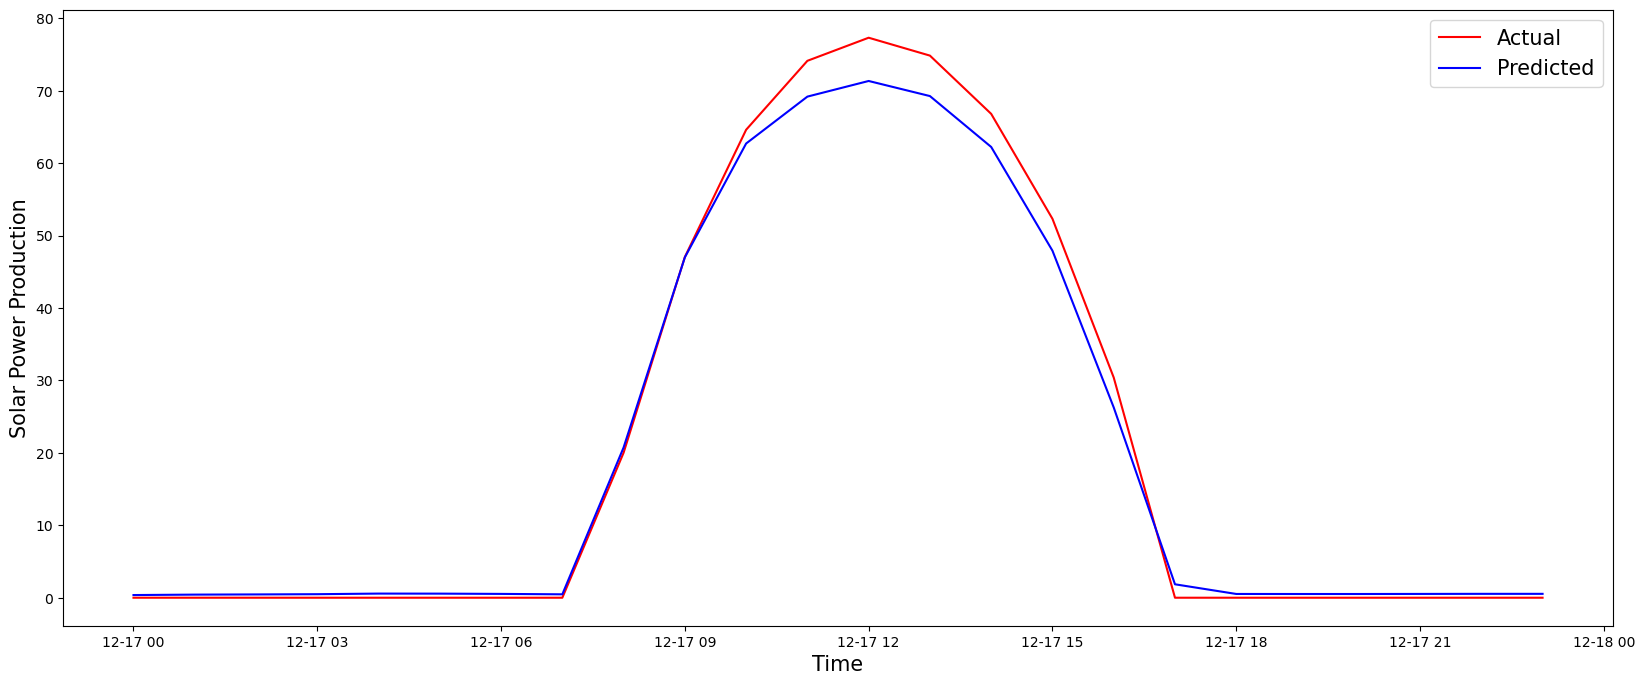

RMSE: 2.58
NMAE: 0.01
MAE: 1.72
r-sqaured: 0.99


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Loading the data
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-336]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the Stacked LSTM model
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=False, input_shape=(1, len(feature_variables))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
index = pd.date_range(start=data.index[-360:-336][0], periods=24, freq='H')
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=index)

# Plotting the actual solar power output versus predicted solar power output values
plt.figure(figsize=(20, 8))
plt.plot(testing_data[target_variable], label='Actual', color='red')
plt.plot(next360_predictions[target_variable], label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()
# Calculate accuracy metrics
y_test = testing_data[target_variable].values  # Extracting the target variable from testing_data
rmse = np.sqrt(mean_squared_error(y_test, predictions))
nmae = mae / 100
mae = mean_absolute_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)
#mape = np.mean(np.abs((predictions - y_test) / np.clip(y_test, a_min=1e-8, a_max=None))) * 100

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")
print(f"r-sqaured: {r2_test:.2f}")
#print(f"MAPE: {mape:.2f}")


7. GRU Model

1/1 [==============================] - 0s 175ms/step


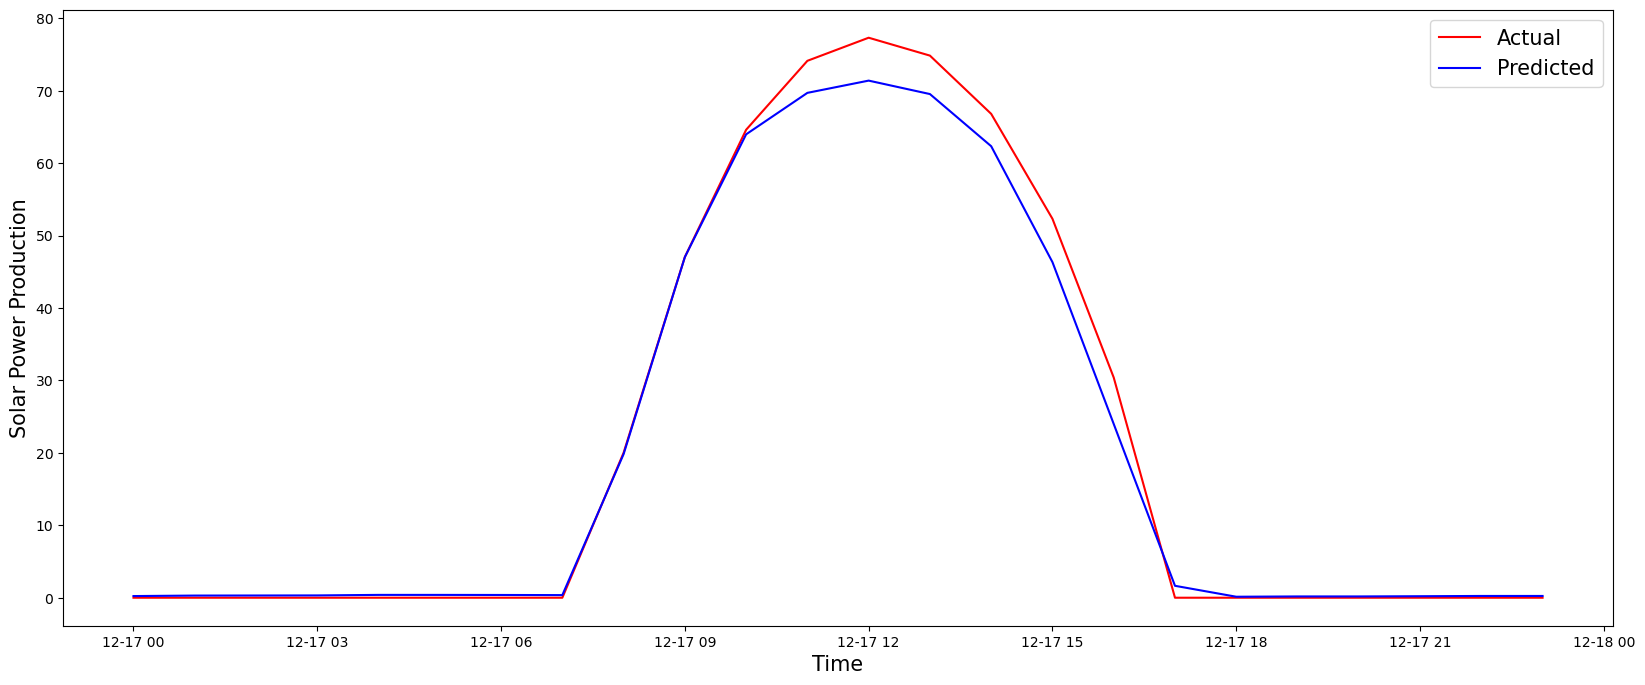

RMSE: 2.77
NMAE: 0.29
MAE: 1.62


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Loading the data
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Defining feature variables and target variable
feature_variables = ['DNI', 'DHI', 'GHI', 'Temperature', 'Wind Speed']
target_variable = 'output'

# Splitting the data into training and testing sets
training_data = data[:-360]
testing_data = data[-360:-336]

# Splitting the training and testing data into features and target variable
X_train = training_data[feature_variables]
y_train = training_data[target_variable]

# Scaling the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(testing_data[feature_variables])

# Reshaping the data for GRU input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Creating the Stacked GRU model
model = Sequential()
model.add(GRU(32, activation='relu', return_sequences=False, input_shape=(1, len(feature_variables))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)

# Predicting the next 360 hours based on the testing data
predictions = model.predict(X_test_reshaped)

# Create a DataFrame to store the predictions
index = pd.date_range(start=data.index[-360:-336][0], periods=24, freq='H')
next360_predictions = pd.DataFrame(predictions, columns=[target_variable], index=index)

# Plotting the actual solar power output versus predicted solar power output values
plt.figure(figsize=(20, 8))
plt.plot(testing_data[target_variable], label='Actual', color='red')
plt.plot(next360_predictions[target_variable], label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()

# Calculate accuracy metrics
y_test = testing_data[target_variable].values  # Extracting the target variable from testing_data
rmse = np.sqrt(mean_squared_error(y_test, predictions))
nmae = np.mean(np.abs(predictions - y_test)) / 100
mae = mean_absolute_error(y_test, predictions)
#mape = np.mean(np.abs((predictions - y_test) / np.clip(y_test, a_min=1e-8, a_max=None))) * 100

# Printing the accuracy results
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")
print(f"MAE: {mae:.2f}")
#print(f"MAPE: {mape:.2f}")


8. ARIMA Univariate Model

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=64837.206, Time=5.57 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=83469.536, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=68189.189, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=75361.998, Time=1.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=87294.797, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=66450.474, Time=1.83 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=64841.698, Time=3.03 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=64841.915, Time=3.86 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=64739.208, Time=8.28 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=66111.193, Time=3.67 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=64820.642, Time=9.69 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=64728.981, Time=9.16 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=65923.978, Time=4.83 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=64735.075, Time=10.81 sec
 ARIMA(2,0,5)(0,0,

C:\Users\ASEDAI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\ASEDAI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\ASEDAI\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\ASEDAI\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                 output   No. Observations:                 8400
Model:                 ARIMA(3, 0, 5)   Log Likelihood              -30897.413
Date:                Sat, 27 May 2023   AIC                          61814.827
Time:                        16:25:59   BIC                          61885.187
Sample:                    01-01-2010   HQIC                         61838.851
                         - 12-16-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.1037      0.296     71.361      0.000      20.524      21.683
ar.L1          1.2647      1.504      0.841      0.400      -1.683       4.212
ar.L2          0.1228      2.749      0.045      0.9

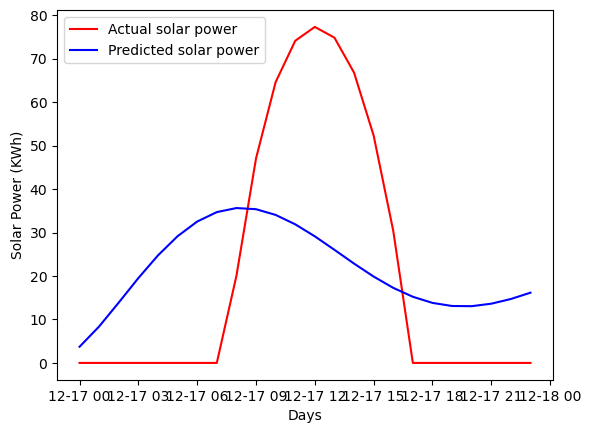

NMAE: 1.09
R-Squared: 0.21


In [71]:
# Import Basic Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# preprocessing data

df = pd.read_csv(r"C:\Users\ASEDAI\Downloads\datamv.csv", usecols=[0, 1], index_col=0, parse_dates=[0], dayfirst=True)
df = pd.DataFrame(df['output'])

train = df.iloc[:8400, 0]
test = df.iloc[8400:, 0]

# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

Decomp_results = seasonal_decompose(df)

#Decomp_results.plot()

#Decomp_results.seasonal.plot()

# Finding the Parameters (p,d,q)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#plot_acf(train, lags=50)

#plot_pacf(train, lags=50)

from pmdarima import auto_arima

auto_arima(df, trace=True)

# Developing ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

A_Model = ARIMA(train, order=(3, 0, 5))

predictor = A_Model.fit()

predictor.summary()
print(predictor.summary())

# Predicting the first 72 hours
Predicted_results = predictor.predict(start=len(train), end=len(train) + 23, typ='levels')

# Plotting result
plt.plot(test[:24], color='red', label='Actual solar power')
plt.plot(Predicted_results, color='blue', label='Predicted solar power')
plt.xlabel('Days')
plt.ylabel('Solar Power (KWh)')
plt.legend()
plt.show()

nmae = np.mean(np.abs(Predicted_results - test[:24])) / np.mean(test[:24])
r_squared = 1 - (np.sum((test[:24] - Predicted_results) ** 2) / np.sum((test[:24] - np.mean(test[:24])) ** 2))

# Print the performance metrics
print(f"NMAE: {nmae:.2f}")
print(f"R-Squared: {r_squared:.2f}")


9. Univariate LSTM Model

Epoch 1/50
262/262 [==============================] - 4s 8ms/step - loss: 0.0333
Epoch 2/50
262/262 [==============================] - 2s 8ms/step - loss: 0.0119
Epoch 3/50
262/262 [==============================] - 2s 7ms/step - loss: 0.0101
Epoch 4/50
262/262 [==============================] - 2s 7ms/step - loss: 0.0093
Epoch 5/50
262/262 [==============================] - 2s 8ms/step - loss: 0.0089
Epoch 6/50
262/262 [==============================] - 2s 8ms/step - loss: 0.0083
Epoch 7/50
262/262 [==============================] - 2s 7ms/step - loss: 0.0083
Epoch 8/50
262/262 [==============================] - 2s 7ms/step - loss: 0.0081
Epoch 9/50
262/262 [==============================] - 2s 7ms/step - loss: 0.0080
Epoch 10/50
262/262 [==============================] - 2s 9ms/step - loss: 0.0079
Epoch 11/50
262/262 [==============================] - 2s 7ms/step - loss: 0.0078
Epoch 12/50
262/262 [==============================] - 2s 8ms/step - loss: 0.0078
Epoch 13/50
262/262 [====

INFO:tensorflow:Assets written to: LSTM\assets


INFO:tensorflow:Assets written to: LSTM\assets


1/1 [==============================] - 0s 24ms/step


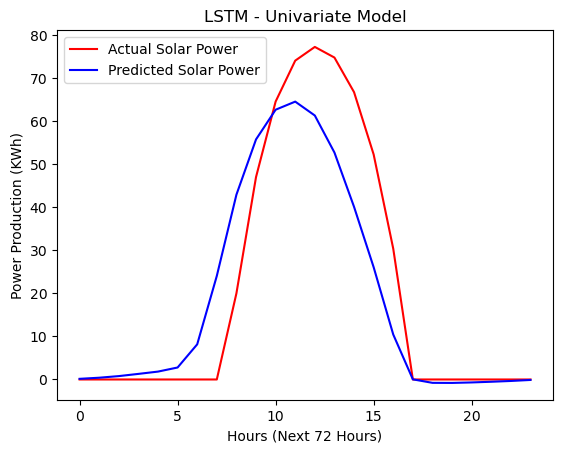

RMSE: 12.7462376803033
MAE: 8.200653820522005
NMAE: 0.08200653820522005


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load and preprocess data
df = pd.read_csv(r'C:\Users\ASEDAI\Downloads\just output.csv', parse_dates=['time'], index_col='time')
df.dropna(inplace=True)

# Define training and testing data
train_data = df.iloc[:8400, 0:1].values
test_data = df.iloc[8400:8424, 0:1].values  # Next 72 hours

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

# Create training sets
X_train = []
y_train = []
window_size = 24

for i in range(window_size, len(train_scaled)):
    X_train.append(train_scaled[i-window_size:i, 0])
    y_train.append(train_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Define LSTM model
model = Sequential()
model.add(LSTM(units=32, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Save the model
model.save('LSTM')

# Load the saved model
from keras.models import load_model
model = load_model('LSTM')

# Predict future solar power output
inputs = train_scaled[-window_size:]
inputs = inputs.reshape(-1, 1)
inputs = np.reshape(inputs, (1, inputs.shape[0], 1))

predictions = []
for _ in range(24):  # Predict next 72 hours
    prediction = model.predict(inputs)
    predictions.append(prediction[0, 0])
    inputs = np.roll(inputs, -1)
    inputs[0, -1, 0] = prediction

# Inverse transform the predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Flatten the test data
test_data_flattened = test_data.flatten()

# Plot the results
plt.plot(test_data, color='red', label='Actual Solar Power')
plt.plot(predictions, color='blue', label='Predicted Solar Power')
plt.title('LSTM - Univariate Model')
plt.xlabel('Hours (Next 72 Hours)')
plt.ylabel('Power Production (KWh)')
plt.legend()
plt.show()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data_flattened, predictions.flatten()))

# Calculate MAE
mae = mean_absolute_error(test_data_flattened, predictions.flatten())

# Calculate NMAE
nmae = mae / 100

print("RMSE:", rmse)
print("MAE:", mae)
print("NMAE:", nmae)


10. SVR Univariate Model

RMSE (First 72 Hours): 9.84
NMAE (First 72 Hours): 0.06
r-squared (First 72 Hours): 0.89


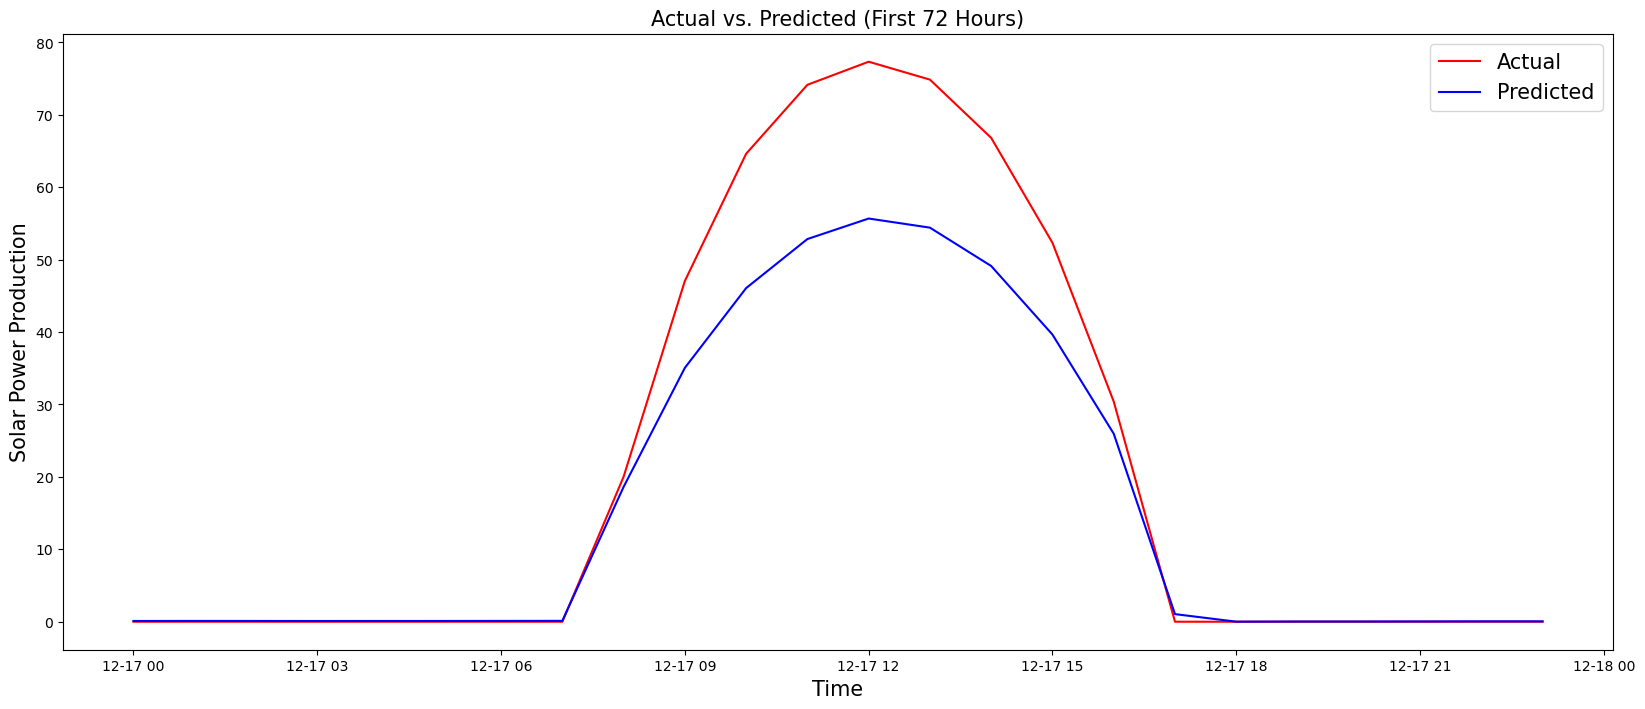

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the data into a Pandas DataFrame
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\fghgh.csv', parse_dates=['time'], index_col='time')

# Define the target variable
target = 'output'

# Set up the feature and target arrays
X = data.drop(target, axis=1).values
y = data[target].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=360, shuffle=False)

# Preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the SVR model
model = SVR(kernel='linear', C=100, gamma=0.5, epsilon=0.1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Use the trained model to predict the output values for the first 72 hours of the test set
predictions = model.predict(X_test[:24])

# Calculate the mean squared error for the first 72 hours predictions
rmse = np.sqrt(mean_squared_error(y_test[:24], predictions))
nmae = mean_absolute_error(y_test[:24], predictions) / 100
r2_test = r2_score(y_test[:24], predictions)

# Print the performance metrics for the first 72 hours predictions
print(f"RMSE (First 72 Hours): {rmse:.2f}")
print(f"NMAE (First 72 Hours): {nmae:.2f}")
print(f"r-squared (First 72 Hours): {r2_test:.2f}")

# Plot the actual versus predicted values for the first 72 hours
plt.figure(figsize=(20, 8))
plt.plot(data.index[-360:][:24], y_test[:24], label='Actual', color='red')
plt.plot(data.index[-360:][:24], predictions, label='Predicted', color='blue')
plt.legend(fontsize=15)
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.title('Actual vs. Predicted (First 72 Hours)', size=15)
plt.show()


11. ARIMA-LSTM Model

C:\Users\ASEDAI\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ASEDAI\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Epoch 1/50
263/263 [==============================] - 2s 2ms/step - loss: 0.3396
Epoch 2/50
263/263 [==============================] - 1s 4ms/step - loss: 0.0536
Epoch 3/50
263/263 [==============================] - 1s 2ms/step - loss: 0.0476
Epoch 4/50
263/263 [==============================] - 1s 3ms/step - loss: 0.0457
Epoch 5/50
263/263 [==============================] - 1s 3ms/step - loss: 0.0448
Epoch 6/50
263/263 [==============================] - 0s 2ms/step - loss: 0.0439
Epoch 7/50
263/263 [==============================] - 1s 2ms/step - loss: 0.0434
Epoch 8/50
263/263 [==============================] - 1s 3ms/step - loss: 0.0429
Epoch 9/50
263/263 [==============================] - 1s 3ms/step - loss: 0.0426
Epoch 10/50
263/263 [==============================] - 1s 3ms/step - loss: 0.0421
Epoch 11/50
263/263 [==============================] - 1s 4ms/step - loss: 0.0418
Epoch 12/50
263/263 [==============================] - 1s 4ms/step - loss: 0.0413
Epoch 13/50
263/263 [====

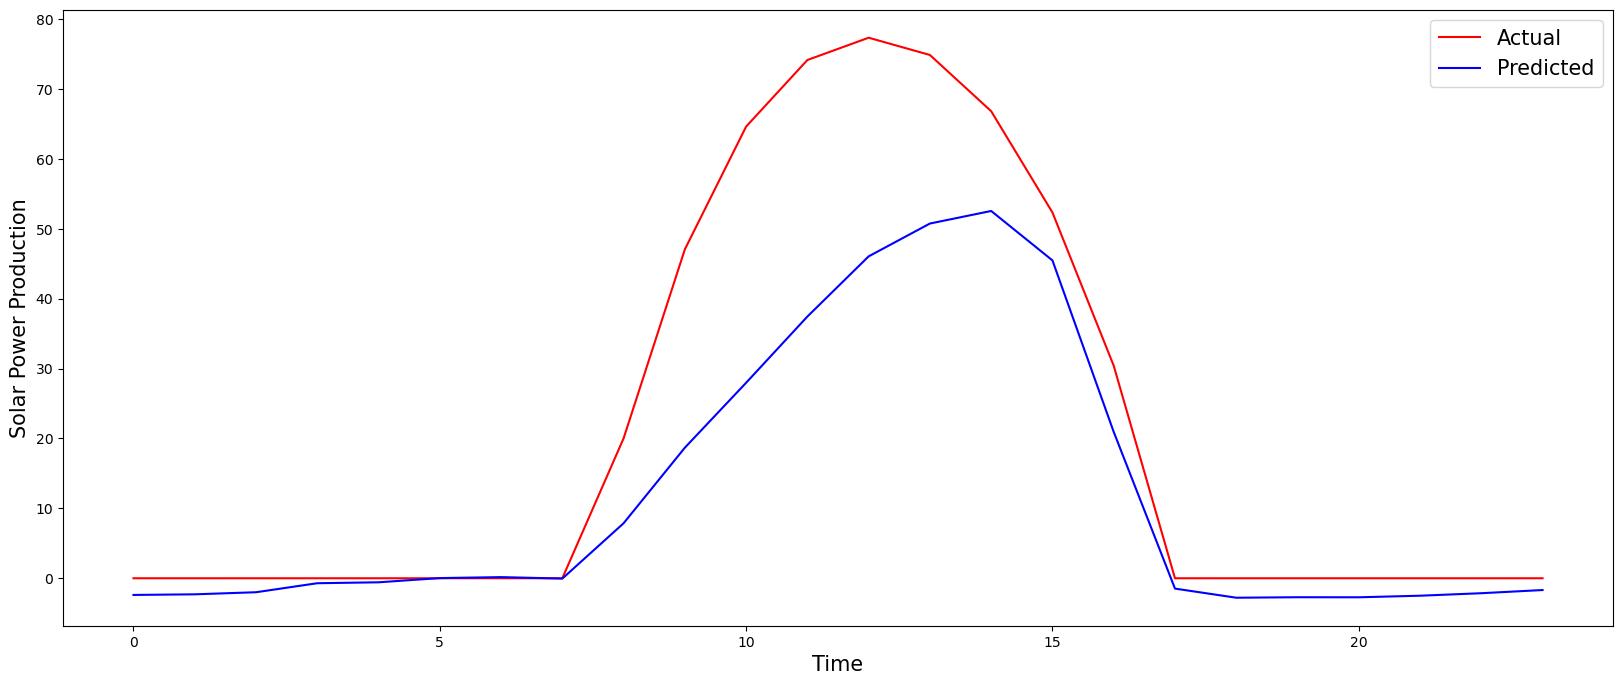

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA

# Load the data into a Pandas DataFrame
data = pd.read_csv(r'C:\Users\ASEDAI\Downloads\datamv.csv', parse_dates=['time'], index_col='time')

# Define the target variable
target = 'output'

# Set up the feature and target arrays
X = data.drop(target, axis=1).values
y = data[target].values

# Split the data into training and testing sets
train_size = len(X) - 360
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train an ARIMA model
arima_model = ARIMA(y_train, order=(3, 0, 5))
arima_model_fit = arima_model.fit()

# Use the ARIMA model to forecast the future values
arima_forecast = arima_model_fit.forecast(steps=len(X_test))

# Reshape arima_forecast to match the shape of X_test
arima_forecast = arima_forecast.reshape(-1, 1)

# Append the ARIMA forecasts as additional features
X_test_augmented = np.hstack((X_test, arima_forecast))

# Train another ARIMA model on full data
arima_model_full = ARIMA(y, order=(3, 0, 5))
arima_model_full_fit = arima_model_full.fit()

# Use the ARIMA model to forecast the future values for the training data
arima_forecast_train = arima_model_full_fit.forecast(steps=len(X_train))

# Reshape arima_forecast_train to match the shape of X_train
arima_forecast_train = arima_forecast_train.reshape(-1, 1)

# Append the ARIMA forecasts as additional features
X_train_augmented = np.hstack((X_train, arima_forecast_train))

# Preprocessing
scaler_X = StandardScaler()
X_train_augmented = scaler_X.fit_transform(X_train_augmented)
X_test_augmented = scaler_X.transform(X_test_augmented)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

# Reshape the input data for LSTM
X_train_augmented = X_train_augmented.reshape(X_train_augmented.shape[0], 1, X_train_augmented.shape[1])
X_test_augmented = X_test_augmented.reshape(X_test_augmented.shape[0], 1, X_test_augmented.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=32, input_shape=(1, X_train_augmented.shape[2])))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model to the training data
model.fit(X_train_augmented, y_train, epochs=50, batch_size=32, verbose=1)

# Use the trained model to predict the output values for the first 72 hours of the test set
predictions = model.predict(X_test_augmented[:24])
predictions = scaler_y.inverse_transform(predictions)

# Inverse transform the y_test to get it back to the original scale
# Inverse transform the y_test to get it back to the original scale
y_test = scaler_y.inverse_transform(y_test)

# Calculate the mean squared error of the model
rmse = np.sqrt(mean_squared_error(y_test[:24], predictions))
nmae = mean_absolute_error(y_test[:24], predictions) / 100

# Print the performance metrics
print(f"RMSE: {rmse:.2f}")
print(f"NMAE: {nmae:.2f}")

# Plot the actual versus predicted values for the first 72 hours
plt.figure(figsize=(20, 8))
plt.plot(y_test[:24], label='Actual', color='red')
plt.plot(predictions, label='Predicted', color='blue')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('Solar Power Production', size=15)
plt.legend(fontsize=15)
plt.show()

